In [1]:
import numpy
import random
from matplotlib import pyplot
from matplotlib import colors
from matplotlib import font_manager
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import datetime
from datetime import date
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER
from PIL import Image
import pandas
from sklearn.linear_model import LinearRegression, LogisticRegression
from mpl_toolkits.mplot3d import Axes3D
import seaborn
import scipy
from scipy import stats
from scipy.stats import poisson, ttest_ind
from scipy import linalg
import xarray as xr
import os
import netCDF4
import cftime
import warnings

In [2]:
# Create List of Models
Model_List = ['MPIESM12', 'MPIESM11', 'IPSLCM5A', 'HadGEM2ES', 'HadCM3L', 'GISSE2R', 'FAMOUS', 'ECHAM5MPIOM', \
'CNRMCM61', 'CESM104', 'CCSM3']

In [3]:
# Define Directory
#Diri = "/Users/angelinependergrass/Documents/github/Long_Run_MIP_dPdT/Data/"
Diri = "data/processed/"

#
# Get Files
#Precip_Files = os.listdir(Diri+"Net_CDF/")
#print (Precip_Files)
Temp_Files = os.listdir(Diri+"CSV/")
print (Temp_Files)

['Temp_Control.csv', 'Temp_Anom.csv']


In [4]:
# Create Hydrological Sensitivity Dictionary
Hydro_Sensi_Dict = {"MPIESM12": [], "MPIESM11": [], "IPSLCM5A": [], "HadGEM2ES": [], "HadCM3L": [], "GISSE2R": [], \
"FAMOUS": [], "ECHAM5MPIOM": [], "CNRMCM61": [], "CESM104": [], "CCSM3": []}
i = 0
for Model in Model_List:
    Hydro_Sensi_Dict[Model] = i
    i += 1
Hydro_Sensi_Dict

{'MPIESM12': 0,
 'MPIESM11': 1,
 'IPSLCM5A': 2,
 'HadGEM2ES': 3,
 'HadCM3L': 4,
 'GISSE2R': 5,
 'FAMOUS': 6,
 'ECHAM5MPIOM': 7,
 'CNRMCM61': 8,
 'CESM104': 9,
 'CCSM3': 10}

In [5]:
for Model in Model_List:
    # read in netcdf where we saved the data
    Filename_1 = Diri+"HSdict/"+"Hydro_Sensi_"+Model+".nc"
    ds = xr.open_dataset(Filename_1)
    Hydro_Sensi_Dict[Model] = ds.__xarray_dataarray_variable__
  
    # Create Array of Longitude and Latitudes
    Longitude = numpy.array(ds.Lon)
    Latitude = numpy.array(ds.Lat)  
    Time_Period = ["1-20 Years", "21-150 Years", "151-1000 Years"]

    i += 1

In [6]:
Hydro_Sensi_Dict

{'MPIESM12': <xarray.DataArray '__xarray_dataarray_variable__' (Latitude: 72,
                                                    Longitude: 144,
                                                    Time Period: 3)> Size: 249kB
 [31104 values with dtype=float64]
 Coordinates:
     Lat      (Latitude) float64 576B -88.75 -86.25 -83.75 ... 83.75 86.25 88.75
     Lon      (Longitude) float64 1kB 1.25 3.75 6.25 8.75 ... 353.8 356.2 358.8
     Period   (Time Period) <U14 168B ...
 Dimensions without coordinates: Latitude, Longitude, Time Period,
 'MPIESM11': <xarray.DataArray '__xarray_dataarray_variable__' (Latitude: 72,
                                                    Longitude: 144,
                                                    Time Period: 3)> Size: 249kB
 [31104 values with dtype=float64]
 Coordinates:
     Lat      (Latitude) float64 576B -88.75 -86.25 -83.75 ... 83.75 86.25 88.75
     Lon      (Longitude) float64 1kB 1.25 3.75 6.25 8.75 ... 353.8 356.2 358.8
     Period   (Ti

In [7]:
HS_DA = xr.concat([Hydro_Sensi_Dict[Model] for Model in Model_List], 'Model')

In [8]:
Hydro_Sensi_Median = HS_DA.median(dim='Model')

In [39]:
# Calculate Intermodel Median of Hydrological Sensitivities
#Hydro_Sensi_Median = numpy.zeros((len(Hydro_Sensi_Dict[Model]), len(Hydro_Sensi_Dict[Model][0]), len(Hydro_Sensi_Dict[Model][0][0])))
#for i in range(len(Hydro_Sensi_Dict[Model])):
#    for j in range(len(Hydro_Sensi_Dict[Model][0])):
#        for k in range(len(Hydro_Sensi_Dict[Model][0][0])):
#            Hydro_Sensi_List = []
#            for Model in Model_List:
#                Hydro_Sensi_List.append(float(Hydro_Sensi_Dict[Model][i][j][k]))
#            Hydro_Sensi_Median[i][j][k] = numpy.median(numpy.array(Hydro_Sensi_List))
#            #print (Hydro_Sensi_List, Hydro_Sensi_Median[i][j][k])
#print (Hydro_Sensi_Median)

[1.3329951786139678, 1.6708259665495329, 0.7229208884954097, 2.113537030332496, 1.8666648153524918, 1.8303193562465434, 1.819364874497623, 0.3289494748889584, 3.0609997551547306, 1.8909274040887507, 2.885293534757592] 1.8303193562465434
[0.02939268020554504, 0.2880983875637239, 0.08733428933797485, 0.717693415488993, 0.35220239695154215, 1.024847271818471, 0.5826587111324159, 0.15723308780876913, 0.9108752980420295, 1.0011782429552307, 4.276596001793419] 0.5826587111324159
[0.9609437532351873, 0.641321889935977, 0.7303420588294585, 0.23182427231530947, -0.21254981221524902, 1.4886257837943624, 0.8221874664896858, 0.18607881002163792, 3.0631156680487477, 2.2908601843865664, 1.726779214549123] 0.8221874664896858
[1.3320521577888182, 1.6742414807792996, 0.7314234770182356, 2.072075235144917, 1.764485435432149, 1.7892141326721582, 1.7829478531266278, 0.31401403390443233, 3.0874617825214057, 1.8721394763136094, 2.856740242101218] 1.7829478531266278
[0.17325487568255774, 0.36963704857271756,

[0.49635013470032474, 0.4212436007730798, 0.10042317246938182, 0.44208748238933043, 0.3265551180370037, 0.3498148792688405, 0.2819126818003395, 0.30277154593772004, 0.23770079433361654, 0.41832547008168647, 0.5757044255085447] 0.3498148792688405
[0.6131068980431905, 0.7240239682118699, 0.36284388892515773, 0.08909297935299598, 0.36299047286086855, 0.4221454818017962, 0.7033410281981871, 1.4620883795053832, 1.8822152267754213, 1.1805700903392822, 0.5305452551644808] 0.6131068980431905
[1.3126673144546084, 1.2602271971594154, 0.8037281464408652, 1.6081763972516516, 0.8499347409852527, 0.6266040830691451, 0.9236135176159209, 2.53330925929124, 2.2573981591798935, 1.098103601268268, 1.3186451414187093] 1.2602271971594154
[0.48947139367289527, 0.4020185279191854, 0.1038900686402099, 0.4724432577447887, 0.30203333070650606, 0.3717792509902589, 0.27126725662204704, 0.28355409560186723, 0.25268661981934243, 0.4257257730008632, 0.5394938291682164] 0.3717792509902589
[0.6854358895400767, 0.802297

[-0.18719001472279492, -0.07226907313247403, -1.0305318969690493, 1.7725367213729806, -0.2803122036611956, -0.06119630337056696, 1.0791035640125202, 0.6581464002031503, 1.2425970109258198, 2.0959994117820924, -3.4603295386445154] -0.06119630337056696
[3.485440470282292, 2.7387618015131974, -0.555744257451302, 0.6817317561826048, -0.767447938333646, 6.191276042374647, 1.7800800088400028, 1.4346661034803956, 3.9479132728201143, 4.039157217071458, 1.6776627778185875] 1.7800800088400028
[4.828585810617097, 4.511378458876149, 5.361331152646297, 4.49472080394377, 2.3733942422174823, 13.106245333600903, 2.1198455848364333, 2.5465549249153443, 5.104417659756022, 4.0056081235498855, 3.9345110391578926] 4.49472080394377
[0.1243881108582914, -0.075184853979672, -0.6151430271730081, 1.6450406159580595, -0.03040730761518809, 0.1798420051138356, 1.1311544508984543, 0.6570966410962347, 1.1955469275351047, 2.1251714746265224, -3.270899715067474] 0.1798420051138356
[2.74077982820113, 2.3032773183196404

[0.49474179279981156, 0.16410775224798244, 0.1793122682616347, 0.16017769837174278, 0.45154466010755423, 0.9308591025892998, 0.5230869162743652, 0.05210667292813553, 0.44088183604895304, 0.7014619453684988, 2.2054912025036884] 0.45154466010755423
[1.398069808341644, 0.6964688735976611, 0.509885763879615, 0.5743247484977732, 0.4112447124987291, 1.2312130829973702, 0.9969247676718158, 0.7523583152818573, 2.614043012022832, 0.9356759805223618, 2.070509970800345] 0.9356759805223618
[1.262245105979907, 1.3055898504877437, 0.7559487492611218, 1.9300160723928435, 0.932583665214337, 1.4441107618086755, 2.710725729088796, 1.071779770066634, 3.268277279598825, 1.0906057014819481, 2.148290517395706] 1.3055898504877437
[0.4129852543132584, 0.22110276873555995, 0.16663393353110337, 0.23783512869272969, 0.44226410474681893, 0.9009477102054628, 0.5014126949909434, 0.07406531332215512, 0.4497327679981372, 0.656844804477928, 2.180107981124167] 0.44226410474681893
[1.4463509198671678, 0.6294749898267923

[4.366104936782608, 3.800213340201791, 1.8598266081654924, -0.17955099368777203, 2.258216096972478, 1.0528301225607721, 0.6505911283493556, 2.896425983605551, 2.0094868302837567, 4.758443248177068, 3.7595810092852098] 2.258216096972478
[5.813708647234674, 5.486620738521522, 5.547963886582527, 1.1180334832908019, 2.1355240226332572, 1.8909023363650177, 0.11913133331835839, 2.5804197334084646, 6.365833787011935, 4.636182794964417, 2.776750716247938] 2.776750716247938
[-1.8066880440540762, 0.17806674726974814, 0.5516091744939089, 0.4094232004574522, -0.49325586096472807, 0.6145226645351709, 0.30203338013112, -0.62130258348309, -0.12737833470638982, 0.7517363065078777, -5.858222663055884] 0.17806674726974814
[5.596778809187837, 4.508163093933402, 2.2219133516294045, -0.09777179944816912, 2.59323920294165, 5.198717801097609, 0.6884690712676509, 3.2762591124012332, 2.1058011135561205, 5.684388075707326, 4.264694017883826] 3.2762591124012332
[6.964492453343696, 6.668090939941507, 6.9577046042

[1.4012015393359079, 0.8310457326956333, 0.5405352693010296, 0.9719966802845275, 1.8567737413651202, 0.5757805119003169, 2.0408407499335826, 0.33034176264188353, 0.5046497725813006, 1.78060649331971, 2.877593323776515] 0.9719966802845275
[0.701827759201643, 0.2341409032328551, 1.317303897522969, 0.8192023627009933, 2.647966166082697, 1.8562133330753734, 1.7680175969927705, 0.980168146129483, 3.986995533252938, -0.46245849095971453, 3.2355042213756264] 1.317303897522969
[2.5829593624517906, 2.5754852548975493, 1.1082955912821608, 2.334457281262238, 3.53115023963532, 2.195895711474129, 2.529538004595135, 3.0372138769941643, 1.6780472560393982, 1.4594624682501252, 3.5474236570240634] 2.529538004595135
[1.0994248595301093, 0.5639381971672616, 0.40443230579932243, 0.9806739889716941, 1.730994216775573, 0.585813815671486, 2.2549438206799715, 0.27551916734698284, 0.43684481970015193, 1.5110190370405914, 3.293299585292266] 0.9806739889716941
[0.3243736674850615, 0.48724508225685315, 1.06219750

[0.9497636159573111, 1.1038549313360153, 0.5547827411680784, 1.1822649880631977, 0.5899602384535949, 1.1162726241087713, 5.245768442931501, 1.3187375338850655, 1.7594952019497285, 0.6221357437848064, 2.4777345534749027] 1.1162726241087713
[0.5062815274945275, 0.23546116048829052, 0.17679790315435392, 0.4351134230213978, 0.35665989647013185, -0.4447619310903869, 0.8873519652383707, 0.2968004174459561, 0.34375609278617597, 0.655652614936929, 1.4198545650862178] 0.35665989647013185
[0.09148000411059774, 0.37544135487695507, 0.3198190172556744, 0.24861179951045836, 0.22816025114275917, 0.4769023415757718, 1.7712811004374693, 0.7687704809025313, 2.1419434977049288, 0.3501490169032863, 0.8144216818216335] 0.37544135487695507
[0.9747593350766471, 1.1218338944700266, 0.5751944032927159, 1.271089946382484, 0.6326490548592495, 1.254566995661119, 5.353816426227602, 1.3344901394673616, 1.884203812502502, 0.7014234802493994, 2.4877688874016672] 1.254566995661119
[0.45252662350612605, 0.222639724418

[4.370669616263728, 4.1864733531851845, 3.9000457603659333, 2.849194964259669, 1.4966136107030616, 9.223318805833951, -0.9425523504431046, 1.4810920342142375, 3.8027529795062995, 2.9488268616978965, 4.02634244896599] 3.8027529795062995
[-2.5631822213526174, -1.8091864667681745, -0.4408066847069635, 1.4921621166660226, -1.885088870903168, -0.7391689989611218, 0.5178564755828337, 1.2699236734267227, 0.003490903011979484, 0.5667657897117546, -8.644299127539709] -0.4408066847069635
[7.26087212541245, 5.005592704600527, 0.8981762851315198, -0.08281367604413627, 3.008981760761019, 6.451150697038017, 1.0862480830147858, 2.0506652044452114, 1.6359425956291105, 2.1761916870650992, 2.9269784718964775] 2.1761916870650992
[4.5226184870821875, 4.362568965728279, 4.425800637446562, 3.0911624335041217, 1.3171030269313038, 9.797760550338621, -0.9995513454173434, 1.5939325721025073, 4.2042987593551615, 2.8661560434549607, 3.784697749255688] 3.784697749255688
[-2.480194272378069, -1.8789477860139192, -0

[0.18335317169063592, 0.06241662581963265, 0.6780537941516769, 0.6136733933450342, 1.9525878861696777, 1.7064290092497936, 2.47154724819287, 0.1058614840881914, 1.6103715235104794, 1.9050832146171106, 10.39501219798542] 1.6103715235104794
[2.9156192146856625, 1.605234476023955, 2.4586098850485127, -0.038493213423215454, 3.3703537267007246, 1.336047779768545, 2.056652328230257, 1.1784878824824618, 6.415271389009274, 3.5671307939584582, 3.7261820147048144] 2.4586098850485127
[2.09018151225046, 3.188307625463222, 1.8864840727530412, 2.187659650471109, 5.064782542476612, 2.973366336563331, 2.449690143854885, 2.25750873658607, 2.874921249789104, 3.042225645440397, 3.442939284661528] 2.874921249789104
[0.20054581024660526, -0.1448317937456569, 0.33413063821546923, 0.7973156295255264, 1.893528225584978, 1.1375004928130785, 2.4120142037275225, 0.10451381955107616, 1.5838618046486124, 2.1523330835960297, 10.112771671653466] 1.1375004928130785
[2.994269241155428, 1.7137743217909234, 2.1633374264

[1.4225813818090782, 1.5630781355464727, 0.6415095744101288, 1.3343498779811684, 0.9432619096998422, 1.0864270960498044, 3.8627828409189044, 1.8055485962457098, 1.7863862169707296, 1.0527961269021917, 3.0546238093074014] 1.4225813818090782
[0.08436431389530581, 0.12368245302506681, 0.27516346576141504, 0.4943928767837178, 0.06673709767262628, -0.05564830940874353, 1.115413534022839, 0.31319118942951707, 0.10509935342316991, 0.45661235660815674, 0.13404285260141582] 0.13404285260141582
[0.6084652645188705, 0.37692809965247576, 0.2176250060249487, 0.33026996522837104, 1.0660135440909924, 0.7967530765825728, 1.1207516499741321, 1.069369296447362, 1.410616771802188, 0.5754052027360531, 1.4018935743775338] 0.7967530765825728
[1.3365108286915115, 1.5078264024655081, 0.6598957420933209, 1.2389401624150924, 0.9484658901652729, 0.9737300044971541, 3.6315377385118346, 1.802358692131954, 1.6305267860347703, 1.078175916908532, 2.932516337194477] 1.3365108286915115
[0.050598427587473474, 0.13050027

[3.073290134425652, 4.973812387202913, 1.2561487263164335, 2.322564875788355, 3.5834261404574352, 4.609110333023702, 3.262934574385835, 1.1961754070333055, 9.790362214622737, 6.062717628068314, -13.995682955406522] 3.262934574385835
[8.785277261211354, 9.416594246644912, -1.5386998124865865, 1.634768657238682, 8.129935102254745, 12.058864539558462, 1.1126261681760878, 8.483315999082794, 10.533308926194561, 12.258815522609984, 5.011463628259262] 8.483315999082794
[13.990049441196307, 13.674881195588949, 11.45490485451559, 8.122543858142599, 6.8406850959967285, 21.66638939762231, -0.17079373658730737, 8.079452445522461, 11.318213897213006, 12.792425356264978, 8.512321988247354] 11.318213897213006
[3.3839760300669997, 5.3698749734534275, 1.7495248323172186, 3.0204307588041477, 3.7448037947061015, 4.828301721662268, 3.566571348840779, 0.9243794465694914, 9.41627509891967, 6.356488154987602, -11.429373247680616] 3.566571348840779
[7.35866830484614, 9.717450149791437, -1.7040875175351176, 2.

[1.9085145972855442, 1.8638841179169388, 0.5378219244293667, 1.497309889222889, 0.17220913005655858, 1.4122643359190872, 2.0825662089291264, 0.6664990222996078, 1.98530638321088, 2.4603376498468834, -1.784163055691066] 1.497309889222889
[4.40204092804927, 2.856604859624356, 2.1087874958369603, 1.514564232220931, -0.658781159269122, 2.5362958069943806, 4.229293693846963, 3.1790818962615144, 6.237368298296555, 0.8558549319396813, 3.8345091612290787] 2.856604859624356
[3.14245488837881, 3.4192708401914365, 3.4639736965683774, 4.657959916422737, 1.808063739056139, 3.56036570058351, 11.143320901035509, 5.600493105286477, 7.309684374140697, 4.1843136179683125, 7.377642956786384] 4.1843136179683125
[1.6836452193434692, 1.7465333868771462, 0.5992514047083898, 1.338904597905057, -0.03807113639146475, 0.8592876879664958, 1.9763210600878447, 0.7964458445313777, 1.8851880571842534, 2.0995746511992484, -1.633431623222343] 1.338904597905057
[4.011826465059446, 2.6250036355514923, 1.9242187740992858,

[0.11805596788413078, -0.10080878400234114, 0.20418225863034764, 0.43476980030745804, 0.20553182074561419, 0.11063950266079142, 1.7974074236340762, 0.5546046139722491, 0.5535455353065734, 0.3765783910559809, 1.6074568917922545] 0.3765783910559809
[0.6618841407937198, 0.8575263814675711, 0.584983959669544, 0.3718879061226557, 2.1029804914885526, 0.962132485019959, 1.1937522391976398, 1.2628598678387042, 2.691489201033, 0.9564555914268117, 3.981923782145954] 0.962132485019959
[1.1987348925058068, 1.2039521753596605, 1.0311520185913778, 1.120580274340137, 1.1525094012014123, 1.9949090871697617, 2.950487202052487, 2.1476893283017744, 1.9097821243642978, 1.0894321835356455, 4.356331092778274] 1.2039521753596605
[-0.011344661847027784, -0.11336541631387556, 0.20502650974825337, 0.3673193527218526, 0.25770199462178567, 0.14712256111331068, 1.821235743018528, 0.5975329462899442, 0.7395070286940874, 0.31628539244144255, 0.10118188409411584] 0.25770199462178567
[0.922538816540845, 0.667410589277

[6.486023356431675, 9.843433704405749, 1.4817757728484542, 6.5898334595268215, 11.74695559750094, 5.337087419713434, 2.748256375155528, 3.0280339435903594, 7.86558431862814, 10.247210806212156, -2.246066633062374] 6.486023356431675
[11.27907395186366, 11.72574489353685, 5.604484056744438, 9.731457794865733, 9.751240023611794, 7.254434512395569, 0.9288152661137775, 5.530853927281411, 7.685501605106396, 7.782306569364289, 2.7074163226659107] 7.685501605106396
[5.141202466366466, 5.877050321065894, 2.9536882005885152, 8.138001958205987, -0.551898317781325, 15.462987577093397, 4.403950893692137, 2.089804266183064, 7.323781826855732, 6.885107260722579, -6.831408011720462] 5.141202466366466
[5.576944448673207, 10.630962452245896, 2.23800503039138, 5.819204992555664, 11.094408500479444, 3.9954581518343044, 2.8965410733426564, 2.873642127433501, 8.356724922859307, 10.57715183309288, -2.426499699462656] 5.576944448673207
[11.584511006520243, 12.224362510794204, 5.678089456660353, 8.895696563884

[4.077298236813446, 2.095184185252294, 1.3682702572407508, 1.4886735864991814, 0.10671436847950105, -0.6460973876351329, 2.2077583308101896, 1.9279471652639386, 2.1573406357294718, 2.4394970341220774, -10.618335959714333] 1.9279471652639386
[3.409888860997855, 3.4844551732580857, 1.7778453903645366, 3.614808003170272, 0.6246504024327397, 6.164964221341911, 4.288567816956869, 4.008262104119284, 7.3363242010439125, 2.483975790636706, 15.952268092669865] 3.614808003170272
[4.6171346407013, 6.442994792199973, 4.597971573076961, 5.8177980005893035, 3.764632780073985, 14.467220210655544, 9.590777290803851, 4.504681536031562, 9.85590317398025, 5.237499231265381, 8.148438682414536] 5.8177980005893035
[4.2652344943324545, 2.1339301524501866, 1.4513552634741993, 1.331486391329257, 0.3089846618695665, 7.797277405903626, 2.2621955688110367, 1.9613018090078205, 3.013725366970161, 2.684836131604034, -8.421782595210953] 2.1339301524501866
[3.160069301226367, 3.3910395790354952, 1.7924732919340183, 3.

[6.468014683192184, 6.543366344903902, 8.535028959549086, 2.1564115325589635, 1.5212845532576917, 14.98870878492657, 3.460147733094302, 5.5627656687833245, 4.85178395442349, 1.8278052694677411, 7.825961333360765] 5.5627656687833245
[-0.580541752230288, -3.125364633186557, -1.0720897547136685, 1.2084219498969657, 0.5010176984022726, -0.3605531827698512, 4.488378438706698, 3.1873457511210215, 1.2215209414297707, 0.2941118056981721, -8.706707516232049] 0.2941118056981721
[6.965785663646794, 4.950192802105618, 2.5990060348126933, -0.031870615984274084, 5.72430419659626, 9.409147274985731, 1.9127560846712641, 6.013334228286992, 2.3411405011309747, 3.33857158414074, 1.514414366080713] 3.33857158414074
[6.181259414202785, 6.37231579351783, 5.900621117502727, 2.145812725296695, 2.1572624050481144, 27.908293477285422, 2.782494628089557, 5.9244351890931215, 4.986110406209676, 2.3869727435454746, 7.564469115985273] 5.900621117502727
[-1.0574702079897251, -3.9985020945142216, -0.8925158262214944, 

[4.357369322104197, 1.592471974816702, -0.6489782457503555, 3.210815068718059, 5.002769955052635, -1.1390420891394746, 2.5921776499115565, 1.5399085258465073, 1.8498205214191232, 0.7492407954680325, 1.6346921681653623] 1.6346921681653623
[-6.335717924818643, -6.30237639125716, 4.5540234690957115, 2.3765152154861973, 3.523989541269642, 2.8373180132598774, 2.3077125238596086, 4.370401760504778, 3.106416423767687, 1.494065665489327, 1.4831167875048605] 2.3765152154861973
[3.9086029134205726, 3.3585910759382394, 2.177278496583328, 4.366416962308453, 3.795104057879002, 4.0365758556712565, 2.4367960627893606, 4.362827005606968, 3.076662231005834, 2.8406535083508073, 3.322770718546383] 3.3585910759382394
[4.199978206322737, 1.1525172922776072, -0.7403713403933342, 3.424507522207376, 5.036182991558861, 0.20351033752883801, 2.8643237423265497, 1.6632785637838055, 3.3365676598644876, 0.632240702574637, 1.6994573521852678] 1.6994573521852678
[-4.489624709439826, -3.4430963145300213, 3.58245803159

[0.859902827408455, 0.880589059490384, 2.142542515628623, 2.3609304734266976, 1.2979511426593846, 0.6623731847414045, 1.7947078535151924, 1.126704645847363, 1.0859470717935387, 2.69566368334132, 9.546751445854438] 1.2979511426593846
[0.8548428141394951, 3.236867474922713, 0.43780188577175355, 3.8079149480143126, -0.22164162295980902, 9.833467654926107, 3.4157909801977993, 5.418938959239919, 7.883630350337855, 2.5616508590953373, 2.1201197770554545] 3.236867474922713
[10.433695154067498, 10.554237507930935, 5.315358435460023, 7.586294376751212, 4.090559685138255, 11.511229467056593, 12.331343453144093, 9.559111787562989, 8.413013808551206, 4.232051425018126, 13.08940836848016] 9.559111787562989
[0.5436352545403679, 0.8623499606769729, 2.2566078116702335, 2.1905539266986085, 0.9601564092856457, 0.3013202419813481, 1.7708284140114672, 1.1530835011730183, 1.329560517697868, 2.810348344847792, 8.683187000031472] 1.329560517697868
[0.3379207323933841, 2.825188229174837, 0.4482599418781524, 3

[5.129555072825094, 3.6122778774699262, 3.31745343051593, 4.49423704313134, 5.2542494730606215, 1.1835487457429237, 0.5544426798062213, 4.088107372107335, 3.8329077448884603, 3.8064352622086965, -2.484882127801637] 3.8064352622086965
[3.645326640181708, 4.5583250697603, 2.067754643074478, 1.255652170198137, -2.9931696736276545, 5.744358469477675, 0.5865646103980207, 6.057379486133524, 1.4086392094662559, 7.017011950587596, 7.00318066850834] 3.645326640181708
[4.9936732779563044, 5.331205384768368, 5.422499941139376, 6.627984325627845, 2.817480700090069, 13.329814468149104, 1.4973111544424864, 4.937264458513364, 4.446625557982753, 7.630846736905161, 2.7763470158666275] 4.9936732779563044
[5.397770711498152, 3.7468086051078524, 3.528015618084096, 3.63620852441479, 4.968482140239178, 0.8506163657536945, 0.485686690752015, 3.9426847521701274, 3.768908387124042, 3.839820521634753, -3.2310210128879087] 3.7468086051078524
[3.582032543563203, 4.518706596469685, 2.135840594519424, 1.67280767886

[2.6607532447921622, 4.619279798555367, 2.123907509332093, 4.217449666243272, -0.43350870127325236, 3.382530665916191, 1.3731132694025765, 2.3892792246655072, 6.0909461059266565, 1.6630579501829934, -4.2956904611666] 2.3892792246655072
[6.250694147824459, 3.955929144084992, 3.2136097416642517, 5.202005668515265, 3.183409805706453, 2.1356299281462254, 3.0862422279898127, 5.668476694933224, 7.389179233499806, 1.0330799140332416, 5.02442291039777] 3.955929144084992
[4.475898451994813, 6.1334049585410595, 2.9942160307430514, 7.049780268474453, 6.271759724169271, 3.3406407947703993, 5.281055963851189, 7.066964425043775, 6.370239870387736, 5.908906028079322, 5.435639997080318] 5.908906028079322
[3.658408106142364, 4.74476559022823, 2.1413652535997243, 4.7127595204230435, -0.7427631810808693, 2.1963302188684626, 1.3709441574821981, 2.302611164035095, 6.302832487086181, 1.7198258402016624, -7.193389202672982] 2.1963302188684626
[6.335700158407916, 3.864121368083854, 3.2368565182743025, 4.69503

[14.2678851368239, 15.261849007998585, 7.939876525386592, 9.781741136697764, 7.251620346537167, 14.390360956165186, 3.6981236314189183, 9.473106386887812, 5.8462590277045345, 2.4587123167016998, 7.84925291119683] 7.939876525386592
[12.506348337860071, 5.0426535963952395, -1.8160474273536271, 6.687095726010031, 1.0493578758093385, -7.515178985930963, 4.554671185070244, 1.6999200640871264, 5.418478416111141, 6.29324565603773, 10.8172578610457] 5.0426535963952395
[-3.05878252425809, 9.580468874625401, 1.4256058069607578, 5.450320080901702, -2.1725616188334125, 10.82507184071948, 3.1871310791595397, 6.275249640949175, 16.648059888898185, 9.546934320387837, 6.534896554377663] 6.275249640949175
[15.913531306288919, 17.068188251573744, 8.296738084579687, 10.817219992213081, 7.387835940544887, 7.590806965299701, 3.866404920662229, 9.910616295553615, 5.229928940985175, 2.0948699955454617, 7.896982354412656] 7.896982354412656
[12.404856537510641, 2.9094215007077397, -1.5170618697161478, 7.153565

[2.368000529000354, 3.411991465749529, 4.626795986884563, 6.095110642771608, 4.8555127966583935, 7.498447014292174, 2.2595254839473995, 6.0032539029657235, 4.37788549578693, 4.537670687059725, -0.35660111500405184] 4.537670687059725
[10.680784596453144, 5.8599029371223565, 2.585406216603348, 4.139126254192342, 1.8178806957409928, 4.553913933669421, 1.5871273162460922, 3.5315378240418847, 2.8991579086254213, 5.3124780668359515, 6.095950237729648] 4.139126254192342
[1.5041962095914179, 6.767067034427898, 3.981039400191727, 3.8712671708645967, -0.17483945173839374, 6.180749064896984, 0.7875844396255902, 5.448951320978761, 6.334817991968132, 1.352027831325033, 2.7773997580720593] 3.8712671708645967
[2.676148249180718, 3.987411410458698, 4.383533762915183, 5.9715938013462395, 5.07138761504518, 7.128529477097931, 2.414664732186981, 5.962466860061045, 4.392737570842036, 4.068712028679189, -0.5052570514638814] 4.383533762915183
[10.968519334378025, 5.561535264092636, 2.61258562986146, 4.030956

[2.934809025290029, 4.17411573903764, 3.1429418645601808, 4.14459260170568, -0.9358577017292149, 4.610065987395523, 1.287566858034654, 2.9219200306526947, 6.0179263128797, 3.565256877006317, -9.66839003485747] 3.1429418645601808
[6.877149420272406, 5.3367625186784275, 4.268965135173544, 4.833600624198094, 4.376972857861988, 2.466399156936121, 3.581505471515623, 4.65264539237461, 7.819851398232795, 3.9129686057060042, 9.032049555002537] 4.65264539237461
[4.759972584702454, 5.0381743793803535, 3.301091099447746, 6.083286206068723, 4.934240484287507, -1.227887802640864, 4.990644627659057, 4.761953955348591, 6.105567951428673, 4.536707704020092, 2.27698492698331] 4.761953955348591
[3.146682758426566, 4.22726442361415, 3.1555873229309985, 3.6703841743996346, -0.9321705207804859, 4.4785863734486515, 1.4094671846389337, 3.2041468257162915, 5.945562446916163, 3.67444456397976, -9.610909008329473] 3.2041468257162915
[6.547612662873599, 5.827234269802755, 4.2323529939757245, 4.8997451075488, 3.2

[4.929067654887096, 2.8099169364740764, 4.259734277026939, 5.314616453516072, 1.6819220067273228, 4.175511914602381, -0.7424060802637639, 6.665376636142532, 4.929656955800972, 3.8176115376806052, -8.694990667764966] 4.175511914602381
[4.964271930470483, 5.245710987753681, 4.409940666779781, 5.345728283697116, 4.235367032187231, -2.6395583817992647, 4.682314061162223, 3.510324937860658, 2.03412935539488, 0.4642513826604699, 2.3360750725910213] 4.235367032187231
[8.239626683865634, 5.526990335594363, 5.1881427929270485, 4.280023654321726, 3.990338250634175, 6.854853298749238, 2.636421774314546, 5.764711711034461, 2.263350134415048, 3.9691488427416144, 15.65758723730563] 5.1881427929270485
[6.910416455666342, 4.432360123544235, 4.182940104881675, 4.707077009683249, 1.0045156415721161, 4.69293478571852, -0.8300553206929036, 7.207235951168521, 3.680615539034413, 3.9473126437279946, -9.376384346197655] 4.182940104881675
[5.613162075810109, 5.576272010465949, 4.497349105282574, 5.119235996338

[2.8681707187413377, 2.521659217357049, 1.2971060090275082, 0.41016246328595235, 3.2840939695872846, 5.665847339919651, 5.0026743679187335, 4.854249327279887, 3.8669921291569125, 1.130996803576142, 1.338205161723962] 2.8681707187413377
[5.768312071388346, 0.8640376291163807, 5.512879845115774, 5.916869216297441, 5.099922037648109, -2.5467363506182, 2.0140923196135363, 2.306949640389631, 3.5782541009086004, 2.8920250933809055, 5.4574138077845715] 3.5782541009086004
[2.020306353448698, 3.201988972130386, 5.6243704345571475, 2.3900784022866413, 0.6470244809048887, 9.534014229419855, 1.182010753837839, 1.8013733596781465, 6.577564523808642, 2.218701080783859, 0.224062629016082] 2.218701080783859
[1.9280525530530854, 2.351322290808279, 1.1998975805754417, -2.303116917704024, 2.814456325526698, 5.01332717549399, 5.135466678299571, 4.385740776030322, 4.196555717681087, 1.028451360711604, 1.8570012904544677] 2.351322290808279
[5.8906784934047955, 0.7311087817648089, 3.985674056546281, -1.43851

[7.9068317156416805, 3.827135952092938, 6.737419873602942, 4.490585644009163, 5.710206346569552, 7.193139978687524, 1.113902129675186, 6.673049278070009, 3.9683424941633527, 4.6666778272522595, 2.39664954879974] 4.6666778272522595
[3.3527485580450835, 5.9440259388710945, 5.981786554440935, 9.553323838844625, -0.992539981498458, 5.42058616673768, 3.1614271060709402, 4.725880005017946, 10.825192610377526, 4.806793680827007, 12.485625185894573] 5.42058616673768
[4.133928896190529, 5.264552006738555, 5.496498027971225, 11.498575654007988, 4.169669653610187, 6.495405655858659, 6.959192806141055, 4.368871652580012, 3.685417389142918, 4.224031051477819, -1.5316280272909304] 4.368871652580012
[7.727851161111069, 3.899233972034954, 6.60774486055208, 4.5225399410196525, 6.175313502368642, 6.787452654461508, 1.054511660118196, 6.090233560120013, 3.22405227192434, 4.248410804839889, 5.323623374552333] 5.323623374552333
[3.191321227926388, 4.837845669428546, 5.510829128357553, 9.667601702600926, -0

[8.196066751031726, 4.584668620194285, 6.270490446836552, 7.611200903911008, 3.439065600841992, 4.968451820748881, 1.3909494833949139, 8.325985494400804, 4.0305271652943695, 4.435043484580019, 22.674650542437966] 4.968451820748881
[5.519564105632245, 7.561340137646442, 3.8068604001774835, 3.567075327901984, -7.4193161249271, 4.670989289488023, 0.2376235362383946, 3.612888149828881, 5.4723190951838125, 4.322759977539657, -8.350632492224978] 3.8068604001774835
[6.6058179231362235, 6.460272950659628, 5.216328770967555, 5.298107595526219, 1.5690300088785711, 5.26461358185371, 7.131705390772776, 4.283193688342209, 5.1622586282012035, 4.458435886859652, 3.5565064733318454] 5.216328770967555
[7.845979828204099, 4.010930485368742, 5.889425975651641, 8.37433898733515, 3.8429342706918352, 5.561279688561585, 1.6087712250079547, 8.992587781941053, 4.1072874679424105, 4.218278814014378, 24.479182067076504] 5.561279688561585
[5.515989075861523, 7.838227494640415, 3.8263844940819007, 3.46490741174408

[2.4804845638209367, 2.028033296849033, 1.752828300780271, 5.959323548687027, 4.010745069671651, 7.641927036832049, 6.46481755754479, 4.997179613123556, 5.181543671351338, 2.8061389297649186, 9.485865010457317] 4.997179613123556
[5.001239469758385, 6.158503827413793, 5.137960551046876, 3.5705226938404224, 4.18983320222965, 0.13819946162515745, 2.4125805333855044, 3.940567192767489, 2.336474717286699, 3.283848986134379, 2.9588722765126687] 3.5705226938404224
[3.6255855704729094, 1.0009685014092018, 4.1283996226756345, 3.4186486020649527, 5.084072672686128, 7.322674193780219, 0.6950445286853375, 5.940480268915876, 7.977999387353645, 1.6870489026132238, 7.8341951480915455] 4.1283996226756345
[2.5701759487617717, 1.8977871560459088, 1.7782777073455247, 6.274478280303262, 3.7575356473888135, 6.757732699425147, 6.483678590348146, 5.200906021620167, 5.445252493327133, 3.1014780118239567, 7.675466642021916] 5.200906021620167
[5.287232006818069, 6.500530790326628, 4.567119247929245, 3.411516747

[6.3466266235352835, 5.970509179891501, 5.902465932023211, 7.867175019876178, 7.1350975104867285, 9.202611068080932, 6.463434507980392, 7.493478894161175, 6.41116456890621, 3.4660666463866696, 4.138706365356782] 6.41116456890621
[6.70209167956369, 5.751123397610332, 6.856402046094312, 6.016007023319942, 4.746736771918105, 4.629602843675688, 0.32074846931680434, 4.824429313536747, 3.6589770061405646, 3.55775717013, 17.53645482116813] 4.824429313536747
[1.8883954742737479, 6.909119511785374, 5.409120228643093, 8.323949095681034, -0.5623367843873321, 4.183998056152927, 1.408874791078727, 8.088122728288806, 11.216497712648426, 6.708621380065344, 5.327262608294293] 5.409120228643093
[5.912254274450509, 6.264407846574806, 5.915871869121714, 8.896582260736235, 7.452219812878895, 9.004717819696738, 6.360726321995504, 7.560479632160101, 6.1468393244905215, 3.337420562092706, 4.303160259472974] 6.264407846574806
[6.758211776151935, 5.268068975646739, 6.766565378358287, 4.816709936079669, 5.83756

[6.234429748813758, 6.227546661138148, 3.408318943532064, 2.7637640427192105, 6.235293566448212, 0.348329381239969, 1.3248561518937776, 6.488707886303728, 5.590833918286725, 0.922008326955247, 0.6830562841537761] 3.408318943532064
[4.322798268003542, 6.106244528340702, 4.035766587058492, 1.5746752379332762, 3.83106980200657, 7.468670313666999, 1.873316790122562, 4.948668979789469, 3.796850922801986, 4.3968502784520584, 15.841175656243113] 4.322798268003542
[3.5929687522363736, 4.378394637338534, 3.4637450396094653, 3.364181865102274, 1.67276900305834, 3.832685251191948, 0.8030682814693212, 6.639585750502952, 7.540249760250835, -3.589313686524823, 1.264199006140698] 3.4637450396094653
[7.012914136514824, 6.588049098600027, 3.5660646215482568, 3.186419414519629, 6.297565548762426, 0.43121027179704696, 1.4504384209555297, 6.454022410091058, 5.4200308448095385, 1.3602694998016192, 0.8126746287652599] 3.5660646215482568
[3.584150415001664, 5.35279463518185, 4.013828060674367, 1.662731794878

[6.038048621123341, 6.18872666556297, 3.0640124264713524, 8.541086695881578, 6.5308420929612225, 10.530390579586543, 7.121501489000554, 6.692466038326663, 6.582093836085129, 8.902013164252805, 4.5663631033665135] 6.582093836085129
[2.060596089793445, 7.100390135064682, 4.279526069757388, 5.321258947581985, 1.1003110163521268, -0.8424179710793855, 1.7391576255764378, 4.753761817702551, 5.536379506602963, 3.585409890245076, 13.624276063742897] 4.279526069757388
[6.367152146438204, 8.487611681063576, 6.100005060319047, 3.715039026119858, 2.683838278470086, 6.048597108786439, 4.117064871379269, 5.330776309810607, 6.817879653776174, 4.045336596111179, 9.437368297859942] 6.048597108786439
[5.910091786744529, 6.12473335116323, 3.272421339843849, 9.00009225554837, 6.699584438640779, 10.853888398806305, 6.976703067669517, 6.318251516664975, 6.519767650867087, 10.355006810380589, 4.260360901465692] 6.519767650867087
[2.177140011483683, 7.0140051216263855, 4.512626378085774, 4.916830923079463, 1.

[16.38785606437629, 8.551736154531929, 6.951574674802716, 4.225261266878645, 8.140974871029341, 4.36855407751054, 2.031534945269154, 7.751537017067743, 12.019703423484104, 5.946856083566246, 5.721709944534103] 6.951574674802716
[2.675535078788143, 3.7119130840695282, 4.954029565961638, 5.150813110342012, 7.890901602486918, 6.21619557282198, 5.0102172166179555, 5.034184191388304, 3.1332218589759915, 6.888180194136443, 3.2481978545515475] 5.0102172166179555
[2.9113058975381887, 4.434176965439437, 6.096614455316225, 4.6859280541364825, 3.8194961223934887, 8.75907309901067, 1.2389949072915398, 3.75577399513375, 2.670842065953241, 3.424955520926169, 15.932326464051435] 3.8194961223934887
[19.462711823183852, 11.002986013489107, 6.99149022201617, 4.311198023999388, 7.51644048849731, 4.193425037761152, 2.030252736898112, 7.660774448638167, 13.077047614109118, 6.524062569142611, 6.192741105629488] 6.99149022201617
[2.4502468994610624, 3.1505727449381125, 4.910556609437591, 5.267728770407389, 7

[4.084000677888136, 1.081879945270685, 5.056138273714781, 3.326006343044455, 5.091394413317032, 1.5997093095478578, 2.3074364745228326, 2.60355096531, 1.85147508359244, 0.28131514939710656, 14.832706909355752] 2.60355096531
[-2.979653659039618, 5.90531075343641, 3.0316990802453883, 2.801881958343205, 8.87052095273154, 3.6413558362137515, 4.663621403949918, 1.2567757413617728, 5.4507289025140055, -1.0103205024933644, 4.468441174616463] 3.6413558362137515
[5.84764537871866, 6.3401540206163896, 3.6550080966312524, 1.3999210782568177, 6.595658617673208, -0.41429739175612684, 3.9728889241444505, 4.569401908714121, 4.115285689820222, -0.14004311907392905, 0.0072036681522139705] 3.9728889241444505
[3.695908057526329, 1.3213456237804118, 5.357564766201945, 2.7045345513942407, 5.050112464522879, 0.7923561960166997, 2.289332749451273, 2.7785944058804457, 2.183358875431553, 0.0042677103908361925, 17.024377716752525] 2.7045345513942407
[-2.4385255525465133, 5.54516820357488, 2.581521434646962, 2.0

[0.4218366134139781, 0.854238722161396, 5.690983911279233, 2.7505196518245114, 3.4559436176157314, 3.9151918626925686, 1.5455462504906574, 3.8790205873123553, 5.748846255626787, 3.984977898923496, 2.1348819922540443] 3.4559436176157314
[4.101941685392896, 5.465466786821899, 6.993825389871067, 8.45266467448351, 4.125932316239433, 9.152966183909486, 5.367479532286664, 3.1523171528315865, 7.225234717384161, 7.045672136723558, 10.460491183465278] 6.993825389871067
[4.56630723201562, 3.7213106118372496, 4.748017855964174, 3.7432644639100414, 6.357919513516408, 7.699598239223171, 5.269711150679475, 6.013734675667879, 5.301603302521955, 2.1381760184448475, 8.193045177817968] 5.269711150679475
[2.46244642370475, -0.200537160365953, 5.717707532680339, 3.0640593220401224, 3.4355768753268143, 5.179024301041267, 1.518061700959231, 4.398196090260615, 6.121487175904013, 3.7838023839264032, 2.9071916534745834] 3.4355768753268143
[4.275544374807119, 5.202381186928764, 6.538874831909542, 6.558194033017

[3.4135478550520997, 2.7994512263556413, 4.967015691088243, 1.9377434037689998, 5.458558755672751, 0.18645634642294487, 4.079982561939869, 3.6060319280085134, 1.720966257035, 4.217958420703661, 4.659748108025363] 3.6060319280085134
[3.8854024611858042, 5.396155007078924, 6.146209935860372, 5.674342142123076, -0.7832213723247047, 6.450090736986396, 1.365436221292592, 3.414378924218211, 6.432354883658434, 1.056246562691589, 14.55476839124831] 5.396155007078924
[14.196849144545512, 10.666802729219356, 7.298747723579462, 1.691010054858541, 10.181862587234077, -4.746653992028063, 2.4047562014716752, 6.016827502340379, 5.133646809083572, 3.1315477583086087, 6.6980190348524795] 6.016827502340379
[3.476375900822616, 3.8158384808855463, 5.406523598384277, -1.9808267031900944, 5.693028026760999, 0.9475067792804311, 4.38326542167124, 3.703247503180018, 4.04318957919516, 4.703497129732867, 4.081591482064643] 4.04318957919516
[3.4805438632543173, 4.783684198145707, 5.83467720138947, 6.1897517032591

[-2.7084322039523783, -0.899217589327464, 0.3472989697353232, 4.1125481581458585, 3.14706920277636, 10.917839834492238, 5.529232680211174, 7.216386537574448, 6.57644820664127, 1.1806444115871835, 9.345896877887487] 4.1125481581458585
[-1.880027628404629, 1.5211418851290868, 6.273659378299374, -0.4914586674973739, 4.656284314021652, -4.911197407457071, 2.4243008066599185, 0.8149008171019781, 5.011223804624123, -2.106648625762451, 16.30083184492368] 1.5211418851290868
[2.8192129540067494, -1.208164679216012, 5.869734054342409, -3.5850333632142135, -11.638418449135596, 8.11997299450613, 5.913855859173173, 5.010300701883036, 2.6085679836946127, -1.0288654806606168, 6.5370023364779755] 2.8192129540067494
[-2.2551362077590156, -0.36705871597270817, 1.401869494504684, -3.2950314777849457, -1.6770308504705214, 6.625576585166766, 5.690584875502575, 6.424093452822319, 5.379239048312517, 0.8928793326563146, 7.332256571304008] 1.401869494504684
[-4.772256426454744, -1.428907543426852, 2.7460979875

[1.8018684787952475, 1.5446193933280794, 4.6932936810121015, 4.108546905636553, 4.218167028483644, 7.1779292489815525, 2.822827832429782, 4.808114510402252, 6.5799995877375395, 5.662392710423173, 10.757054519815474] 4.6932936810121015
[11.166828941651668, 1.2359947878233664, 8.58809307943859, 10.22425418428453, 1.853497486929953, 10.39518622507296, 5.755520875107018, 5.833067674469518, 9.766867112216003, 5.036786927917322, 9.410962415510797] 8.58809307943859
[5.599967946460226, 5.297204533108643, 5.675521106048053, 8.092727400001616, 8.592836962519849, 2.318159956054775, 5.372429314461595, 4.684983255326375, 4.993559920910105, 7.914935720244085, 11.415619965061339] 5.599967946460226
[1.236143577765491, 0.7232357064318377, 4.705486693536015, 3.7274568830332924, 4.283285219928016, 3.1600634524010487, 2.835957452563025, 4.7709872661918284, 6.369360648148903, 5.689260452346626, 12.133669875206161] 4.283285219928016
[11.060649079813313, 1.8381469379733442, 7.982823658802129, 10.777104444981

[-4.748214795203878, 1.8458457482757555, 6.297884095138104, 0.9502105302212638, 1.0756070742723414, 5.528156599868796, 3.8803855412259716, 3.1454934247481354, 2.7729748535955085, -2.1164945384055707, 26.29290455464625] 2.7729748535955085
[6.824707386853674, 6.626911694796292, 0.8994561317376846, -1.84375310669822, 14.733358466370808, 4.078081871980618, 0.609629032585805, 6.322871760974346, 5.165603714529367, -0.1052400118704133, -19.51887828229098] 4.078081871980618
[11.032726190876867, 12.354090730617736, 4.607493306596708, 4.24180058454557, 6.059453609716779, 4.534119315107581, 0.287698918121978, 5.7954318966041045, 7.771950328500625, 5.1132435293304725, -0.476129849391108] 5.1132435293304725
[-3.8821779113048818, 2.1027319424387145, 5.409695434381214, 0.7424852371730052, 1.4471902661031644, 4.942686278911381, 3.9882321246235213, 3.2295042191881818, 4.427048060217208, -2.44182112808679, 24.91224700330447] 3.2295042191881818
[6.660494799626059, 7.751793077922489, 0.26200472693905225, 

[3.170467000586339, 1.0894851894181146, 6.000019548439654, 4.84104440014685, 4.578854859541385, 6.678276642484817, 3.3173092334442744, 8.853875048139958, 5.310856144826434, 2.4102387601706377, 6.639213189538814] 4.84104440014685
[5.718266003039679, 4.605576382805768, 4.219608252989608, 3.340213156985869, 5.0012834242013176, 2.803172205302581, 5.994661703988348, 5.418209478934912, 5.810241475384523, 1.4098776794251366, 3.4265920637050367] 4.605576382805768
[1.7569526873355796, 6.331273599188555, 6.112256713419442, 1.6349774294022479, 2.9641798623274203, -0.10455628981409117, 2.438927543814617, 4.2489207933192406, 2.845020728848412, 3.746110919285339, -0.9380086414549738] 2.845020728848412
[3.662475969552132, 2.0859697493822864, 5.745814612252536, 5.707377586197904, 3.008263579644754, 5.996033723916444, 3.8173033031664088, 8.678529938427173, 3.351816034188407, 3.5121682851003957, 7.534065801851131] 3.8173033031664088
[5.23762071098949, 4.101708483626724, 4.4063893069377205, 3.21549170964

[5.773882587189957, 3.0514740754645033, 5.395489563785752, 5.074910607519073, 1.5990627119718703, 4.194872431767645, 0.9310810529203433, 4.183015057495081, 8.483298701760903, 5.337438751530769, -2.6534159715853645] 4.194872431767645
[3.9843841019389816, 4.802297078567847, 4.550260460555136, 0.7021646615640874, 6.080534608433146, 3.5728363534174368, 1.3549790974912115, 1.8888256000394132, 1.9693443124667314, 5.411724890862558, 5.319969758707623] 3.9843841019389816
[-0.6409289495008197, 3.111920614820109, 5.0565184885767565, 3.395871184157311, 8.667181637240155, 0.08368544295902342, 2.1946108655477286, 2.7480085798374594, 2.4354454623228827, 2.0621883880562994, 10.364144295433961] 2.7480085798374594
[4.9442997980091175, 1.010095002644031, 3.970483096900358, 1.3151229004100269, 0.3859409051974599, 4.621043620589085, 1.0423381947942312, 4.702527073616487, 7.155886450164155, 5.0535772467758315, -4.1098693744010175] 3.970483096900358
[3.6423857997178573, 4.824505912690646, 4.436918825856561,

[0.5578085368576873, 0.6390607170646836, 0.36276250447692665, -0.032844705388790606, 5.047740805731574, 7.7559176950662545, 2.3943577216614758, 0.835151756319002, 2.4287478421336015, -2.3904123379383475, 10.076591908769927] 0.835151756319002
[1.1616650851481098, 7.2264468516248455, 1.7478835519345959, 1.22566833053721, 17.899959687871352, 2.8317872564065794, 5.046547183915122, 4.834576876549909, 3.6524068811284005, -0.327943057207455, 11.54852907586655] 3.6524068811284005
[3.0386695355430353, 5.136161415918677, 3.0812661373396533, 1.0476757125295806, 6.9126911476045505, 5.084556311533204, 2.4852777326818885, 5.47566902033756, 2.5977932280186313, 0.054565088662165764, 2.483448506384344] 3.0386695355430353
[0.09635324539862562, 1.4661608879781718, 0.5622375291724818, 0.48134832253837145, 5.48882104550332, 4.954215166776638, 2.4420212921792124, 0.5311111223994814, 1.2025499756541782, -2.366083645716276, 5.305593451072389] 1.2025499756541782
[2.188671307720147, 5.1120184942018705, 2.009253

[-0.9633541708192981, 2.1862105084638426, 1.1419143112011516, 1.2209372224331898, 3.179135918086882, 4.052917952835625, 2.208836090526101, 3.540826545088588, 3.4773012432297157, 1.6125109351311835, 0.11425436041093194] 2.1862105084638426
[13.062745189726341, 9.414201030059761, 6.857220958606781, 8.527904054696037, 8.767043492888641, 6.92044012902654, 4.543917911335045, 1.234151795025319, 6.258526380567176, 3.8253690427156934, 6.1590103119333754] 6.857220958606781
[4.724360190649131, 4.185094608472984, 4.979985290077241, 6.509679039138517, 3.8504702582192354, 2.467137843686668, 1.339937984818004, -0.22547071462422724, 4.282055383113908, 2.3364011005061043, 0.8950154925817788] 3.8504702582192354
[-1.2349639479414292, 2.170765988266257, 1.0289503109525084, 1.604320515716113, 3.060611935135239, 6.3171147420065, 1.9263227338259274, 2.6063939868606996, 3.8671243790218, 1.0376044594921048, 4.709901264146278] 2.170765988266257
[12.163472223565313, 9.057154986124822, 6.892909477512803, 10.80089

[-2.880510509995593, -3.2771152075288152, 1.9979116831932973, -9.51018563295601, 13.403937714384943, 2.6866247497680003, 3.412550853273091, 1.2555340501009515, 1.390817016093825, 3.873365500997158, -3.727212481283613] 1.390817016093825
[4.374773256307461, 3.458774654049974, 3.916949327396855, 0.08512471662166919, 5.851875911118419, 3.5792396882459623, -1.0315658022671328, 0.6984224948280919, 2.186501260155759, 3.6993570698264473, 6.490206546893072] 3.5792396882459623
[-1.632713493442245, -1.476456817897641, -2.2979792911400843, -0.5988909186189819, 6.019592111756607, -0.6168715754107713, 2.440809149666167, -1.104594019829972, 2.0591376014450193, -1.565849432934506, -18.379744951678983] -1.104594019829972
[-1.2899873699948476, -0.338440068564689, 2.0941823884987025, -8.128122513442136, 14.055132496960447, 2.9564594263120956, 4.061706373474426, 0.8482177591604979, 2.3527557318288537, 3.8533943509155466, -3.6202430264576386] 2.0941823884987025
[3.699365375319105, 2.8071674649752487, 3.546

[3.3991810219696124, 2.4631210104848336, 0.5444817338411054, 3.5030655343915056, 1.5569890332041705, 2.72477331452735, 3.3700942923998114, -1.8484812329000897, -0.09398570889375768, 2.1494690959714378, -5.927102065156452] 2.1494690959714378
[-1.7721456194427903, 1.4079628809814677, 4.680129920358817, 2.375021017767821, 11.730003183347533, 3.1394393308016975, 6.13829290603803, 4.430008866846259, 2.3404470098415624, 1.8380056431417988, 8.21340401659046] 3.1394393308016975
[1.5322398499667624, 3.17670927265439, 3.345311908321312, 2.1011431305982566, 6.083060268304095, 2.7518926303927804, 2.9955673714207736, 4.92761908776359, 1.1554990858768388, 0.4511132610577252, 4.266198536304464] 2.9955673714207736
[2.0731680358424263, 2.3256395165588386, 0.5367666376546447, 5.001851972196042, 0.27949089711753006, 2.25135029127786, 3.4429719208870417, -2.5610380869848766, 0.4029671148446728, 2.59815313559942, -2.5839941163259] 2.0731680358424263
[-1.7634597878098335, 1.0617723531684415, 5.2507831889267

[1.2816476974546849, -0.2703927290581527, 0.05394002228002529, 2.628488694349509, -0.9490392822341123, -0.7886274492072722, 1.5823872376494361, -0.7086859337720706, 1.9159983083297707, 0.2563169247124145, -4.266168447262468] 0.05394002228002529
[1.8748876951544506, -0.17232483972156887, 0.5173350591065251, 2.861703115241233, -0.329791249391703, 1.9453775919598006, 6.2074922820045435, 0.3887407721459722, 1.1111093256339173, 2.629914420389345, 1.8049194829954454] 1.8049194829954454
[-0.30409342435544595, -1.0678023590498098, 2.0338806369386297, 2.5362524330049205, -1.2738192054034048, -0.35547199308740285, 3.3695150105167415, -0.23872997304394314, 2.238162061067898, 3.9975408223112083, -0.2998643286604605] -0.23872997304394314
[1.5942984246014005, 0.8659678717094916, -0.0947316339002559, 2.711226190172898, -1.225198217513511, 0.44558295792302616, 1.6819344864149375, -0.5373981688903231, 2.1666578773719687, 0.45889273172870015, -2.015827224518356] 0.45889273172870015
[1.2133828430006204, 

[3.812802336497556, 0.47160079689508055, 2.497797639800796, 6.526268262324204, 3.9173484645853627, 7.460382477753837, 3.2585571144419436, -0.9505274676561187, 3.252900239513856, 4.4873568525677845, -38.04013765930451] 3.2585571144419436
[-3.3100726911341596, 2.697767036922855, -1.1537318515400063, 3.174504816338598, 20.633842840156543, 3.1746239862498813, 2.7765429374972723, -5.681149166821459, -1.5419247562942988, -1.3773009404584151, 7.6867930820810395] 2.697767036922855
[1.8958374017944346, 1.2231397157718042, 1.3576691441397775, -2.3096213243973436, 3.325751807759003, 2.302776884304394, 5.106054753267113, -0.2844426013035827, 1.954948530112316, -1.1138300011868172, 9.388863138310954] 1.8958374017944346
[6.515843703350098, 0.5234985999514674, 1.5837895996622473, 5.854821459029352, 6.939889996907339, 9.808437152559435, 3.043266217027274, 0.21543046679191186, 1.5633426818769984, 3.4734787498716915, -35.20540890543368] 3.043266217027274
[-2.932314752049544, 4.845635195172802, -0.341720

[2.5788770991614705, 2.2026440968072984, 2.9599700835425207, -0.661186106609341, 1.0107655091106613, -0.16610448456895371, -1.118615135814264, 0.28961663459836384, -0.006731509528282078, 5.208777661569569, 1.2833388660756035] 1.0107655091106613
[3.1217611570627533, -1.4464659126161077, -1.7234451012377376, -0.2359199749409122, 1.9669705947153524, 10.303860180693677, 1.4326214904504881, -0.45600756867297615, -0.19038449203493535, 4.72433966357828, -16.967739091688852] -0.19038449203493535
[0.5163303405082135, 4.192663206672593, -0.17019474447261257, 0.0026066629080040023, 7.404323379273386, 3.5055566233364313, 2.7013594765089004, 1.0535222937597184, 2.3284946443090746, 7.879935931456051, -0.5763128077288827] 2.3284946443090746
[0.7805709920902366, 0.7048269563943456, 2.6061185319203712, 0.720698855010955, 4.511813846984223, 0.7240018759501381, -0.22470208113912368, 0.7675679190109388, 0.7192393563258195, 6.037548853744203, 1.9159866149537301] 0.7675679190109388
[1.6515512963714638, -0.2

[7.580043325506542, 5.360710605085291, 2.636077186189358, -1.966583370822565, -2.650483670854909, 4.018126822728514, -5.163479778666824, 3.687538163981073, 1.3280422776131888, 5.468685874466521, 7.575369971827722] 3.687538163981073
[-1.288451427540873, 0.5159062999942834, -2.1081062236075803, 2.9064851758114023, 2.985209559944658, -1.1114600613626882, 4.6964433290622125, -1.1150496788029063, 1.7430610568414155, 3.3446186156436157, 5.702262095263823] 1.7430610568414155
[-0.07584337126416918, -0.08210836830542441, -4.792484651079779, -10.613677874104528, 1.701682114170223, 0.013822764070988742, -1.7068973615365386, 3.9430038075801224, -1.064946014664886, 3.1665530224282983, -6.111616082628983] -0.08210836830542441
[7.751841238103691, 5.340384125483361, 2.3959221852621524, -0.9437255985809948, -2.6841288239894148, 3.577474808249653, -4.9461249020062255, 3.356658270730537, 1.5492292215085568, 5.757582809107124, 5.564218393476895] 3.356658270730537
[-1.2791954276003386, -0.4784079864559226,

[3.3147002002100385, -1.7807852501610093, -4.145588356839208, 2.1856665323470184, -1.068554558752892, -9.5855701959759, 1.21693512425827, -0.34940485911577335, 5.360490686715956, -2.5104121178656524, -13.859656933957208] -1.068554558752892
[1.0589912816605185, 0.6321968953926167, 3.6926084379667663, -3.459216771126535, 9.372180023538924, 4.34369592829692, 5.780731518624159, 16.53431758741555, 3.969840388239188, 4.538469925716691, 5.110932839701501] 4.34369592829692
[3.0803320739688234, 3.2572853476903254, -0.5042436549398784, -0.2206007858652753, -0.9613173791062175, 9.31710056154727, 2.32739484306538, 4.843180844037456, 0.4669851044815129, 0.5142811332207942, 3.808440109689782] 2.32739484306538
[4.359490575431388, -3.317031034823195, -3.0145944549917787, 4.814690593221885, -0.22435401989899928, -2.1162839574051384, 1.3509349252875604, -0.3264327582366778, 4.122163987366851, -2.498809124565972, -15.562362335830429] -0.3264327582366778
[0.46359350462454846, 1.5796302809779914, 3.0282519

[-1.3454951369169192, -6.046120187283921, 1.4963694880403244, 5.460725662530612, -3.710315196326246, -5.578525796460014, 0.24657277306572686, -3.162639291046452, 1.350556641804667, -3.470230074908921, 0.4008909117721361] -1.3454951369169192
[-4.331951164513108, -10.467194208527474, 3.246951487333772, 6.602363275472045, 0.4001345187979696, 4.920744651517403, 1.8946901389090816, 0.13615596362141322, -1.8625531614775472, 1.2641580263304968, 5.824422696247612] 1.2641580263304968
[4.53175460838495, 5.236477361597821, 4.256514672734872, -3.0366395429979813, 1.8203865025264754, 1.0719041168506451, 2.635694593014939, -0.4514087145750049, -0.2534814820458456, 3.2246651882473807, 0.38883192354417934] 1.8203865025264754
[-1.5226573048050907, -6.757155490394238, 2.9877907224244304, 12.993985895622616, -1.6801639233406052, -5.497354588217368, -0.045425432520106036, -3.0304272529976926, 1.760736832890795, -4.517530673490539, -0.9140340879443457] -1.5226573048050907
[-4.814546060461947, -12.727878484

[-1.1434852890662346, -2.5618247620644503, -0.642215766830706, -4.8165405253875155, 1.2474850418743175, 4.417005822349214, 0.28122476675921537, -1.5010297499517313, 0.12468571508729744, -0.9002492275045545, -13.538729541090913] -0.9002492275045545
[-8.907078202799195, -6.768906375838103, -3.2106393949777616, -1.879957116106423, 12.128087260117773, 3.5329541430819194, -0.7067024697353441, -5.407809977727995, 1.2042444739991325, -5.080835071529098, -5.752877698057376] -3.2106393949777616
[-0.9931414079446024, -2.5433336098667785, -1.3228346497369379, -3.2692012442309246, 2.1843711616789565, -0.10778312606519662, 3.8382792403288217, -2.5380604282130967, -1.1304185584059459, -5.452520710947937, -4.0842857257314265] -1.3228346497369379
[3.2985274115724863, -2.8201273436571763, 1.1024592156022308, -5.112178822441668, 0.4092671288142589, 9.896755274097316, 0.35180425031629436, -0.7945623900210466, 3.9039735546883736, 1.7992666707809946, -10.073707398644784] 0.4092671288142589
[-14.99290781518

[1.3398830523864917, 3.046022431521072, 0.5176149732971026, 0.32358294890931266, 9.104924663946512, 9.708285353368236, 2.4067671656581378, -0.008881938037009858, -0.3146079184038333, 5.303190621269683, 3.662398323899503] 2.4067671656581378
[4.698578584462964, 2.8111372123068286, 2.790372158874876, 0.6656266652946379, 2.4586720898292986, 8.900083605502562, -2.3306410006425526, -0.8474601719624778, -0.21810603173388862, 2.135719713267177, 3.457231639662676] 2.4586720898292986
[-4.633793039993302, -4.228419140617659, -1.2350020775103683, 0.08700063609713737, -3.7388577093648, 0.692581196291632, 0.015171267300883683, -2.900556757802804, -4.184628990634499, 1.1699559266236352, -28.693647109057462] -2.900556757802804
[2.305983829593672, 2.1179198572599045, 0.2645177422806556, 0.46557977528222244, 8.133927306073488, 4.085182954353185, 1.3749994553075124, 0.7471242359761155, -0.785662044102839, 4.668262897048384, 4.6874464894562555] 2.1179198572599045
[2.7803133248194554, 1.2691910442759482, 3

[-0.1676783982270125, 4.57955999580403, -8.30428809234035, 1.052463024190902, -26.889021318319788, 0.6100005761437446, -3.111950145136772, 3.6342940481962005, 3.586972116233197, -0.036188223634781816, -10.772994346024356] -0.036188223634781816
[0.9308536769953529, 1.13525091104975, 1.1039348968465204, 3.99698454278307, -7.14579922941445, 6.833670031647822, -2.9230953187303834, 2.612352239832864, 1.9883466914362022, 6.571937572419159, 5.370724574768087] 1.9883466914362022
[1.4065776574368984, 1.074284708079575, -2.333571842334484, -0.7579109120615812, 4.204561240712551, 2.837478973065047, 7.176117241352195, -1.1046526372178276, -0.5917646665988257, 8.659331049103956, 21.36649578092433] 1.4065776574368984
[1.742594262434001, 1.8721137918081086, -7.480041436046404, 3.651021787602762, -20.183036329033552, 1.147690889529644, -2.813990070423193, 2.3043233009792328, 1.3215844741641716, 0.7495221723122423, -13.10171403379163] 1.147690889529644
[2.660858892744139, 2.1970751333763334, 1.58958095

[8.003961288179985, 4.085567842718044, 2.0644246111268307, -1.3305268489860111, 5.191585350830862, -0.41673134617340335, 3.3962243540354073, 5.976669947863874, -0.8887959650102827, 9.813460343474087, 10.973648091961685] 4.085567842718044
[-6.219933735587759, -5.043839337968993, -4.049843628940315, 0.7179269944441508, -9.92881454341338, -0.5129615628770996, 6.667996769670474, -1.0027622797607254, 2.7864155791031986, -4.010260829562333, 5.690985663977979] -1.0027622797607254
[-5.715161014365026, -3.5387865942616075, -1.062473196802831, -3.43498449307256, 0.11035608988935003, 6.567150945063692, 1.1383449282894482, -2.534424108778589, -1.2033042890862184, -5.739290283993922, 2.5346767867848814] -1.2033042890862184
[6.606136729262926, 3.3937182169369073, 0.9226630771861642, 2.8305372922668495, 4.520459887824305, -3.5492163900417952, 2.935122512344265, 5.986207759616912, -0.5743797538378808, 8.820537466026986, 11.461855142124064] 3.3937182169369073
[-9.602678947326043, -10.22127341799556, -5

[4.275215777295085, 2.320215497356334, 3.950029805950471, -1.125350536383019, 1.7282582569667373, 0.17806916007515083, -2.4692446115746827, -3.5975535159149334, -1.4236226085614965, 8.34921677434836, -1.9812429040362993] 0.17806916007515083
[-0.8648083662490665, 4.15855798068065, -0.978620266035279, -1.9372136554395902, -0.7660913649922066, -2.7841407039615915, 4.790880667455477, 0.982051666637467, 1.05708768701977, 6.346471104017214, -15.431406306375628] -0.7660913649922066
[7.546219604187016, 8.03236133385831, 5.625217884672675, 1.0465063836803157, 1.2837745133665628, 3.232875747138956, 1.4360022257662317, 5.436593711577225, 3.693925065697145, 9.799512348324342, 6.880574298266578] 5.436593711577225
[3.8192283809629908, 1.2664940960170348, 4.559972892269837, -1.750610894709165, 1.2147849862716356, 1.4065964405730842, -2.2685697575888017, -3.6813885522674314, -0.5282155175191257, 8.822930335493803, -0.9830031673939457] 1.2147849862716356
[-2.972931464438971, 2.3499903322796016, -2.9027

[0.6804129632835944, -0.4183749756615173, -0.7049247408836035, -3.2255387539664895, -3.2771140089068918, -2.111727497476619, -1.1996564958854257, -1.8141798462483691, -4.362189264389284, -3.6331037859114788, -8.240683730358128] -2.111727497476619
[-2.352871399370081, -3.097635638489747, -0.8669524386973637, 0.3961778235764642, 8.013037232691739, 0.6951011425455641, -1.0388798494461544, -0.5318709907136032, 1.7973513420877623, -0.827708159682347, -1.6747859911483483] -0.827708159682347
[-0.1635211122734306, -0.5755523378307554, -0.3754948649051361, 0.799482189570733, 2.6950206057074206, 3.9969570815396134, 1.2253744391477337, -0.32576489389642044, 0.14247211697822837, -2.2403311931711722, 1.0698363238802289] 0.14247211697822837
[1.0594955749801669, -0.4316334747973914, -0.9050928586971657, -2.671250276517981, -4.812121654453324, -3.0420908156374526, -1.4764847516249286, -2.3712181506433665, -4.910841948630704, -4.687482667396772, -11.241404560645964] -2.671250276517981
[-4.1902892984509

[3.636144497552872, 0.5909734788952187, 0.27639465018176584, 3.929405669635306, 3.519911243973189, 4.011333327109837, 0.5299148192145556, -3.7353267266437986, -3.0631865218132743, 7.628866180493595, -24.30061398403963] 0.5909734788952187
[6.0123057811535725, 3.536951941418809, 8.268913822400744, -8.320499085167656, -14.638079721956522, -4.007635784274569, -1.3543457568284887, -4.738470751204741, 0.6369190793687466, -3.371837981394643, -1.6318065214323345] -1.6318065214323345
[-0.6775693939316604, -1.0214702343269522, 2.4013198502225053, -0.7619045088127064, -7.1194998695048435, -1.0314874458362997, -2.156530443470666, 2.8827540928232884, -2.9529464862639805, -3.601417409105645, 3.5139853696181813] -1.0214702343269522
[6.2409067590910965, 0.6156942805633507, -0.07951547434286824, -0.8886901779862951, 2.596316716993661, 4.70932393670365, 0.2790635187641828, -4.706281964682651, -5.757888120208698, 6.314588204586386, -26.20775940957699] 0.2790635187641828
[8.06470034180591, 7.4365059892331

[-1.1906426011865812, -0.5808857769504638, -0.042759075085622295, 0.18294057092691837, -0.2631141668902249, -0.5432055808921424, -0.7250411392945533, -0.8146403045467234, -1.3239234835921554, -0.25217515291971393, 0.9686802426569926] -0.5432055808921424
[-0.2694712177300619, -0.3294808661015293, 0.17171505882325827, -0.7234681236037184, -1.154040499139644, -1.2975286892748155, -0.6900815806379094, 0.054980282651175987, -1.1803066984550759, 0.13557124109199126, 1.5465542447700298] -0.3294808661015293
[-0.099278511818383, -0.6011085573704366, -0.012290130189453116, 0.245607685151205, -0.5814673892051904, 0.6947192377834421, -0.46716154527308934, -0.23185953001512405, -0.18040772805304817, -0.09120264918617964, 0.009639400989314123] -0.099278511818383
[-1.1211502126714532, -1.97740030069234, 0.21581868401524354, 0.7977107852599596, -0.8574739519367262, -2.5875565759163663, -0.44766700716198227, -0.9136529800749424, -0.9066140237146817, -0.46007823863532454, 3.2904393284224285] -0.85747395

[-0.4922696013732539, -2.1258069999013114, -2.4620291942352557, -4.426110065799426, 0.20771096519820798, -1.274304027684016, 5.520256963275589, 0.4561852332386695, -3.3600239238055702, -6.382896348297188, 0.0014866115232474995] -1.274304027684016
[4.522979988751498, 3.5872363552911435, 1.9367954676643397, -3.8384444607065844, 5.998270433682558, 9.415938572719664, -4.08062608998558, -5.613637385612214, -0.5814219640705215, -2.1844136577179856, 15.064547549330975] 1.9367954676643397
[-13.43743612583981, -3.707585858006314, -6.969734764754818, -1.856643532479028, -7.942572465194248, -7.411441034322349, -0.7758347714996652, -2.486666225812733, -5.737314530577973, -1.1664520343618752, 3.587466561300387] -3.707585858006314
[-1.650682271356913, -2.227827482504189, -3.068858249080873, -3.031922471133253, 0.9756891579422441, -3.6094210935879514, 5.716657338653075, 1.3668090018592782, -2.856040236178977, -4.552301787933768, -0.15039951491088654] -2.227827482504189
[4.477418340074412, 2.563851249

[0.21972274206565262, -1.6177144494768882, -1.5725845489437884, -2.0555654132760077, -1.0714544562648383, -0.7978466209231321, -0.8375114402226779, 0.41324815142610477, -1.7893246045714988, -0.13052951992028877, -9.700197691022005] -1.0714544562648383
[-0.07189686385943063, 0.6699657735489766, -0.3181270711697735, -0.5130626697058962, 4.784104005176927, 2.887270941248503, -0.40822461752803396, 0.13954467746338503, -0.6369094324498857, 1.2834026058511252, 0.12188736139370422] 0.12188736139370422
[0.4715389882953125, 0.24608727430115965, 0.4422279960622384, 0.7417087812978761, 1.5756918306486236, 2.840836412285745, -1.0074314956913892, 0.15477690438197372, -0.018275541099583594, 0.9878082800499431, 0.6337833204896063] 0.4715389882953125
[1.3783268042897228, -0.5049428086802776, -2.527393245916896, -1.4543405696882177, -0.8030206758975098, 1.0469290092926948, -0.8490158688791228, -0.08490170006191114, -0.6766786927572414, 0.03134064519441179, -10.615093653553435] -0.6766786927572414
[-1.1

[1.840781164945254, 5.282525917055187, 7.763420521630623, -2.3910230321993793, -27.77478168388935, 1.1138146927145773, -1.6314564628147759, 4.5386808084879995, 10.970450212543073, 11.08402887078909, -4.203450442245508] 1.840781164945254
[3.7760243612380067, 5.288315172767804, 3.5045377808894784, 4.294063002671875, -4.722334294127661, 2.04069187571561, 2.394321454851067, 2.6820608830153625, 1.533925068098084, 11.203255628823305, -1.21306579313643] 2.6820608830153625
[5.911827530712026, -4.355616768331898, 5.769948830998973, -3.8257173771703354, 6.613486650402661, -3.4071925918782853, 1.7142841952043302, 0.2691997833316522, -1.7470052717094389, 7.062124510137675, -8.645092330648115] 0.2691997833316522
[6.506393848178958, 10.852795235917151, 4.901784466093666, -6.1309189317710135, -19.724783760788295, -6.770329070026005, -1.552001572897396, 4.564531882755622, 5.262255313954376, 13.82822530139383, -2.939734515263563] 4.564531882755622
[4.075174366526607, 4.031542704565478, 3.95083741181189

[-14.369546950301316, 11.232116131383027, -5.651276251249368, 8.616906901880316, -4.712716639244967, -4.223431264356676, 1.9106682887167632, -15.848000102199741, -7.883107161446372, -6.908850357566004, -23.611958143091265] -5.651276251249368
[3.325088496844692, 2.2384136734534636, -1.8359746661607321, 0.24581233120894078, 5.252562031085221, -2.181745879139893, 5.942027477870021, -5.353881753584223, 0.5977861517417731, -11.526495115418175, 1.372281479020255] 0.5977861517417731
[11.759923009607588, -0.5980633315645291, -0.3785312915889875, -2.8907702636720045, 3.9660048816992157, -3.671792883255525, 6.396476022984099, 8.782069668592522, -11.340879066121088, 8.993562675103677, 20.035169598557143] 3.9660048816992157
[-14.50458364831974, 11.091064555678482, -5.773714511060365, 3.2127662437067968, -8.13265193012889, -6.5846534671102415, 1.7935293439878113, -11.93947923384424, -6.318431482055589, -5.900888855102953, -20.117324284487008] -6.318431482055589
[0.28069221058062677, 1.7715727586834

[-7.161277004883493, 0.10696165354483207, 4.008405802936344, 10.045603835616731, 0.46553062203568624, 2.3068140701086226, 1.9258408279648667, 1.609711993606204, 6.920238739460581, 5.043513769510573, -12.69689387114925] 1.9258408279648667
[4.889173141165299, 15.781206337526326, 7.5640650145294535, 6.890629422292909, 3.3247975648567873, 10.794860750530654, 4.084487179160421, 13.599123575942063, 16.666431152182728, 7.206940325572167, 10.167648564947731] 7.5640650145294535
[8.53013252605357, 5.521340751531838, 5.211965658095821, 20.900668190028394, 3.824720933126457, 1.8346845920764594, 4.300310903481031, 1.419654759555256, 9.577861028724966, 5.4598952354908326, -1.9128687807821614] 5.211965658095821
[-8.575530291342526, 4.007445063511148, 4.4037169359527795, 10.946422208647233, 1.4472396518329282, 12.528963031558483, 2.1501181462954517, 0.45756349883265407, 3.039037110521292, 3.0954049780221826, -16.232086015978734] 3.039037110521292
[2.3189971260273623, 15.056004681583714, 8.568962475099

[-0.813546788940549, -0.787124248072037, 2.1546161835504343, 3.5228014928749944, 0.37192135159772427, -3.209242601531046, -2.263644694855123, 0.2027575176677545, 0.9938489035261192, -3.7941206026505827, -6.1893921627332995] -0.787124248072037
[-1.0058000540239198, 0.7901811025377584, 0.17764262290385519, 7.164675525498955, 23.765316657243858, 4.1019285145855084, 0.28006595720100674, -0.43094538994870657, -0.9364564522429015, 2.944582944702101, -4.599690475680549] 0.28006595720100674
[-0.828882326292346, -0.7861398240643669, 1.6229991187474408, 8.81722191251038, 8.628437513240266, 1.5189618340912576, 1.0498818180592, 1.2462464615057272, 4.740308193329006, 1.8136891319845752, 0.3511332773919809] 1.5189618340912576
[-0.028091626711447593, 0.057805426190976845, 1.9738678506823037, 2.7059439246687025, 1.0969798099754422, -4.820346312343773, -2.0647517770862267, -0.20044523922581678, 1.5915203698090765, -3.5207284011578572, -6.3483633185015655] -0.028091626711447593
[-1.6961614536266225, -1.

[-4.11719947205317, 0.13097842861788223, 1.152914120798751, 0.6275462921081918, -11.214923147483812, -0.025139293978765673, -0.13252383812533985, 4.030865431465715, -0.21292930805289959, -8.141295323409821, 2.6523426063922355] -0.025139293978765673
[8.157094909481632, 2.6151482568851905, 6.651158855740704, -2.689317065891373, 3.49810671939616, 5.016029385214037, 1.3923092913705093, 3.4374007054549525, 3.4232262480233313, -1.8363927747165456, 25.54047866781475] 3.4374007054549525
[9.691147583362543, 6.387841899592533, 12.648233767542143, 3.02649923591849, -40.855406179885144, -5.247860760769741, -9.923559001441076, 7.588513262901359, -4.720028685843955, -12.671447476367938, 9.15408716545784] 3.02649923591849
[-4.429043246124127, -1.2663871123727937, 2.538392241452455, 1.3019723126440734, -11.68459874309012, 0.9938370487055035, -0.41492600438892807, 3.75224992119705, -1.3326781938635988, -7.072702352113418, 3.210414503460042] -0.41492600438892807
[2.2921433933533035, -1.2674855830382865,

[-1.3936424102658385, -2.131122003290768, 0.20122971185694766, 0.5847918725497537, 7.2204969551943305, -1.7979846558162804, -0.8693027270249114, -1.8826003601769017, 9.875586313416674, 0.7491483538928958, 0.7644874842829443] 0.20122971185694766
[2.3589717655487745, 0.6006299695663362, 0.6119733660524913, 9.710087623063435, 0.6500701172580651, 3.3300085352511215, 0.49301047599080206, -0.1517492142245369, 6.125949657626808, 2.1885969928422595, 1.3849259719487013] 1.3849259719487013
[-3.7310877802257347, -5.213606979207707, 0.305996314646687, -1.2026478934495137, -0.08176028940854135, -4.842818227367091, -3.0085628364969104, -1.2466844991350567, 6.1715559718176785, 1.7555232299956325, -9.91389747601269] -1.2466844991350567
[-1.6746149790064853, -3.7039815552639666, 0.005802517271240503, 0.47117669886101843, 6.801560063728822, 1.846549052336339, -0.82112344200327, -1.52762758129141, 7.529439561301323, 0.5331458814140548, 0.534255962162027] 0.47117669886101843
[2.029361274136722, 0.38098359

[-9.145731144256759, -7.322387208894076, -1.6504096669859778, 1.7351902283579246, 1.2906582231734613, -2.64950985818669, -3.7444636892357743, -6.957263979761931, 0.8358569600995099, -15.039349866392797, -2.618437482689192] -2.64950985818669
[-1.858274356872736, -2.4632786365111534, -1.1201524414784751, -2.2446942850593077, 2.0650308737549334, 4.202162926789439, 3.7677942466444687, -2.086589958258203, 0.13116476646393968, -14.137257625158968, 7.583446556237012] -1.1201524414784751
[0.7011654680369748, 2.3913860519978734, -1.1273901837886393, -1.1345127108693949, -1.8914565853779086, 2.6984229901323773, -7.393872395120814, -2.2751883274908327, -10.002191271629744, -12.727099986209737, 50.473025744269776] -1.1345127108693949
[-8.954347334310695, -6.571547356222548, -1.8867940046315352, 1.5528725422039749, 2.318175849423412, -1.1559817370229575, -3.686754665878526, -6.602952271112332, 0.818255560505264, -14.861779621872472, -0.15763437783108739] -1.8867940046315352
[-1.8343642683327004, -3

[1.072069548756919, 1.1096024115725946, 0.39594692693493533, -0.7052867337121662, 12.296062352640224, 0.655692175538107, -1.343372172682416, -1.0706516745703716, 1.7922709028862325, 1.2000688924358376, 0.13027978958590852] 0.655692175538107
[0.3851416531155362, 0.1835002484735398, -0.5903903272237415, 1.8155543820213451, 7.672975616359125, 2.7994134352381463, -0.6595865653582367, -0.9189341377093798, -0.02020362693004281, 2.5101526671460945, 0.5697183876722867] 0.3851416531155362
[-1.7475927246909315, -0.5535900523984727, 0.5995128189525342, -2.3068013130890916, -0.9245360230030296, -9.13501265747667, -3.27424089763199, 1.366491841773263, -0.303024247613297, -1.49569228994741, -2.0898279449023422] -1.49569228994741
[0.5893913494586616, 0.8442475323051093, 0.32957004465124223, -0.03794190774978729, 8.90372328247959, 0.5084790523825194, -1.0957176723907982, -1.1177681678532616, 1.7807910118819104, 0.8586167536603211, -0.3626533807297257] 0.5084790523825194
[0.16770737962220925, 0.0364901

[-2.8895154705204353, -4.295324212461401, -5.709097724355601, -3.6119356703317687, -2.7676824581997854, -2.96218704817401, -1.563173033201475, 4.088808009953827, -3.7919828169932623, -2.966057243678549, 1.3902008649986421] -2.96218704817401
[6.706892175316814, 0.6600779373211884, -2.562764871075698, -2.8949967380595574, -1.0609257596159336, -6.102134111062874, -6.156273306036344, -2.307799530243797, -0.6195101253050199, -6.852509746971656, 23.561436907149588] -2.307799530243797
[11.01994183555797, -1.996336707619766, -0.9407746328766023, -8.653531849483057, -0.40661882978781205, -3.909414805167982, -6.385735458015178, 0.9631270397711267, -5.843020670230704, -8.129970525840601, -5.310222978429199] -3.909414805167982
[-0.6487715177048217, 0.31880547897867906, -4.192492333248628, -2.01782571228441, -3.9014013280457487, -0.8914784019879644, -1.3061654243103262, 3.4270696460938264, -1.6376864006138399, -0.6111379928086986, 2.004367524186553] -0.8914784019879644
[11.673990525953604, -0.97967

[3.8116685588048194, 1.6036903600684145, -0.40945429435962455, -1.9204852506658048, 12.377797201443784, -0.7548122583435145, -1.3136168464937152, 2.2926634153668517, 0.1333266099914013, -23.46448529756413, -1.4606935944207962] -0.40945429435962455
[13.96506278487493, 14.501338241044879, 13.314678931800486, 2.2648874678262527, -14.256977560537788, -11.849128735770273, 2.961957136236253, 4.312689481918755, -5.448474936934329, 1.3271773328036294, 39.027341228025364] 2.961957136236253
[-13.895975057699799, -6.30214157769036, -5.20533253228921, 4.448994008198079, -22.15696908834437, 4.574699006296772, -13.885571338364135, -8.62189634273956, -12.700502119693937, -13.313515390992402, -26.47240894368623] -12.700502119693937
[4.284966371312609, -0.4090100894471523, -1.0651852412124239, -4.929259779464492, 11.359271910663898, -4.144859634788946, -1.505882504322404, 1.339510545498112, 0.8389086485937639, -23.54112193760586, -1.079838790006633] -1.0651852412124239
[8.285122872979548, 16.1048512104

[-2.1372286275177146, -3.010303760301074, 1.882823193242906, 14.415423027487039, 9.87803520372149, 0.22996105113173296, 0.00843871959960197, 2.9336973253078074, -2.612632150304605, 2.688451040548971, -0.8664183265969648] 0.22996105113173296
[-18.456442508998883, 10.947924884477427, 6.132861047049374, 7.304275258205054, 5.191314015123738, 5.901775431906311, -0.43578575643411077, 1.6375666173677297, -3.9093065818779387, 3.398240759437596, 23.762251960531696] 5.191314015123738
[-0.08664971759554768, -11.255889982271748, 8.232604654807387, 11.06980550623421, -11.557801251261052, 4.982141521993588, -1.9294357479269855, 19.036450823684106, -0.19053951397261898, -0.06714763350569654, 2.1883664108494707] -0.06714763350569654
[-1.7342400135182412, -1.653713420737234, 2.9565820943616177, 10.921647034822026, 9.926719707039364, 0.5641681981195172, 0.10894884640821463, 3.749084097361335, -2.692719835635872, 5.509212202263102, -1.7624047757575472] 0.5641681981195172
[-13.284170063913407, 10.92561639

[-10.983263625407993, 0.49333485309579295, 2.743148982651522, 0.43235847665945015, -2.872116013196937, 4.19052068310581, -4.204321516634119, 1.4455953690137915, -1.202418047828857, -22.700204115656994, -30.145972857580773] -1.202418047828857
[-10.91153287862824, -10.18115071306736, 0.200431893397443, 11.921738611145804, 32.21328143720869, 5.769400487024703, 4.411464785689815, 1.1528356002930003, 6.824239243596387, -9.441512611428333, -2.1493479956359294] 1.1528356002930003
[-4.316083227906379, -2.6187223120436043, 1.4021901983736909, 11.878646524772892, 14.388402831132817, 4.567336891244872, 3.1599569191771115, 4.781400195042547, 5.36623783894415, -6.496932324956638, -0.07041060341105725] 3.1599569191771115
[-6.916699794094097, -1.3005953065504052, 2.6301331741996394, 5.712074649927261, 0.252927295612778, 4.212992526616854, -4.233034899138432, 1.0690833254830325, 0.7432155533687267, -23.288807956297408, -27.711520672001484] 0.252927295612778
[-8.843018422616394, -8.9777715437808, 0.771

[-2.252454701686147, -3.3601159730367867, 21.087911137192464, 11.618522817020823, -7.483909314579415, 0.5744117863205985, -0.5911372075382648, -1.4534910592155195, -3.7212019202112416, 5.6629487782289, 1.8987786282575512] -0.5911372075382648
[-6.210866147833677, -2.138631281762303, -4.99820254141257, -6.070383646562568, -4.729883945784832, 13.69695176728868, -9.209268314998743, -5.81368133141465, -0.9891870438001427, 9.259907005354796, -3.171553097150913] -4.729883945784832
[63.586886538995344, 40.08367217528199, 20.73544787114474, 18.603898508690822, 5.493909433409875, -4.067077589800559, -12.185700262536091, -6.205007990140582, -0.219586407568398, 7.5677535539646765, -7.235017936968594] 5.493909433409875
[-0.7352884359871599, -3.1666077832855697, 21.59000310383109, 10.233021861408119, -6.529339313107446, -3.756274378129242, -0.9726662594580553, -0.9579814548479771, -5.608275237629381, 8.227059382169466, 2.2880733134654747] -0.9579814548479771
[-15.954536329212036, -9.592236188194876,

[-12.16154539676494, -8.93861288749273, -1.4815709827041197, -0.48990118861498044, -0.02273631790495038, -0.5488139574820798, 0.9581933784537288, -4.76638925894645, 7.861142623375584, -0.6905278371926372, -0.12725452669486137] -0.5488139574820798
[0.4138955930236237, 0.24303310263107988, -1.363374596616677, 0.3023467108971279, -0.15157061879248987, 0.19410296015525996, -0.35752114774883703, 2.1603243891670294, 0.5173195737918701, 0.41324054418653094, 0.5661251846093582] 0.3023467108971279
[4.707935961461229, 1.44180509769943, 0.33893058641919693, -0.7314376087919573, 0.08957291364792523, 1.6922813759983604, -6.219057612495528, 1.2294423827839551, 0.8116526646138859, 0.001149752432504371, 1.0580283082409057] 0.8116526646138859
[-9.827442970526198, -5.944244243244384, -1.6084028132583665, -0.583496043178251, -0.011639966541036157, -0.6489882221662928, 0.36432064383498797, -3.735067780573712, 4.378747485901005, -0.5477756390245573, -0.2529130280274324] -0.583496043178251
[0.57710678966197

[-6.242111944166735, -12.713537488338973, -6.743122850307008, -1.100422934187864, -2.118852378506792, 5.733185905415558, -11.557620407198964, -19.356877605552132, 8.481388594298393, -3.7591385568136984, 14.676558052047595] -3.7591385568136984
[-2.5782104612266514, -8.986689886072702, -1.870703856840703, -7.115683634983006, -0.707734350909765, 1.7228936634180982, 7.841335765545959, -7.818356603806597, 1.4315504583208603, -15.3119028119039, 5.567017799703848] -1.870703856840703
[14.842824774306237, 3.8928168151976994, 1.1136356320416039, -3.700024769826795, -8.076924613438218, 4.036369912612545, -13.226491216269098, -8.824034959715968, 3.861046360683203, -7.338884605076124, 27.38520879587026] 1.1136356320416039
[-2.6754865006800412, -3.916758992245419, -2.55253153472452, 0.8010381178915152, -1.6654375178228153, 3.3928383923703938, -11.243572219783198, -3.671493562046431, 8.69341820253551, -3.0475056968791945, 12.999363023418145] -2.55253153472452
[1.8927179077352316, -2.4340555494762586,

[-0.774668858875371, -0.4748209409001067, 2.0829061979571577, 1.2194017729484217, 5.833921757701723, 7.088437408064508, -1.546286067036915, 0.4410636807621721, 0.9441895854947961, 5.918330420624001, -0.9217317920092372] 0.9441895854947961
[-1.5529929396461342, -2.134027387503866, -0.2345357831786556, -1.7586577279166988, -2.993877542444325, 5.025536035842401, -10.991355512322436, -5.960486513118649, -3.37819053748776, -1.2055809798440513, -2.296427547260039] -2.134027387503866
[2.182279399485929, 2.3439358962936447, 0.4143191232772387, 1.3303440729573406, 4.024503683840048, 15.411274446528786, -2.2945324982058923, -1.8538720804410471, 1.0024714258102407, 2.9909774497989607, -2.0957203368952997] 1.3303440729573406
[-0.9240347134842183, -0.5094572177737727, 0.4110411562721302, 1.2200127807530095, 3.9211638362722785, 3.356850060877967, -1.2063246274262458, 0.6046986197179132, 0.6595422489561045, 4.348784949394261, -0.6058639339985145] 0.6046986197179132
[-1.1555847647017368, -1.8098168148

[-0.8741630815102497, 6.625168419719869, -4.687024486750643, 4.606456809516956, -17.888312402991193, 1.4894858931841877, 7.529326661972208, 0.6205012567675503, -7.289996126694747, 2.54393668824587, 4.772067547289066] 1.4894858931841877
[0.28220188266820945, 1.3327284203070708, -15.682353713097315, -3.002024436430175, -4.633429458258932, 1.4977281073308422, -10.315178640081283, 6.499446698812244, -3.3846949037546272, 6.311256131819478, -0.6072265899829843] -0.6072265899829843
[-1.484322950553806, -0.10106175137915517, -3.2927231955785206, -2.462783771390274, -0.493158711856671, -7.632905719742062, -5.831854414251882, 1.324719275591448, 0.9602914547815113, -0.8655635407446105, 38.241268029502635] -0.8655635407446105
[-2.227874614935099, 4.852318345105054, -0.07397567466503172, -2.744112458325105, -17.223469747272823, -4.199176500300969, 5.005435554410241, -0.715477012330429, -9.23283348261939, 0.6294734241503751, 4.220823954551743] -0.715477012330429
[-3.4593036989545296, 0.8482027651597

[25.538062290095517, 3.5856358593417985, 2.255762367746435, -2.4609489509593643, -43.42241405377003, 12.58692733805281, -8.68307242043066, -1.010202232182366, -1.4988619315958254, -3.2750773211512034, 31.557734630689836] -1.010202232182366
[-14.753832424978295, -12.074943218143078, -9.257653096396883, -8.911578804642568, 27.626663373718426, 7.001881022491187, -9.17219682933688, -8.82968261588035, 3.7510981412605022, -6.38711672342674, -1.317734577330904] -8.82968261588035
[-2.2673745076372342, 6.273445143382127, -1.2229118770676788, 1.4703743503053135, 18.121436751329522, 6.606580083084129, 2.5024225304224847, 1.0464105407811073, 4.855056272510282, -6.887308078590745, 0.23167319235424522] 1.4703743503053135
[27.527388267820612, 4.674068438651845, 9.2991307423349, -10.12080135113295, -48.2444774639882, 7.168415939421848, -8.852318575802505, 5.253872607605342, 3.066616209841309, -1.254602857536815, 39.4457910238319] 4.674068438651845
[-19.074501232547572, -22.847516352661582, -13.6080336

[-0.07782503723966247, -0.533629531774789, -1.1623719149621339, -0.3646547143463364, -0.3872537248752817, -0.38737467851130636, -0.8398535306366758, -1.4933297133219663, 5.307232497796753, 0.08267230753533598, -6.114051243647641] -0.38737467851130636
[-2.212838786744966, -1.6687936543691737, -0.8183847355938484, 0.7972174169944632, -0.8615542961358736, 0.6315513951563827, 0.0026774362819080707, -1.5748782066564335, 3.8982477235572697, 1.2504031933704725, -2.565865707754214] -0.8183847355938484
[-0.766564895954194, -0.43562927209140356, -0.5859949736360187, 1.918887577737989, 2.0861834473888594, 0.27416246255270693, -0.542245139861263, -0.5699813643537253, -1.7475496415991636, 1.1545809699360132, 0.5369946811135339] -0.43562927209140356
[0.04403931740060012, -0.29605360010875664, 0.13180496582367723, 0.6673452186921071, 0.19393450511135463, -1.028162431090475, 0.17458535865372368, -1.277228185171076, 5.30050960439873, 1.1187847734800354, 8.889725109943257] 0.17458535865372368
[-1.957457

[11.166138721363199, 23.380710360974316, -1.561103430265939, -6.153404829571788, -16.090288609010745, -0.6610442353688726, 11.707543563226086, 5.202198561214615, 2.479772740868416, 2.83707481294107, -42.801043223847046] 2.479772740868416
[4.722181160928145, 4.957514677334859, -3.309961639257451, -4.276173868462569, -1.2701967141824086, 4.264419481722668, 9.705048067078867, 7.000391802824245, 4.879900494886249, -6.348354191663022, 12.943970681786682] 4.722181160928145
[6.757640284870403, 7.568211219939305, 2.4270914769069676, 3.485778481170645, -21.077273026065953, -1.1323507161449804, 3.012530705248045, 7.519201030571598, -1.1332108245432093, 7.476318666766863, 22.891457370325806] 3.485778481170645
[5.960209766377064, 24.68017115040072, -0.0558075638947096, -3.2634058945255875, -25.039953959160684, -22.568251729179366, 14.226521799292762, 6.331157824914276, 2.0848380605577823, -0.25306716546270397, -44.52081029173056] -0.0558075638947096
[4.285858474859484, 4.570972210387142, -2.695917

[-10.783588655828408, 1.740394725395501, -5.816780107975407, 18.851333510393292, 24.34394906929375, 32.01378390038771, -3.9335494431182605, 17.521886360073342, 9.100702005161008, -14.524285137576758, -27.045742910913205] 1.740394725395501
[58.257204013970274, 56.81453962142851, 39.67424435065058, 26.832302480008593, -15.46733671751642, -1.0982955492534994, -3.349279080533917, 7.397797864605354, 30.79373169424812, 45.81933458141959, -33.22700044799851] 26.832302480008593
[-8.731721935677882, -12.680930137335833, 15.406125071141329, 27.864301208460063, -14.759654977880123, -7.29063804457614, -5.595358930504566, -0.3435867076922734, 1.64622506962343, 52.16488893073456, -10.481340640202076] -5.595358930504566
[-12.907009734058917, 0.9210653563858122, -5.4097606125193645, 19.949724042974346, 14.522528398316469, 24.962489320167872, -3.6491568749862533, 16.98088669380881, 1.4204016767103864, -15.785515238323889, -31.20885372264817] 0.9210653563858122
[51.51783731958456, 57.85456732897203, 34.

[3.8734763263510423, -4.707816287290587, 4.333284817844797, 15.980439448146889, -1.5907687959331516, 21.74916335451519, -5.506391438054907, 1.582688098152221, 6.614051865578435, -4.433837409029474, -5.687927982059296] 1.582688098152221
[2.1357393553621744, -1.2940783970145726, 8.129747898191109, -3.1121400155589125, -1.2548378180165634, -20.83632261881312, 14.209005429907918, -1.154809571546323, 12.583036857921705, -11.341630935142403, 1.4019427606706902] -1.154809571546323
[-2.444880972821188, -1.0098099844696766, -3.4446433949535504, 13.375093299504178, -0.1759915376142386, 0.7028001632689888, 3.1650520582038957, 7.0238493261333526, 6.8229425857784545, -3.248976363115638, 0.9183673613671662] 0.7028001632689888
[3.557191639713393, -5.504201390077009, 4.460416111446597, 14.848918791543039, -1.4595246967093944, 14.028765818343752, -5.367931599526304, 3.8158422881396197, 8.857365099155022, -3.7881113454606465, -0.12486529156557588] 3.557191639713393
[-1.5442235394929207, -0.5947449563826

[30.982126546670635, 13.00442989649183, 22.66198023945895, 15.45391002414697, 8.528429434615164, 31.26495159316881, -14.05005217260668, 3.3489250117959695, 0.06084523810798337, -32.726924540932295, 54.30423399976856] 13.00442989649183
[-71.91455858425526, -51.82479702273126, 1.753767788817582, 3.4545469480023203, 87.55791049927099, 0.6343227356232488, 15.563030016726252, -24.43119789189326, 4.7610822902197345, -27.09522297559154, -13.827232280533366] 0.6343227356232488
[-13.840553316340284, -23.81998528049906, -2.6617585425213677, -4.163648621365504, 20.713522451430194, -0.10420903530880733, 11.568434446043955, 5.2679537941531205, 1.3925409736915841, -37.695620854228615, -0.3515558308522122] -0.3515558308522122
[22.039262314581897, 7.823948839333714, 27.103610869764623, 10.668933571749061, 11.369184312496422, 43.86092763450582, -18.58139731816254, -2.459963901344827, 2.741731052268733, -30.82417670539853, 73.43606701045007] 10.668933571749061
[-58.267639679010436, -35.19545718662808, 4

[-7.117356219896102, 0.5873751151629723, 3.15911514859127, -9.034758685931003, -11.523420247549668, 6.074535144121001, 2.614412290089425, 10.811439339601254, -4.032142901094881, -22.442579823150535, -13.042825941937952] -4.032142901094881
[14.418250406129038, 25.388669517330214, 22.58179212218792, 8.913258076462784, 70.87274353834903, 15.609984274488804, 5.722539125698242, 11.64683470489333, 17.721625645880398, 14.63638652254581, -51.89008166212407] 14.63638652254581
[3.578486838492943, 4.848048478890857, 4.259618752618049, 22.048000193306052, 41.67935168597986, 8.239118169890888, 5.386914683606964, 3.225186500520256, 1.1048373805274396, 12.715490391183133, -1.5088131464449903] 4.848048478890857
[-8.324066399192564, 0.02890117080466611, 1.5989282859032372, -6.9460371350120536, -9.515041799819988, 6.154303077670295, 2.254669568536262, 10.663683537076619, -2.9054488247898695, -21.720848452997277, -14.672369609693176] -2.9054488247898695
[14.817556823536755, 24.904664765667324, 22.9684802

[13.231088351445317, 4.035943413771912, 9.226946452414019, 1.0963098440853134, -0.7201256248002762, -1.4554958359591632, -5.015992153644043, 4.43647684820217, -0.16470894036560288, -6.499856359367761, 64.21841928673733] 1.0963098440853134
[-30.41952251523406, -16.624813516481247, 5.203895356337449, 0.21492642361153347, 0.03834982060932919, -3.7929661964698176, 4.955011366866972, -9.363226955915326, 4.7217439126203855, -9.448637893416981, 3.11133620731631] 0.03834982060932919
[1.1204909901313858, 1.061752414351221, -3.2670550424634293, 2.6913415137591055, -0.04536881069440015, -0.13126600082007397, -6.1164680526983775, 7.728960302245164, 1.7266163229487472, -3.670778267265, -4.103538445789496] -0.04536881069440015
[10.697850310099652, 2.8415494905620005, 9.411982423428588, 1.729743593487718, -1.02491541053195, -0.49309214073724084, -4.684090165741787, 3.6332026188526814, 2.338115268782037, -7.433833947588463, 66.81255883402716] 2.338115268782037
[-25.648280156197938, -15.654052256104393

[-32.148088424676715, -39.12188615682233, -7.95826147504131, -13.389682209252793, 7.877326504341904, 16.948747242708308, -2.913045264178435, -73.34382675847834, -1.866855668451948, -6.817204026811521, -7.161399851588706] -7.161399851588706
[0.9701769937478498, 1.0773134926607437, -3.1041018177329724, -11.887690574298581, 2.1992961414438117, 4.704222743365788, -3.7222572908438543, -23.102622094541665, -2.955457634974246, -14.831409435936056, -3.1164130226927487] -3.1041018177329724
[11.218758930690973, 7.057649287049678, 40.82889165306152, 5.271606209651177, -26.840803853565145, 13.259887350309079, -11.064940320687038, 1.9910632801795112, 3.4652427722146717, -32.13219516450258, 42.55900665614244] 5.271606209651177
[-35.82157911674527, -36.29478986218807, -8.40447833709019, -6.310748962260307, 7.136858080409502, 20.343626890682437, -4.443960034216127, -73.4957342491854, 1.5301259806765517, -7.848983768718815, -9.188283368529763] -7.848983768718815
[3.5599914578932634, 2.529690367511829, 

[7.337905575890939, 8.635766137397244, 3.7592324073904924, 22.12899167859632, 51.77415695233557, 10.920364906403929, 13.103034574835547, -2.1148925475326767, 6.479793469628004, 25.299848341900468, 1.7691048717843072] 8.635766137397244
[-2.930093946517723, 4.134320447853959, 6.023157660708531, -7.53324984171259, 3.425540525092352, 8.824673333168843, 2.996869932074577, 5.99329453886101, 11.997692556926078, 12.16541098864692, 31.041704207213733] 5.99329453886101
[20.828531131570735, 28.53787922261273, 12.562524169983837, 3.503386266027043, 158.98004310491575, 34.62827443488564, 10.79892895023355, -1.9549641347374387, 13.782829179392971, 25.273808276289056, 5.3352592633999985] 13.782829179392971
[8.495682027902616, 9.090563600752912, 3.6585514873628946, 21.726911091932507, 52.521981054994576, 17.009909753569783, 12.764618436303573, -0.8680750559787728, 6.774510003735195, 19.787646230577195, 1.6054620887130657] 9.090563600752912
[-3.6960770632703945, 3.5943242347579423, 7.066882823062438, -

[1.6024178457934601, 3.704492078878037, -5.612598695150481, -3.3766603763981426, -12.294685297695013, 0.16802954855369995, -5.787061194966081, 1.4773762626800206, -0.26167739068612866, 15.11901395031072, -1.678655006012977] -0.26167739068612866
[4.025914538635856, 5.191444359444547, 0.8969396239411654, -0.5887412695109286, -14.815257077274673, 4.670633202686705, 1.6216136663841663, 6.6286097778593165, 1.5327948483033929, 9.226772167942727, 11.29410038752914] 4.025914538635856
[18.50879063317127, 25.204193159629842, 2.1947737826606315, 9.09607452399802, -30.80034732322306, 0.9162217342844975, 3.3144332098694034, 6.033200792558921, -1.3609077694550995, 9.696852071479794, 12.902254093663693] 6.033200792558921
[1.8439374947239244, 4.290838558572083, -5.403551133633196, -2.2772681632421503, -14.254408567064699, 4.535981574379783, -3.424595011696925, 2.5948226441305517, -0.12618620212336346, 18.921545449674177, 0.39277516731554224] 0.39277516731554224
[2.660641084738909, 4.492949660843946, 2

[9.541983818122699, 8.309222297098408, 21.243755299210612, -6.472592220017499, -21.652682947287612, 8.109586914950732, -25.742562520001165, 0.21125243079791756, 5.647273351889947, 22.041898753179684, -6.473859554085469] 5.647273351889947
[-2.4853030440349424, -1.0637802281344633, 25.10112508021705, 47.23845396756577, 68.01041157546618, 36.74443748366213, 16.930823035253237, 32.62891741046758, 21.251125371566154, 55.115186931415984, 60.83195555004817] 32.62891741046758
[89.9552136996608, 89.75057439768449, 35.45564253254463, 33.42983288753999, -31.653833138154088, -40.550974040686164, 12.725164334912765, 24.831153548841655, 24.982157572517142, 41.14165168451594, 5.659659544966308] 24.982157572517142
[8.387062285183275, 7.491814598192835, 20.261511033560982, 8.585955329409039, -19.90836609007085, 9.82196488071858, -25.2041577600937, -4.102417100039634, 5.977334122239343, 23.26081407768552, -6.475089331765932] 7.491814598192835
[-4.302996166208201, 2.2490500243265656, 25.09035171591593, 3

[-9.345093173123466, -5.114070016878405, 7.69075173432418, -33.07883794653818, -9.536116594856644, 0.06096352764215745, 0.291117358396824, 6.918047289328124, 1.7937881455737668, -4.776572042111942, -3.689978999255705] -3.689978999255705
[-10.535264995896354, -6.6133949125245515, -2.327062128877473, -15.811148541785776, -1.1555976245733945, 0.25528964209664484, 6.0896316344219255, 2.566445908341399, -1.9785307216511432, -2.1596103053383695, -6.3119065036692685] -2.1596103053383695
[-1.9859213772771063, -1.4674300311333117, 14.732114973768144, -9.659112278873325, -9.06606332754494, -3.298316850494317, -1.3715196318140936, 0.5786901814891473, -1.719292636901069, 4.130189545422012, 29.959779540140133] -1.4674300311333117
[-4.630742688458209, 1.268213687983926, 8.189488052020735, -16.243226699450364, -7.298687009826016, 4.744117368665309, -1.8772664614200287, 11.900221449480748, -0.33565850710114786, -8.341328725051707, 4.457520020288155] -0.33565850710114786
[-3.369307685387526, -2.1351175

[20.000445377303116, 5.916213086941071, 18.14924254680314, -5.94704346560768, 361.7910091945004, 12.591908549174851, 2.237677840717751, -10.423380261969333, -8.72100347207694, -2.7550585103947247, 8.630521840726317] 5.916213086941071
[-4.310712069104009, 2.3186772845187646, 0.20290327427360855, -10.685614972013738, 17.12970450793388, -10.13088688017269, 9.972234282135155, -11.700003661669866, -1.5265194169587537, -3.0653775793163422, 0.600056942507246] -1.5265194169587537
[11.701845850860208, 0.8950300888324895, 8.48610955196603, 10.357809833316793, -12.567242350511592, 38.5228023283677, -3.8127894779951594, 18.037977630510863, -5.2461641263812115, 5.651276611791975, 87.03883111034106] 8.48610955196603
[14.662246018714415, -3.1610961838220346, 18.23223630380722, -2.0989608386827854, 268.01468929408327, -9.110890936356139, 1.9008700230948408, -13.728217881250709, -10.84598737300777, -4.735428882146804, 9.658586700058956] -2.0989608386827854
[-8.792772579214388, -2.885976203139159, 2.039

[-2.6059361844674354, 0.48685634734054795, -2.5858538457580997, 1.7035835384672142, 31.807841384436767, 49.39628792063299, 5.177043928802538, -1.0569927733749684, 7.69510383746541, 7.802849649655797, -84.33303434967931] 1.7035835384672142
[4.339223326391548, 66.65233034103915, 10.707687456793153, 47.7397715707828, 215.58396182167897, 106.31085497436491, 16.61251802661599, -23.57346723160779, 35.08524824755311, 37.90893939448523, 19.55950707956708] 35.08524824755311
[405.7851042040735, 780.1356986110424, 28.955623328490237, 873.4397772771024, 57.1459146566259, 22.617299016857665, 22.2301700078226, -178.49013640542307, -30.439178588664067, 49.84303490292918, -2.8542854795235217] 28.955623328490237
[-2.272398061945675, 0.4216414983038682, -2.608743482223532, 0.5181498032528404, 27.90359329377294, 50.13011132158763, 5.416671066354923, -1.3682415494056983, 6.307970616837748, 7.3303927585205315, -72.47502051261466] 0.5181498032528404
[4.187269901289444, 64.180338900538, 6.3323752089005145, 3

[13.608381109888818, 11.770113158168792, 1.9664780964479773, 26.053057336719835, -8.54428399619551, 28.022502118651122, 7.268884699201139, 15.048672678374002, 4.983278649357792, 7.671200067608916, 76.0806705415111] 11.770113158168792
[-26.142010457498834, -22.20545076259821, -2.340700537361569, 2.9547840810918364, -7.45332630372481, 2.5260203858464885, 10.472177040544558, -7.952954018053126, 8.993971468622519, -4.65589134932984, -3.1576363995449297] -3.1576363995449297
[-5.621709034714549, -5.940442695586423, -7.530939302173893, 5.881205887744861, -1.0015786899890116, 2.0379328082190242, 3.4187462265789637, 12.066229692752234, 6.426520837665148, 1.75438011173308, 0.5352566960958587] 1.75438011173308
[14.137140496555332, 8.20506892697872, 2.3005046287932274, 23.187852633552787, -8.503431859547804, 12.569839622492124, 6.256603278916349, 14.106508540465104, 4.07804446501565, 3.385380705248099, 75.85981786236682] 8.20506892697872
[-28.102886008536824, -26.642633342723432, -1.63786273591570

[15.044461062213815, 10.86355993641173, 18.513130801927307, -8.47005428415812, 3.880456211955298, 16.80126553813529, -3.8241604647558076, 0.5283081278832228, -2.4500806665627524, 6.240224286552167, 42.686592830893424] 6.240224286552167
[-30.197705947347806, -54.332504141351684, 22.26011508793984, 29.1718831423902, 7.661701546498243, -18.8357203019936, -16.066363644571062, -14.672642773138094, -13.831272960835406, -0.960439984851569, 25.311392348884542] -13.831272960835406
[-18.92236576825499, -16.054382861277603, 0.8341087201337659, -21.750649782187025, 2.382791478624257, 0.2942695173983497, -5.845345627384771, -6.137521716415621, -1.1150316733648822, 8.487071814944041, 17.979039205870272] -1.1150316733648822
[13.035681865619702, 13.543649255379806, 26.60710601768069, -5.501854690877872, 1.5613183902746883, 25.808354571226864, 2.1796486488390756, 5.2177493967799045, 1.6426900604007302, 18.32937119099724, 16.4180257837527] 13.035681865619702
[-2.8346858224133644, -20.199294139224914, 37

[-1.853469773675984, 1.5376177628055183, -1.6042190662260813, 2.371027422897977, 17.06982241292188, 21.66479150351393, 7.192826835810384, -0.3632088242085299, 5.753160397468958, 5.057749562627865, -34.033439591456705] 2.371027422897977
[1.420391133922778, 12.948423315945286, -6.12616257830654, 31.297633605529402, 202.74028370533142, 122.32719659816944, 19.293082823866765, -0.4359365765129494, 134.38873130889502, 21.937372798868292, 11.226160104660124] 19.293082823866765
[190.19679838226068, 173.798034093115, -0.4132575343764366, -3802.903232726818, 24.96666918462932, 80.65241404644135, 28.91729109634872, -253.33628352823447, -61.841098488725684, 29.21086623237724, 1.528667714404149] 24.96666918462932
[-2.9321961669192853, 1.4964359804211624, -0.7455006003353661, 3.478015235786332, 14.418958427983423, 28.615280203923774, 7.204280557141313, -0.02691267912461174, 6.156982704719732, 5.165177358563873, -38.91154729435179] 3.478015235786332
[1.1771449364480955, 10.140167682293342, -6.1774764

[2.043904149835573, 3.233848249488063, 0.48026219799786385, -1.6796684119064815, -6.919533538580263, 0.5332844922636505, 1.2147121038468205, 3.004977229426823, 0.13756880667462035, 18.587839744741544, 8.6795177880282] 1.2147121038468205
[10.273590815066829, 14.123629999943565, -1.2296531776871589, 7.17920128329431, -9.925783035884203, 1.6372944593986976, -0.1649157107125268, 5.792580213147202, -5.5386295923414925, 16.854108462171176, 0.20915594712987404] 1.6372944593986976
[9.169567204582014, 8.69708407392839, -1.057148652820102, 0.281088465803729, -8.208144724824589, 2.8230561626586606, 0.3176388952981139, 3.498226914316365, 0.22523138622375663, 19.264751978659184, -2.305474866346847] 0.3176388952981139
[1.376344110434298, 4.292682541344952, 0.4644122674001023, -1.4312500875062786, -5.906761597902866, 4.850587044595826, -0.19557987670989502, 2.969966047044747, 0.24125475332148852, 21.585160365684263, -2.9534674509118894] 0.4644122674001023
[14.044626338420619, 23.597122433162724, 0.20

[-4.364658516260929, -0.018965749360712027, 19.00916298722121, -33.73756596673192, -40.136874624039336, -1.4741681633856871, -26.378398053845917, 1.9224594502615573, -8.210046597705567, -3.6476319396551373, -0.36490196057212093] -3.6476319396551373
[5.727517440610609, 9.27058316840722, 23.550727612419173, 25.486618332723257, 38.363990244570324, 13.650106432707211, 24.790790761527017, 46.36370270125733, 23.55381394885148, 37.544983385981375, 51.8695597069217] 24.790790761527017
[81.35074240103665, 22.342000366834252, 50.07924393123772, 1.7798317006525384, -113.60247797676794, -8.866641028315533, 0.15084361804915825, 31.75606006085132, 12.155579055095691, 0.6279843366599762, -13.145840782300105] 1.7798317006525384
[-3.5204526266154197, 1.7540120359549107, 21.783883866587423, -28.793283012125862, -43.494858891751875, -0.3619499173920223, -26.9009720683419, 2.5573954631695366, -5.888951939639413, -4.266153220893198, 0.13642567489622812] -3.5204526266154197
[3.111437571359667, 6.07108872801

[-4.36799298598169, 1.578599604131962, 4.575250516925071, 26.784302762432855, 9.192433233661417, -0.09459364474253244, 19.139297936145493, -9.687057209023775, 12.90878843553008, 40.57411714872618, -43.447685170719346] 4.575250516925071
[10.38605866974249, 24.857702037962586, 13.11129365245128, 2.735007446606341, 41.05917519498427, 3.163215381627519, 0.9053117685709079, 7.056367593456187, -0.3760536313144312, 22.31159909904521, 31.089727731502506] 10.38605866974249
[13.96654642951956, 9.768309976060452, 10.966771640189542, -13.08620450549794, 8.979168775477483, 1.7835956643152708, 11.53670388424352, 7.304322641983345, 1.4844232211054393, 7.579776098727315, -4.099988461415462] 7.579776098727315
[-4.616924638316902, -1.772858749565064, 7.011268306758088, 10.097533343891925, 5.795414328167625, 15.02517663141987, 17.94610155817256, -10.85030174841137, 14.827063094288183, 43.72561692135691, 10.441612968287586] 10.097533343891925
[5.693044951684201, 16.226648447348378, 8.939293178658307, -7.2

[2.38302079481876, 0.8753475570873275, 3.922155408456751, 2.9825709919566687, -0.5097503089613292, 0.30531574858287486, 9.577394796733337, 5.115234451159991, 1.497129972153283, 1.6514160975511152, 3.838391447161212] 2.38302079481876
[1.1916746168738475, 1.1860810609599555, -0.417466972427101, 0.2977532284880203, 7.813689673731965, 9.711305309833303, -0.6909824096518433, 0.901099972135462, 2.987929156661079, 3.4833291022533515, 8.693205238150796] 1.1916746168738475
[2.3993862710017044, 4.75451043095849, 1.77272587544, 6.925817275254628, 4.1870781186722565, 6.984532811767105, 0.7422689845889489, 18.254171322997706, 2.392627454792162, 3.521950280504623, -6.569109572883117] 3.521950280504623
[2.012484047855953, 0.8303251475156923, 0.9715815679906874, 0.12231763729863526, -1.6186131803347343, -0.8071121379363364, 7.378123076983686, 6.4520867655334975, 0.4499447124585994, 5.6654295069270235, 4.1060934204228206] 0.9715815679906874
[0.9689819456938216, 1.384877002624408, -0.4612159632219208, 0

[12.266679363095989, 36.62341417724171, 20.870763403799423, -22.210107058505123, -149.97054840356827, -28.65024503913831, 8.019346124220622, -177.04686341113884, -5.056315572348332, -5.258642538647585, 83.90896120186696] -5.056315572348332
[13.514590771800513, 12.92128486855122, 8.96201817148925, -1.6336525277141951, -45.870574150802675, -14.655436570370703, -47.305566678146775, -59.741629114142825, 6.3988542736608265, -6.751720641094578, 22.305745852657793] -1.6336525277141951
[-1.0224749217072424, 19.352325142560737, 13.933468256614919, 13.50017208776112, 40.71964842054937, -22.65846577930461, 9.470421764216173, 9.501609145036367, 13.036670283230311, 48.92114548140024, 31.061422209771493] 13.50017208776112
[8.114944759516657, 38.316900675126014, 22.07669029905805, -21.40215619856579, -138.05255302422128, -0.5548896481470967, 8.59227916706524, -161.64708834135223, -2.4524983967135867, -3.9132764181546573, 76.71883770969238] -0.5548896481470967
[13.79026811820498, 13.852628540265027, 9

[9.553267783527378, 6.1644329558999775, -0.8669222783264844, 0.6212032883690061, -20.503364975819437, 4.783392156423313, 0.5638023693046424, -3.480414560454752, -11.29521147580072, 6.406150654176724, 12.441822341201147] 0.6212032883690061
[-7.975930017403082, -8.496835943025703, -6.105914167467511, -8.611053732285322, 3.1123147005351433, 9.616828119008847, 2.333553856816064, -6.476141955966581, -6.102233262685238, 1.676103207325985, -7.978690266268553] -6.105914167467511
[18.752415069322574, 11.358923412156168, 9.560917628520432, -8.099281981712172, -2.806135683498649, 25.761719160425265, 5.736313418559438, -7.139492617386104, 7.333833624753855, 26.691695647547444, -63.78650427139322] 7.333833624753855
[-4.475710733949687, -6.0911096946863985, -0.05546824165268617, -3.348119758921528, -21.044660805872105, 9.148992579372473, 0.11640010723582539, -3.4579154409761648, -11.99757359680635, 4.119216356612894, 6.215993929625474] -3.348119758921528
[-9.625675240345826, -9.800586111179689, -5.5

[-3.9857345865879537, -6.0578906651375934, -17.411256706735568, -7.549001506212127, -10.202876932954675, 1.1518856195890217, -3.863623901030021, -4.539593012727739, -4.560527098977362, -3.0840414340934, -25.44455821026197] -4.560527098977362
[1.5676336819924581, 3.750369967747515, -6.826553084101091, -8.30349024709631, 7.880390046193024, -9.941008410491083, -3.565038349556698, -25.8472537843185, -7.99475368536946, -12.95308999953376, -9.639286411443964] -7.99475368536946
[-1.338674605564397, 1.2459447259268759, 4.7933116326765655, -15.741462100380218, -5.237481636459654, -2.2899826181736924, 6.847424227355903, 0.8029635719257642, -8.85086303220178, -16.02652566528307, -1.577749090527176] -1.577749090527176
[11.651172177117067, -1.1526338634909359, -9.602147836663363, -1.661308169643277, -13.210365612547818, -2.323669070612602, -3.100317138418528, -3.5621443407098154, -5.6244108417683645, -2.3226032781599106, -27.440244498372675] -3.100317138418528
[-15.740101965696413, -20.250498139251

[12.376332037286021, 11.104827878139707, 0.40771820431665284, -0.7808918761322017, 9.023847799185639, 17.82289127974794, 9.332434069679893, -3.457165768088862, -2.5087337440464768, 18.3391429221997, -58.24649345710002] 9.023847799185639
[8.946281965052615, 16.532880507111184, -14.27014150496517, -17.46256175149008, -28.978368164925122, -31.100410891933002, 11.122163756080644, -20.34763339287029, -4.087922778627206, 5.8345520944295295, 24.935406751888802] -4.087922778627206
[4.886303617361498, 7.308308956868695, 21.163242613876942, -19.837617339004826, -9.1925515763149, -0.18792338829429303, 3.3553454550380186, 4.109174285859228, 3.1748209695870244, -6.367018094248611, 0.8779127337322296] 3.1748209695870244
[13.88543076353572, 13.005953646537064, -4.867038605220675, 6.494726315295012, 8.347164927503105, 22.838063711605265, 10.027273207636963, -6.798737626371543, 1.1022516258482409, 12.341893660536325, -55.28132300649984] 8.347164927503105
[3.9126720542632523, 9.419921790597229, -20.4351

[6.006805526432768, -0.44149694193303524, -1.5780663553236187, -3.281927537551522, -7.1761326405839885, -1.2085111490508358, 2.7125458673669534, -1.7948003308598814, -8.354643627004005, -9.682617104521933, -5.628061061219236] -1.7948003308598814
[2.3086412327601225, 0.20051968515232454, -1.2341314308135414, -0.9066448621078733, -8.665608595362475, 0.5916183947954455, -0.008914623955932828, -1.1380223560675757, -9.749140755021756, 3.699259608478227, 3.9299237046407827] -0.008914623955932828
[1.932258507171616, 2.8516822590878736, 2.053830639372525, -4.81624665387881, -7.517297290364687, -0.3280157419821032, 0.08300901457051195, 0.31939889834531376, 0.9154240044694433, 4.359508667577352, -2.8198379355657677] 0.31939889834531376
[6.341757882289267, 1.3500869753642712, -1.7112517303418562, -4.6740397798312685, -5.361019721301601, -0.8680008164219875, 1.6512781689613638, -2.5075254390157036, -9.035366326104702, -9.253565361499875, -15.349536961173106] -2.5075254390157036
[3.454874717081351,

[-17.07993469438438, -8.725157462140626, 12.717267963181337, -14.52254954681232, -90.10881762352575, -9.076358279413258, -5.281091523101982, 23.35146584638505, -7.023885724734069, 16.989107802032798, 28.442261130420803] -7.023885724734069
[-0.9986660494398193, -5.221845257661864, 4.889388552659495, 15.69644596071347, -25.414595789174285, 2.110830764938506, -9.608877993042414, -2.26244159162549, 5.327676892394479, 4.583095354110402, 6.765658463711321] 2.110830764938506
[12.68905316714655, 9.092430868260475, 5.3941343995835975, 20.024386888859322, 8.476787689190749, 5.955379868249114, 26.767819438209937, 17.42952989113077, -1.0724750507503087, 5.333291187709283, -13.726237329829324] 8.476787689190749
[-13.848245895739034, -4.487608826573872, 11.603730096173308, -11.019089040352226, -92.63313995679414, -22.862897077108347, -5.2482020095931246, 41.11317149048745, -5.7931164673872955, 16.13859789977449, 31.25667152934565] -5.2482020095931246
[0.40033488454554517, -3.0236982276808977, 4.1294

[-10.91036628073073, -12.279823379863812, -3.328695756228677, 2.456153852796568, 0.1265975027955182, -4.390027704909179, -8.30669272908301, 3.269973460987307, -9.722991951847836, 0.5334468527929791, -7.170490890747473] -4.390027704909179
[-3.2651430596529676, -4.797372328658024, 9.95683689709511, -5.340551020136668, 0.03282153185399287, -1.7390680575665243, -0.14786146093499056, -8.30806233496449, -5.267631580189975, -1.819421005480915, -6.033362034930733] -3.2651430596529676
[12.959411057535457, 2.932138645706505, -0.42999572897221067, -13.037307772192143, -4.000211724218831, 3.4928852933251835, 0.3456154594363779, -6.124881694239442, 1.0602673836832799, -3.435865133610526, -35.38470088693655] -0.42999572897221067
[-6.875129660925292, -9.606033634774533, -1.8337989883779258, -3.2420259360529506, -1.141872347208783, -1.7670355481667537, -8.743297655012505, 1.2431950554361064, -10.681082510655067, 0.5270966742236831, -11.552802062056406] -3.2420259360529506
[-3.884536733523762, -5.02224

[0.40116277463469757, -1.3021083073372017, 3.2323000985618906, 5.994363928942893, -23.294375028886662, 6.493043834376637, 0.909760798611407, 15.4905847110466, -1.1955053597676997, -0.49280560160247516, -2.841864248194974] 0.40116277463469757
[5.726991640494249, 2.462152898371403, 5.224910998871125, 6.426139793201145, -4.260631365740383, 1.367176774051212, 0.2877572285751242, 3.5990522995710745, 2.098774621046148, 0.7108135031318504, 6.838871913220624] 2.462152898371403
[-2.504533342481566, 2.72454661260931, 2.250660171742844, 1.4972015694323226, 7.933634400262754, 4.5755709021204085, 0.5951496690762511, 0.6744754247577023, 5.087386894184724, -4.038083801680389, 24.885115956910365] 2.250660171742844
[2.338689241363845, -9.51360622604231, 4.768563195300534, 2.9500677480793374, -28.531060882356503, 7.350856246417382, 0.7813506298775268, 18.460048889987526, -0.5429787114476491, -0.35039850961616886, 4.335263844233978] 2.338689241363845
[1.7047853739466126, 0.8921927393273474, 5.62837944037

[14.739722364033874, -0.3821200967340188, 7.349064877381574, 24.272679252537692, 21.776440036025107, 15.224974159462745, 20.48506786716007, 4.5811573730050625, 1.8247498778096414, -18.194616981169617, -0.12165592815412865] 7.349064877381574
[-7.509036437606424, -23.900431640714903, -7.629224551287531, -2.2597732926368694, -46.60456361448719, 7.718866944965889, 8.920301555764546, 4.47726979028724, -0.8979073354616598, 1.9886813500471017, 14.148472700227716] -0.8979073354616598
[-13.613453997931494, -6.930253094721578, -5.958240102030452, 12.01693406827238, -10.397236359511014, -2.745360957184759, -29.350925976856594, 0.24598875396606618, 4.934566706086893, -4.493895188210547, 5.768039004659459] -4.493895188210547
[10.138431537374835, -8.10475146955669, 11.476147882145112, 21.435743506066768, 18.27111664428581, 14.612303841326733, 18.57543984250887, 7.117107835464016, 0.6660612501499685, -21.810868873355112, 5.956113688721544] 10.138431537374835
[-5.220376060464837, -27.89716673358144, -

[0.21861761831809526, -4.772797889305634, -4.600308698216608, 0.16465864153910093, 3.712402028555924, 9.440161600870733, -7.404334301396292, -1.1514919755989992, -8.42713654009531, -0.20057181334974625, -1.3618208119147786] -1.1514919755989992
[2.446403752982228, 1.5799512566188938, -0.19824654056355534, -0.8714885809837555, -10.79399100346882, 6.41594028937099, 0.04844186382007968, -4.145650188941711, -0.7860387582608594, -0.2032263709675642, -1.1616724271308907] -0.2032263709675642
[-2.4045965130592517, -3.3155533919045403, -3.2714854620679357, -2.8044818060331065, -5.247283831440122, -6.004548788038026, 4.978169956766712, -2.8386271729745243, 8.39771213123906, -2.4118858867635913, -25.761658046628867] -2.8386271729745243
[0.201263759566452, -6.587507946086136, -4.707727987684701, -0.32984909958784414, 2.579483085836974, 7.5538630844513515, -7.5539213964760865, -1.2457996073474904, -10.588617357841695, -0.15921891390567877, -0.5400876218096488] -0.5400876218096488
[1.8254245404597493

[8.448847245223213, 11.360165818287527, -3.195771680284796, -0.3790058789783707, -10.465471164286425, 17.961410515885973, 1.0841599969476365, -1.8497976714637456, 6.898129881553557, 1.7135704388423723, -28.741393220315004] 1.0841599969476365
[-3.718214204101133, -16.336134141628964, -5.194949163120086, 10.891475534140023, 13.822383705990568, -6.1127847067325245, 11.49917205406334, 3.0895649628005417, -13.443233115599433, -4.020863333280142, 14.82331391714116] -3.718214204101133
[-1.7809592827625234, -2.3138813553575543, 5.05697943647635, -7.37180776602164, -12.833966885559384, -2.91096634972955, 7.712365782136948, 4.810065382915314, 6.114629343236908, -10.252849577786979, -0.48268774801465] -1.7809592827625234
[-1.1295672114481956, 9.884973693487451, -1.8280654315611113, -5.417108770447983, -3.3891401178048666, 12.319841044311486, 1.4544925555430042, -1.8007445023992568, 9.358437210303928, 5.119200856666885, -34.09221705701923] -1.1295672114481956
[-18.648661336619902, 1.28024440718578

[-0.19329528335729465, -0.8661193827591185, 4.31108679508536, 18.796713662313223, 4.256791525921469, -20.058410518063788, 11.061308064783962, 10.812898790741501, 3.4461406254214024, -17.78268043641045, -3.4366599823327135] 3.4461406254214024
[9.644347788397125, -7.591971004664138, -5.8493452746071055, -5.168786925914752, -17.691483469123398, -4.0447788107375455, 80.80678742770884, 1.557648903017309, 2.334114851919184, -18.810807249866283, -5.029420377370898] -5.029420377370898
[-4.802403055812036, -6.421142149387294, 9.283373180680776, -4.738112830261195, -8.538585860306487, -4.799004004366042, -149.47369584402065, 3.6651113216474913, 6.843082216318846, -17.029293973034864, 2.082756058947615] -4.799004004366042
[-3.16917644409795, -2.2690601322979864, 4.605185005921888, 19.776174425804793, -0.05642832061972288, -16.332320467333073, 11.540749349552424, 11.007397125331126, 3.993168674720448, -19.77367734456154, -2.0807181196946356] -0.05642832061972288
[6.06253605170831, -2.5604480850356

[2.866270665830279, -1.4480071521981557, -0.9428409767749273, -0.6937431497567161, -1.1305095824141767, -0.556286147783123, -2.688131397590762, -3.5893482645169175, -10.643213599657376, -5.677911721327011, -8.93160081639785] -1.4480071521981557
[0.1354591817559088, 0.1867915618280554, -0.5779627668009977, -0.06680412358912337, 0.309151516271137, 1.0146369851670514, -7.892187345904525, -3.0718309633624323, -9.436452500373424, -0.3796584121179357, 4.868474438432503] -0.06680412358912337
[1.9071323916353846, 1.2459047049637582, 0.5307681380945207, -0.10427302042224888, -1.4098854036409947, 0.19098506222607528, -6.417016600397761, -1.2282365991335584, -0.9872150021868752, 1.7832381808003233, 1.8577230403397624] 0.19098506222607528
[0.6115834671003559, -0.9682281091793074, -1.060905400999243, -0.6723491705346967, -1.1892494983473592, -1.012051675017814, -2.6793012267419067, -2.7349452882433343, -10.047984408041762, -6.107345792015621, -7.8503859389114625] -1.1892494983473592
[1.119190477050

[3.744888747451353, -7.811817262665296, 3.281973746633622, -17.117138422450715, 41.99586111940951, 33.28684569936595, -2.2540455953479737, -10.159510739074689, 13.055609716134684, -8.956691901832897, -7.598702443078089] -2.2540455953479737
[0.7126362670140413, 5.105824284113208, 4.595019350758004, -12.228820477149311, 4.634283971208676, 4.41223916840875, 4.349941794835418, -0.12473428843916849, -1.1683071892188492, -11.822954155765135, -6.348202504893506] 0.7126362670140413
[6.701083184871546, 0.5508744705385705, 17.112636148341767, 5.277472294511936, 17.135565162897816, -3.3620776017155345, 6.700441505071383, 7.524814110140167, -5.777257659736799, -5.982198133474497, 30.188676554453554] 6.700441505071383
[3.3476518386115095, -8.711123876391351, 3.798557643622253, -15.811856787479373, 34.91137527257749, 16.77884267038184, -2.5054498878888674, -12.362408307446268, 14.358759957220922, -7.453936739702883, -5.513308568090465] -2.5054498878888674
[-2.7554907126438435, 2.5157387499936674, 1.

[-4.055773969410674, -3.7781028231104705, -11.27766069256811, -1.6133955624696867, -9.797087898623769, 8.052838751403392, -0.33242467772913636, -3.7592745792242686, 5.6807985915513415, -2.9739398551686693, -50.08663983011175] -3.7592745792242686
[-9.76018575751094, -14.050337921883054, -6.864455152612639, -0.7906658493557177, -12.778889913713357, -4.874873647193222, -2.300075927553879, -7.297102787185855, -3.0354465383916924, 0.1480284337337711, -0.8750993425641633] -4.874873647193222
[-3.6806635486479635, -5.966513021161729, 7.926303072791781, -4.112454973315332, -11.299827218449952, -2.668816111368445, -3.5396969665258067, -13.012223960553648, 2.232586980091568, -5.706164755466463, 1.5502862963018762] -3.6806635486479635
[-4.78627905764263, -1.491430008257816, -12.839805137756986, -11.805232291112276, -11.092966611255324, 2.036824880107584, -0.20593813628573618, -2.3436604067380666, 0.40969518118862064, 0.8154168030218168, -35.66241372324141] -2.3436604067380666
[-7.157341896882578, 

[-0.6118903159689378, 0.11297325262250865, -8.086370172663063e-05, -0.06254895722140973, 0.18036517694706544, 0.08898131343852783, 0.05111582938634461, -9.622473357288987, -0.05648523025095487, -6.559944446340951, -44.56353729516292] -0.05648523025095487
[0.26178260074678167, 1.8698643753143533, 0.013169398632739403, 0.06227242012538423, 0.12150693023591799, 0.18993587724792937, 0.8161478766207431, -0.08669926732349785, -0.1585981841191103, -2.5769623747656527, -118.32146018044043] 0.06227242012538423
[21.30588774860697, 0.4027479785730625, -0.0027315000794466706, 0.03137967083805813, 0.03417292627771717, -0.03349543981727679, -0.548090815250582, -0.0019029399892409467, -0.016446864066644116, -1.9536436787520095, 153.3046695675796] -0.0019029399892409467
[0.12135835592466371, 0.38189872545876075, 0.005997974095494356, -0.04055804795853916, 0.11639911583626639, 0.48862962960070333, -0.07619681724906224, -11.04310117154455, 0.061296907036122415, -6.925027432797119, -61.98052031586053] 0.

[12.796701257885756, -2.7551143027659664, 0.42333170333389925, 1.6050795210343187, 6.632574691189657, 3.6406290200267946, 14.237457291971076, 2.8135482327581345, 1.8797596697091075, 6.34151176929079, 2.8852293358105623] 2.8852293358105623
[8.775058298846382, -1.542115954789433, -3.6276860633773667, -2.5668981474822683, 14649.437341883828, -3.9280961389822995, 10.708296085735986, 15.063939616618631, 1.0106555751075645, -3.9452293443024704, -7.7708020030780425] -1.542115954789433
[2.059222313977155, 3.1568790987258692, -0.6544004968731442, -2.7731006996481753, -2.831671135777639, -1.4178964145876973, -15.591032968519903, 0.5615912218523962, -0.21206109305403156, -7.031622746867577, -3.398872998716184] -1.4178964145876973
[9.822588530740722, -2.5997225179738535, 0.6230650063688336, 5.173736513866571, 5.486544960789716, 6.590457409738568, 12.882650597675006, 3.512751565349512, 0.3871803233249852, 7.50592160296891, 7.353456141326763] 5.486544960789716
[8.756181587786344, 2.903604238262587, 

[-6.817209792886326, -5.368247768021062, -1.8521074640742374, -5.5785659190762615, -5.126485953881693, -5.261209361656322, 6.022194777063629, -10.288837080599338, 2.251908499042448, -2.027148829240026, -3.3560257631774046] -5.126485953881693
[-5.17192649918825, -2.7004939046546457, -0.43098496633945865, 1.8501801340919426, 10.756556810819573, 8.02509816168841, -8.48813050441776, 2.568446136030596, -4.600417971297646, 1.0811215691436802, -1.9479610100590474] -0.43098496633945865
[5.022048427419442, -1.3062403025041571, 2.8224513807074882, 0.4628322625549502, -6.545463850582743, -0.4124079254747381, 0.9736321253646597, -0.6433742038858528, 0.2740584928333181, 0.5968771241961368, 0.12490594234628113] 0.2740584928333181
[-6.193152343910607, -4.298137054289763, -1.62606076977363, -6.202322784085288, -4.879437137801903, -13.809376271020794, 5.3342049869115655, -8.664585896928177, 0.8212986554403169, -1.6103680411059136, -2.2739173890277296] -4.298137054289763
[-3.7332685626215447, -1.5052038

[3.677596415859363, 16.50935716488657, 3.585493628982138, -0.8441836441031485, -1.728569274785486, 0.7949810566129464, 1.1716273987528623, -4.314549554990292, 5.912417704334707, -6.425985617162475, -9.585206035046296] 0.7949810566129464
[384.5099503469317, 1463.2166412519193, -2.510495903378598, 3.09056346573315, 4.388758168450258, -1.0075652712503067, -0.7264236918231183, -0.30525195019808066, -25.67552353519597, -4.1718813926708425, -3.5492843982875573] -0.7264236918231183
[148.69213805039888, 229.80193190179327, 1.105695674072194, -1.8314725750147447, -1.3674481239532077, 0.750357130038904, 9.217195067016604, 3.6659256699903233, 4.640512493432965, -6.213510472486068, -2.4039303054536827] 1.105695674072194
[10.25712095149511, 24.25997340288908, 4.526612181761777, -0.9633604252207624, -4.599693190722141, 0.2166142483751783, 0.5659968720250712, -3.4125238561039675, 9.102181601322295, -4.859933191249738, -24.547231613188764] 0.2166142483751783
[2080.2695304534122, 691.4011312385536, -2.

[-0.15023535248512657, -0.2775580002134649, 0.42489818794167555, -4.442003190027161, 9.192543889378964, 0.8427322081553341, -15.907704353689642, 5.492350553447799, -0.14703503142874058, -8.77171614488808, -1.5034990107206012] -0.15023535248512657
[-4.35429983528371, -0.1434881922878486, -2.9464360924086734, 10.1765900841824, 9.788620231727421, 2.570625970382548, 7.882771759663739, 2.0958248461815403, -2.7616657266861186, 20.16696628223608, -1.5398965697978748] 2.0958248461815403
[2.970070161481007, -2.607865153957177, -5.3630163060890315, 0.8900304887415026, 268.9977688333013, -0.4658339961484624, 7.191270552697355, 27.606238938402086, -5.045010312711061, -7.552069426760216, -7.192334817662434] -0.4658339961484624
[-1.6706192665603898, -1.7008315371420295, -1.0623494714340362, -4.021299412695853, 4.135277446559219, 0.14571863256451428, -17.878854254770474, 6.616208241113322, 0.9305383410558853, -9.342087724364905, -0.954025679809605] -1.0623494714340362
[-3.049802258583704, -0.75659832

[-10.537890386191753, 0.38207811595612684, -2.660250467998223, -1.1500398483695737, -1.5121792163736583, -12.795325247548256, 1.510935574092285, -2.327897124853928, -1.933069578894152, -0.180106798307475, -7.095459226178782] -1.933069578894152
[-5.387285712073989, -1.850670635129605, -1.1398385002795115, -0.1534104168943526, 7.563832084034895, 5.2610950556050975, -8.170884363540925, -0.4808516614843168, 0.10571286129939605, 1.1399040997451821, -1.9778822414578268] -0.4808516614843168
[2.3757026068512843, 0.42607794845481417, 2.917161492668513, 0.5735589487823712, -3.0435512252348627, -3.551805819753277, -0.4930685513640467, -0.4506208631162126, 1.9798538300181854, 1.4444405222551222, -0.028974661792287575] 0.42607794845481417
[-9.519844956178604, -1.2513730942144718, -1.9788924450596665, 0.18496525218043133, -0.43952556849490165, -4.632350735375102, 0.4475832066912305, -2.497428708364496, -1.566342086332757, 0.01071154011769575, -10.691781644505985] -1.566342086332757
[-5.2462639157725

[5.62573110388718, 2.0803172979996627, -6.483169637655029, 16.55968022706101, 5.791236330847344, -16.519593970499308, 4.262822537634938, -2.38691379036889, 8.618540775866816, -28.278113409034813, 8.47075524626758] 4.262822537634938
[-15.821425681625032, -4.011368861034114, 1.095730346223103, 24.4595342302798, 7.643137391795874, 25.87433469070673, -3.167529010263764, 2.9695732089036513, 9.472094585057336, 10.7906470207348, 2.668199492981161] 2.9695732089036513
[1.5313608423981548, -0.2536949425065569, 1.4551879893219022, 18.450713023767193, 9.417960901135208, 45.3666676104647, 4.857057278000546, -2.187651662505292, -8.383437017749438, 16.990702394795647, -2.1763044465660832] 1.5313608423981548
[-0.702441671490813, -4.7298103707846, -3.80296096161934, 6.257712392132609, 7.260882165127241, -6.5195668150375745, 5.661750470884212, -5.555055370837838, -1.2795701006690898, -29.70349310518663, 4.0399620199414725] -1.2795701006690898
[-11.685303951816165, -5.489647338208641, -2.570571740718236,

[-3.7298989380118113, -1.0201309468639128, -7.557445925068934, 2.105985051863511, -4.059674413514607, 1.3964173216782179, 1.5580402603632362, 3.2307996110123645, 4.79980292682506, -1.2642172095879762, -23.180877861741855] -1.0201309468639128
[-2.068943005384511, -2.799361213819456, -2.494431039339743, 0.9451047045484327, 0.03547089779374618, 2.060609249964383, -0.30533239811453977, 3.0194854502846113, 0.37322528015307477, -2.551479135817324, -1.8407379086018076] -0.30533239811453977
[-0.9413079482438337, -1.6292810634756054, 1.33531069326481, 0.3965769901685117, -1.4029497335354082, 0.7121352356696449, -4.987354835958078, -3.5025887940970777, 0.6536043760872297, -1.799584742352929, -0.38146929976632526] -0.9413079482438337
[-4.4268562947155665, -1.461482698370759, -12.405055208861192, 1.2673761716206884, -4.806573002258304, -1.5520855520513999, 0.7043576372592953, 4.238766306311448, 2.585139818803511, -2.0950113552111995, -19.637389277824866] -1.5520855520513999
[-6.655643415663816, -5

[-0.15124146364983745, -0.28173353537836404, -0.04762794604740471, -0.2145664405356636, 0.19611096117229607, -0.9582129819053501, 0.1619036798835267, -0.058690431644480325, 0.07793173043814167, -0.3261708996249523, -0.6252614188773663] -0.15124146364983745
[-0.018323045216981866, -0.10049665625252337, -0.02277155133182455, 0.03816240393336535, -0.03849722722953941, -0.5070690241293504, -0.7098451770306503, -0.011118712868303529, -0.08342921025106845, -0.004500204540005451, -0.3691218662730132] -0.03849722722953941
[0.1415280736613491, -0.37563116600218066, -0.07214637992719346, -0.11642242518434659, 0.007452290498185443, -1.595530513580579, 0.03943854186317005, -0.009325268271682277, -0.1109508770583026, -0.7534674423417497, -1.9098670044938717] -0.1109508770583026
[-0.11588269962175532, -0.15629111692902797, -0.06282564420485821, -0.06495027007450804, 0.17488610443290334, -1.3858727386749305, 0.16904833107995934, -0.02305440157602759, 0.21809800567156007, -0.49886198525792397, -0.4720

[0.518254257731587, 1.407555589112486, -0.08113591074009366, -5.809762051812991, 5.991535152538699, 1.3104582720706284, 10.92642136788523, -0.14839942773770065, -0.8929558367841658, -6.707541737570128, 1.364599718988208] 0.518254257731587
[-14.041729847950405, 2.2839308300760717, 2.946015607474259, -6.445315135392155, 1.342669455336677, 9.537339179809328, -6.309689456793898, -0.5222633290124679, -5.250452870610339, 0.590930119644041, -18.710644481113007] -0.5222633290124679
[-1.0716631540090478, 2.5344564094046165, -1.036701823197536, 2.294457726860942, 45.18761516673828, 2.386275981274498, -4.396794949232192, -8.34151193104616, -6.178366869862797, -7.250756000783541, 5.790314698589442] -1.036701823197536
[1.52761180079837, 1.6207656871179517, 0.4662809981964627, -6.431107633995735, 8.532247330619999, 2.785705161755634, 9.539473185813407, 0.9887941909901522, 1.0517039128471208, -7.492464432620879, 1.466494064266246] 1.466494064266246
[-11.18035442591383, 6.119026727815144, 1.5558513815

[10.888391257034082, 8.854254109965844, 6.196252449084373, 12.608923409855269, -1.8340557858296151, -6.087701361298261, -3.0854380072767094, 8.949800012279043, 3.3423697099607237, 16.789974281010434, -5.908583145188038] 6.196252449084373
[0.5163574390476353, 0.9978717274551909, 9.116171613709673, 5.674182681454037, 1.9384559647034014, 0.04492108987190703, 0.32610883848975286, -3.876888345316072, 0.9975287251711276, 14.03521882179463, 2.0763227648419607] 0.9978717274551909
[-1.604228949217299, 6.026622450106122, -1.8622289380602417, 4.166927688267138, 3.257939955113614, 15.188384879774798, 6.781805884770134, 0.38833396568944356, 9.444544884182712, 7.460221392409452, 7.832707198287428] 6.026622450106122
[15.863794571091669, 14.086683845392368, 7.348883240941467, 12.75668504010733, -7.28472896686094, -6.9998194985931566, -2.5934343551635934, 7.548786980179914, 13.776712822073394, 16.048366888009635, -7.761820626510831] 7.548786980179914
[1.8914678935681217, -3.954970932389965, 6.691731740

[0.620115499080185, 0.5108491922049233, 0.09316817493745291, 0.9509073539435121, 0.020170728547112483, 0.5071619547968609, -0.2887300429651765, 0.347564925036496, -0.1349645246373842, 2.7099166165791186, 256.49206068758707] 0.5071619547968609
[-3.7852563929133165, 1.294774725653196, 0.08822215944725854, 0.6257017118624261, -0.4616455441293317, -2.052939918128002, -0.42763864313544503, -0.47498843599264123, -2.3634885750052237, -1.9383806291288765, -191.415460263623] -0.47498843599264123
[0.8686554463983391, -0.7361638619209382, -0.09525002595158218, -1.2336922919234876, 0.5262099250923821, 1.3449333173353601, -0.0192663677055183, 0.6818647278097573, 1.1773206500404332, 3.0869244994833815, 4872.393340483084] 0.6818647278097573
[0.5035647707293742, 0.47937012999223433, -0.0858974868183727, 1.0070119236719244, 0.14680149928551586, 0.8042857919079136, -0.17013037288381652, 0.4453118297988536, -0.11851686532820484, 1.8351412354554382, 16.53742584663624] 0.47937012999223433
[-5.0428007975750

[2.3342554053872613, 0.5512605726656868, -3.9858419929970355, 13.583808000823018, 7.044366520184449, 7.80282297334233, 5.39646851056409, 5.071135964999773, -0.5288921283974707, 25.962615912726452, 64.71071547827285] 5.39646851056409
[-5.032859971305175, -0.9380054713709551, -2.400665216930218, 4.091913751622916, -1.5522129403502196, -3.257749356472531, 3.2069061263932834, 14.57986352834861, -10.274035115358682, -14.381891185337173, -10.639536481000514] -2.400665216930218
[-1.85906245804182, 1.8249793034773278, -4.680594697928756, -4.037070458437421, 0.12968719234356565, 1.9903437342381909, -6.058644300335317, 6.260948922009512, -0.4520308385461422, -8.736670184488222, -0.09012466363851729] -0.4520308385461422
[1.698978401657118, 1.0337596345605393, 1.1824883224550118, 8.15480052991466, 7.59848412195361, 1.5788669380649356, 5.501944039203713, 4.255520796860645, -1.8439170120034243, 26.079711740525397, 71.86632635649089] 4.255520796860645
[-1.2491298741074337, 1.5081977780774796, -3.5722

[-0.0034109473490622146, -1.1828694941238291, 1.2318035690884659, 1.0953846287918116, 2.3522004015293825, 1.5303756833850237, -0.9615008470856394, -0.27718630849246745, -0.5714838462781768, 1.485476581194559, -0.49462790048843636] -0.0034109473490622146
[-0.44720748020922746, -3.742752483774849, -1.33287496326783, -3.3186965668474246, 1.830705579773798, 1.5629062473610202, -0.6564119937456978, -0.6212508152019414, 0.5796018223845105, 0.25269232093510036, -0.839014851533058] -0.6212508152019414
[-2.1105725002152496, -0.4870908087357608, -1.4481157786599599, 0.11672382295451295, 3.0777169530425557, -6.388058885965989, -2.010430846077798, -0.4951994267615888, -0.8299837286443604, 0.6827095870108651, 0.6285854691613524] -0.4951994267615888
[-0.1046190721543994, -0.9236467573188171, 0.5845147622182022, 1.7767726368991685, 1.8835824327982822, 1.2803881561904116, -0.9782800721894547, -0.49490288453307396, -0.1496986398833827, 1.001318597609166, -0.33339259353804235] -0.1046190721543994
[0.192

[-13.150083538441978, 3.6873878326471434, -1.8802687110655278, 0.7512148368470697, 5.571266892901089, -2.039171668360757, 0.8650873804148723, -7.482714935729963, 3.643468682639148, -2.642353272394656, -15.379833099399324] -1.8802687110655278
[0.1228532806425932, -0.34045808782515646, -2.643352284687566, 7.513184108882858, 1.2549135723055318, 4.643970333580523, 1.514890803399091, -0.06221606275288563, 1.835515043930911, -0.6417651798463551, 1.2043011120145668] 1.2043011120145668
[8.194514087584787, 6.661102548203293, -4.397836074029108, 0.6580826177629584, -4.255924886128114, -5.416686851190445, 1.6974271317032141, -8.647445306453971, -5.2318930544137645, -3.050953009301678, -25.632983977640155] -4.255924886128114
[-15.10945750372485, 6.6794878400808235, -0.49332117673646, 0.400334090943576, 2.7689154198890775, 2.6088405035370026, 2.4121484668036666, -10.182151214807176, 3.708237003580957, -4.84289089597699, -14.299133072926065] 0.400334090943576
[-1.15302319042063, -0.7631525825816361,

[1.7563901081709319, -0.7551585808410274, 6.218656826748258, 6.404338486858475, 3.6864399752503405, -0.7639023670395095, -5.9959359474329315, 2.418516140430884, 0.9005714892086764, 9.795966525842857, -0.2868096523002576] 1.7563901081709319
[-3.8390045417333574, -0.7857717319431743, -2.482057388943406, -1.1363398507884312, -1.6589563891854202, -1.4412982776047853, 4.095311221085179, 1.594809873800591, -0.9058439436493968, 3.6165891999527124, -7.680341143074342] -1.1363398507884312
[2.093450828899014, 3.8233535082807144, 3.59740196805305, 0.03430453503769372, 2.6223367471080783, 1.0879133038939097, -2.688073060324301, 4.709200173851924, 0.03937850446665591, 7.319019564323411, 2.442919858351936] 2.442919858351936
[0.9510031480264466, -0.5331747534146772, 6.909561177802709, 1.9065117742360576, 2.989715916654223, -1.2650843181008908, -6.404586174709474, 2.58956428640953, 0.7183451237479341, 8.205736786666192, -0.8488456154852101] 0.9510031480264466
[-4.359966052293309, -2.2084021274608174, 

[-0.8522108655547678, -0.9271627289974047, -1.6093664398399508, 0.7215600195647628, 0.28488686276460606, -4.487090756166483, 0.14583194285358236, -0.2825904101742088, -2.5718777422858032, 2.4645220808624, -14.78264476013172] -0.8522108655547678
[-1.1906262070664133, -0.05807894346119577, -0.36793760768756056, -0.05982533578553521, -3.2259662578497577, 0.09943415456022048, 0.21401248060621716, -0.7405961756962542, -4.819891042657433, -0.068002213275013, -0.047874901771400157] -0.068002213275013
[0.7952465820959266, 0.5428811542176212, 0.44348143845320576, -0.6810060160428787, -1.1057740966613672, 1.4880981600468564, -1.5388613812014782, -0.04439909426100746, -1.2211322814873098, 2.3474950197971833, 0.791194306947845] 0.44348143845320576
[-3.7659436434607922, -2.591142512827143, -2.280375280197237, 1.779344123740176, 1.7476925609336365, -5.985313621141636, 0.27457070199618605, -0.08351816673238595, -2.2824190075392012, 2.817460101355185, -13.933049041149362] -2.280375280197237
[-2.389957

[-8.78543008906512, 7.246150824789344, -4.727843404641755, 6.922825386713858, 3.6325908875959545, -14.945446426507413, -5.743072172200163, -10.71044593572416, 0.5335234051496209, 0.6595513317339932, -1.9043244032121998] -1.9043244032121998
[-0.2956623815215989, -2.5379448612066997, -1.193598632311668, 2.2767915629712765, 2.0836611808611085, -4.6453310779204395, 11.048594240248704, -4.884905505360872, -6.573225025802625, -2.234081837226768, -0.9054409953780509] -1.193598632311668
[-6.792696928089297, 1.4224606748726136, 1.2815235812681294, -10.079483160090627, 4.116379050494667, 1.5815494371289793, -2.9245848407929085, -1.2708274278286582, 2.9079448578684812, -2.0905556867113506, 36.95549169898242] 1.2815235812681294
[-14.549815215176375, 5.632508264896847, -3.28509826261804, 8.147231357534524, 4.227647769113888, -12.792743270828003, -5.705443179989945, -14.686802048886788, 1.1316220667763814, 2.4216759924098707, 1.6381284208944886] 1.1316220667763814
[1.8919773410868435, -3.51146067994

[11.982485841853485, 9.32831981737778, -1.0126218910438183, 10.139497238470435, 10.596638633094862, 22.92651303215986, 2.400684180201777, 4.364567740835168, -4.470400104802989, 0.36643457109339234, 4.398215434869254] 4.398215434869254
[4.287243714523123, -0.1697288526207337, 4.541551602039501, 0.21903995725841394, 5.996200630881246, 4.971064862529809, 6.292692503903761, -7.706316858656146, 3.4834277996125516, 9.485480067514963, 14.230050092528975] 4.541551602039501
[-0.9883213213909516, -0.25410310876715914, 4.796090058456419, 2.2141310187220737, 4.25455080928839, 2.7648999576109268, 0.5729490012463601, -3.029944261463291, -1.4653957230397976, 9.086397269283822, -0.7334836563340057] 0.5729490012463601
[4.015142051747014, 3.639264902807903, 0.23055529319929827, 10.357649670097002, 7.6553518247326116, 24.169194592275954, 1.9284978531520158, 2.241037869644263, -4.315196566372646, 5.271793037608917, 14.161825351278715] 4.015142051747014
[5.519523740771147, -2.4012728439041835, 4.0525111895

[-0.034736884401014856, 2.2326241059686303, 0.6673554387330353, 1.0054267572802216, -0.3556170655515871, -0.24656184756826688, 0.4274673219108287, 0.691859156871538, 2.003194294459828, 0.4985298787359901, -4.067298233223567] 0.4985298787359901
[0.6831304268305896, 0.9506741335824095, 0.41596495826586954, 1.9964676586304626, 0.3828472875053557, -0.569838955250679, -0.1353159556147665, 0.47967662671272543, -0.44300520532357807, 0.9763954811950722, -0.14483428301480508] 0.41596495826586954
[-0.371656341017468, -0.6399907704153103, 0.25698053985645153, -0.058239470114854586, 0.12176072193003218, -1.8729507720172909, 1.1519670419457082, -1.273542265175067, 0.12742624677082925, 0.1777071627435619, -11.205912375077988] -0.058239470114854586
[0.3466247673220511, 2.8113885179624822, 0.7613225225040257, 1.039208957018381, -0.5342887815429477, -1.2675082197629686, 0.29204257682893264, 1.1121869245634346, 1.1572362319077782, 0.6581860380477138, -3.7557459199128895] 0.6581860380477138
[0.8227178977

[-0.2542799709489475, 2.7360539100596646, 7.058475945854948, 1.8587172726162657, 1.5994028012162878, 7.610376893703692, 6.3786527290946955, 19.805454376307686, 4.862457777864051, 1.389637012464706, 3.6788821016152204] 3.6788821016152204
[2.4128204985766213, 1.2551658112296251, -1.576632762440816, 1.7100087462458602, 0.7667908514378238, 2.1936410887632376, 0.3013737789832861, -2.0626822449149715, -0.3513800858851427, 3.2669286442753394, 3.942702480210343] 1.2551658112296251
[8.977911790042196, 2.540362939061951, -0.8928083945722921, 5.629470794095225, 9.16201732354014, 4.1342019239964936, 3.9683369641742807, 9.745763443080206, 1.911607350609299, 18.33972920909949, 19.41271198515737] 5.629470794095225
[-1.889463818719795, 6.260697758903784, 6.606514915699511, -0.18884030167912294, -0.5739515116125062, 6.680006322034207, 6.834855920267287, 20.57633426557026, 4.681269726074603, 1.6784413536781884, 2.2467989324475495] 4.681269726074603
[2.214446186899237, 1.4670300294134013, -1.532761505862

[0.9720750086883226, -3.563523153027044, 1.762240981848111, -3.498018271679008, 8.723886209195708, 5.002215679930374, 3.2711615423814613, -0.8356461415028564, 0.6967727168456777, 4.976547598217594, 3.1961678431968066] 1.762240981848111
[-3.360073874466581, 0.5985183185159019, 0.719369572237876, 3.3530443411307838, -8.87607596965453, -1.6420939035762079, -0.6094453966638665, 1.6925999591357914, 2.79124655637133, 7.9178883589595275, 5.211362101537901] 0.719369572237876
[4.008287780021365, 2.1502091616217087, 3.2927465438953645, 2.5142976724076105, -3.7744530765306563, 0.8396208914896847, -0.15628077551339029, 1.1092639430102187, 2.113788830531525, 5.857413360811805, -3.5457734078994227] 2.113788830531525
[0.10239030322878473, -2.394199263865136, 2.4066548413899977, -2.391110217181834, 8.106133626254366, 4.667999741602345, 2.7636512882255193, -0.843247226739975, 3.2816061830559162, 4.880976791540462, 7.91816042111866] 2.7636512882255193
[-2.262908143865132, 3.2641563740560056, 1.048580482

[0.6321001427288522, 0.6003936505707732, 0.21929966014547156, 1.0247388002271827, 0.977851189365874, -10.985189474591852, 0.9854825588225902, -0.03188213922107586, 0.8522677932973373, 1.5444458287260108, -21.684313586359277] 0.6321001427288522
[0.710121093722737, 0.7525611539323445, -0.6501606259947971, 3.232625132259868, -1.7843675290670962, 2.2673586583073666, 6.480004979010151, 1.4265626345587015, 2.3275032305268484, 0.011488303481476224, -2.4493762962953047] 0.7525611539323445
[0.4225250662248275, 0.6619214715354459, 0.7362463976385825, 1.5152443488272307, 1.0841415598647532, -0.5569242529754409, 2.2007053163362844, 1.5113470191057519, 1.0776495644852553, -0.15555968441007198, 0.8349819061330029] 0.8349819061330029
[1.3068781718062623, 0.8946958495484101, 0.23794152655658166, 0.5468194497402289, 0.12645025726191977, -12.033387111945572, -0.14827981941072338, -0.5260397335940272, 0.3200103611210106, 0.6442562842739981, -26.50978015271786] 0.23794152655658166
[1.2964152901140977, 0.3

[3.5032687753385994, -3.7520241935037273, 2.8150996696821458, -2.5594983392071815, 2.1574409974127033, -1.8843329255843448, 3.9248708433462394, -1.6279123318359574, -1.6932726225747854, 3.7582201921778933, -9.402397075843636] -1.6279123318359574
[1.7412613687441958, 0.30820522616361934, 19.45756051346072, 6.248826127727687, 16.34145842144326, 2.4542031752672835, 1.0032675327179255, 22.55531369455848, 9.625966526198019, 12.26372310886315, 11.240998854905413] 9.625966526198019
[1.680661653306978, 1.6766989314596608, 4.2318240960098095, 3.9405642383094044, 8.57999068117125, 1.877644742203031, 0.805739031462656, 6.931017933204754, 5.274046366546671, 17.87108860553818, 1.8818369115578324] 3.9405642383094044
[4.392447044200988, -5.882098054066171, 1.254551081013466, -5.190496797783538, 1.1236587624350394, 6.01392634567275, 3.857262933443424, -2.3230875360848606, 0.30649249056286715, 4.119469745578163, -11.017874081937169] 1.1236587624350394
[0.4126405546330251, 5.888592805238196, 23.60437124

[-1.1872349620554514, -1.851081189890837, -2.471885855447228, -1.9788685895035614, -3.8266204048867496, -7.600431057442578, 4.9278427678190075, 1.663731847594289, -4.971011277359335, 0.785958705589613, -7.341156114302429] -1.9788685895035614
[-4.968098616569741, 2.455078772886097, 1.7055118809169303, -1.0694392497394138, -5.837338953180924, 11.014559809318273, 4.355475958000608, 0.511230147394047, 1.9707614582988224, 5.16676354760742, 13.14623464567421] 1.9707614582988224
[1.0202083573192602, 0.10039459311415456, 3.6418916135931365, 2.574129979914931, -1.5862064753988983, 7.477389697614593, -1.8968628205508113, 2.2183739126129263, -0.1368665110507862, 5.121079085956245, 4.627162487938795] 2.2183739126129263
[-5.880904760411989, 0.39499421457857253, -2.735114111668795, 1.364190120102599, -3.46659994642843, -4.448855137021097, 5.016371941120408, 0.5831282831466233, -7.322458288021636, 1.172944827964159, -4.132897085311325] -2.735114111668795
[-3.8012866298477848, 6.125480143475767, 1.955

[-1.028690197962955, 27.0883581534253, 3.469815629902127, 0.07714828335805281, 8.840873088687259, 7.375722913240214, 1.7431567786341977, -0.03584830934932549, 8.572803201614375, 1.5282224651227008, 38.21610694421499] 3.469815629902127
[-1.8923291933397575, 11.44827266969633, -0.32955457969856367, -9.074312147094737, 5.9383260205952, 1.0252917835265791, 1.373759199059716, -26.007233263933472, -2.6636343664261055, -2.2743948566463636, -2.3217255663659424] -1.8923291933397575
[-2.1503542234178616, 6.148762672440769, 2.0309292039302966, -4.148774633685213, 4.9867596457143994, 0.46377437586507997, 5.242442702556937, -1.5245323208519288, 1.970383772489058, -7.6016128463114345, 2.319013457660484] 1.970383772489058
[7.996981136603419, 27.238932567737308, 4.5575275935540045, 0.18193068931313214, 5.984423459623446, 7.196963486892417, 1.582230997920687, 0.9848067605863654, 10.57024214296751, -1.6677152690876065, 31.582719547248207] 5.984423459623446
[-0.9394725087008072, 12.112162960767376, -1.18

[7.115642738849425, 8.815496801392882, 1.8018342087781423, 5.692093135870667, -4.030052524292752, -1.0903062055380413, 4.1394333038451085, 3.036615070827119, 3.6066372916665466, 1.9281102429006893, -23.215522003220897] 3.036615070827119
[5.911049271651108, 5.958815315622729, 5.371744395518538, -2.0803699541045666, 8.36933832631187, -0.8381573121438308, 4.2677642212432305, 3.3484996696736284, 0.4324104844294318, 2.05346581954249, -5.291808537545041] 3.3484996696736284
[-2.3365433814473047, -0.4486800566211861, 5.0053674868625455, 2.9951568420159305, 2.782041803603538, 7.8139082612404245, 3.391538923807532, -0.2806990922788901, 1.8970179909588014, 6.377900590467072, -6.092049217756467] 2.782041803603538
[6.339266666857931, 5.054497455058699, 1.525641820127348, 2.0776320577286533, -3.9440413902203804, 0.5718827188707097, 4.721976519959745, 1.6005445782873755, 2.1400801091121586, 1.3829659318387952, -36.151513779403736] 1.6005445782873755
[8.058653492656033, 7.065658370306353, 6.1273872748

[1.0070845949789253, 3.6313186916599096, 2.26012343210427, 2.1041208609405446, -0.897490730525808, -0.6769140578147352, 1.9412244786097541, 0.454677675969813, 2.9304769310702796, -0.11894534469406542, -5.281618352021155] 1.0070845949789253
[2.55500827301284, 2.2835447968832376, 1.1516779711960967, 2.968363799565519, 1.1583674336583385, 0.5816390699644209, 0.022765910203637548, 0.8941089669823857, -0.1842170839951002, 0.8735795038588023, -0.9115913009476776] 0.8941089669823857
[1.610756540548199, 0.7889144523771582, -0.32082953087177013, -1.1935196854479377, 2.2432560524809646, -1.6471827117997673, 1.9092080134128322, 0.802424460438918, 1.3042834058220458, -0.10558247026100548, 3.2659259310414397] 0.802424460438918
[0.21603479534802322, 2.768230027792959, 1.893737874639316, 1.7105781351104392, -1.3158234826254505, 0.1941435169209096, 1.7528383398520244, 0.16273256272952996, 1.6706717527535766, 0.07124950222294184, -3.9964324746728446] 0.21603479534802322
[1.6213707728240487, 1.597428012

[4.374333404177781, 3.2298566598209053, 4.265347347324267, 6.873114487101389, 5.988469953396466, 6.675849235938676, 6.51367691500733, 8.046275184325694, 4.85309819785103, -0.9733592037025802, 5.025408259971728] 5.025408259971728
[4.996509409724893, 17.917061305301083, 6.347675518471668, 11.635733844604735, -5.842516923457287, 10.487989769907939, 9.667261555306569, 23.249819651205517, 9.211316711413001, 4.694916801689058, 10.52227722044138] 9.667261555306569
[4.501194356208185, 3.5273055551792307, 0.31503964123767336, 4.544421701635342, -0.020622328190129515, 1.1740541312856936, 1.5439249240464659, 8.591687345228147, 1.6742465840677616, 5.274796922168356, 7.082424845123629] 3.5273055551792307
[2.687550173791027, 0.6008721280754421, 1.1509857415957823, 5.550322066550915, 5.867067979617805, 7.536401466114609, 6.696898897474213, 6.94393877332072, 3.7607053985964667, -1.6175119036836927, -2.1539513858184427] 3.7607053985964667
[5.1836324644989995, 16.695473376488163, 5.471597292907994, 9.60

[-8.992048206502504, -3.182779929314734, 4.732150239074091, 8.165188302154437, -1.1594161200651432, 1.374366582399823, 4.361395342726794, 2.8637637430049128, 8.209850781382046, 2.6303253232446586, 9.76753224084615] 2.8637637430049128
[2.510495593661924, 2.3033281516013555, 2.760468107757388, 1.4146963196862954, -2.210053496738427, 6.700073655770063, 1.5409941199072672, 3.046907764284884, 2.1336826306950147, 11.954717388411817, 11.056750763107038] 2.510495593661924
[3.787673751633032, 4.611790618745443, 3.2879841561328975, 0.388428016075407, 8.397140736789323, -1.0211531923829986, 4.174543904421307, 11.677614068683722, 4.971306608119271, 2.481244441151145, 26.999575650861743] 4.174543904421307
[-6.249982745187865, 1.0725736670702055, 5.016964397991331, 5.941421102426326, -2.9211319891210166, 4.408786627099453, 4.169005518027487, 2.6736981908747177, 4.961871143550709, 5.0770386275332635, 25.00251578652113] 4.408786627099453
[2.0351612058662196, 1.3558234503170368, 3.7883709541361945, 2.7

[1.7069615480498261, 1.8718738425041805, 4.980386574670158, 0.20542380831746393, 6.131974425449174, 6.770894196143466, 4.214629556663044, 3.3409417856410424, -1.3587598684945814, 3.1558804076132976, -3.985542509583389] 3.1558804076132976
[1.7890427690510957, 0.1031509378736521, 3.9046173610666037, -1.1378164597512788, 1.6405340718089028, 2.7784242441442095, 2.0490053525471197, 5.335941690545821, 0.4496078167771745, 0.5345609987247911, 2.1840341735719213] 1.7890427690510957
[6.0546449397731275, 2.8908388031498955, -0.4574004912681818, 2.3686384295878837, -0.6511584180870005, 7.915198464191731, 2.0430444566193935, 1.8616892785225674, 1.0421397164810062, 1.627387948744639, -14.217104191487735] 1.8616892785225674
[-1.69427842946295, -1.4597566521119008, 5.620015750508219, 1.8982354729945536, 5.258680491898437, 8.203408407496365, 3.524840416776088, 2.8371250152535534, 1.2392276940325935, 2.8144836253661016, -6.2594608453020975] 2.8144836253661016
[1.2395080826363465, 0.32621883398476587, 3.

[2.229602142018222, 2.707193858614125, 3.0854374458707134, 3.089995524678956, 2.4319350793243673, 6.202961336918625, 1.4732643662822629, 1.0089239364597484, 1.8214933536390445, 5.163826617411847, 2.6524132358328423] 2.6524132358328423
[1.158006857034637, -2.8782696105050385, -1.5997557051715463, 1.500634747937361, 0.03647058335155947, 0.02600998737913145, 5.825145036759882, 1.4702979368502114, 2.405772295852422, 3.1494741717396195, -3.8126219430798716] 1.158006857034637
[1.1003942848243102, -3.53196159291807, 0.9049567130339458, 1.7175536160383407, 4.383157704583633, -3.9044630653697285, 9.396802425208156, -1.950101003897057, 1.0099986812113555, 3.5930720232885127, 16.79486475967441] 1.1003942848243102
[1.855798404868211, 2.4073498189352143, 3.233740012661062, 3.3608472848587936, 3.194355411677633, 5.4750988206483875, 2.034022735842389, 0.7242178918967322, 1.9101056444333402, 4.553459952087343, 2.790945027366807] 2.790945027366807
[1.1390829468004346, -5.080138908248703, -1.92881601723

[-2.915656596321106, 2.4268483346155536, 1.6412110763385712, 4.494194044194851, 3.087038130735302, -2.579098049083034, 3.510097278681433, 1.933090902704709, 1.77755653148771, 5.664380704582077, 8.577156524779314] 2.4268483346155536
[3.14391634002159, 0.9137189139027673, 4.179135149940594, 3.188663250805008, 0.7914557227710212, 0.3978703846470504, -0.06354885519775663, 1.7595280055968519, 0.8703433700898351, 2.9409089998780193, 5.440137189946234] 1.7595280055968519
[-1.5720567499625624, -5.200485113370731, 2.230139937779115, 0.1978470274001593, 0.058351080339542886, 9.347231443448964, 5.27004651165221, -0.9034496573529011, 0.17790553762726197, 1.5875454098092197, 6.140391566461569] 0.1978470274001593
[-1.6413767024970582, 5.71919498141436, 0.9108819561157315, 3.1496171893843754, 2.634966828081462, -3.418028645404783, 3.334949996378769, 2.8346667208277703, 2.8191875826907613, 6.166780722442087, 7.586652100355454] 2.8346667208277703
[2.413136601828318, 1.4386501467690016, 4.29420959371031

[10.408302288893, -3.3576578312576872, 3.251992010083312, 3.3487768623260585, 16.085945481381838, 11.584677871323557, 5.546579475775643, -8.062422423193276, -1.0025903565746133, 2.0332810394585956, 4.777484535928268] 3.3487768623260585
[2.1159378131836815, 2.6630359454340935, 4.6423553505880575, -0.022448913575521152, 3.326119278955016, 2.250733031672057, 3.5253734251843216, 3.0100228704048155, 3.28929691354056, -3.081155260127759, 1.9172621930659337] 2.6630359454340935
[6.556016197535751, 11.901558327346919, 4.27133115582706, 2.5193952883223774, 10.922176256677423, 3.477326604940419, 1.2458652117462368, 4.490463783900662, 3.57056924394514, 5.135782372016445, -3.0915611124471587] 4.27133115582706
[9.924721479770811, -2.9885404667544186, 2.6479821886022394, 1.4056394346104588, 13.397510907317004, 14.872916691620032, 5.633215968040991, -8.463375349947983, -0.7963558038773466, 0.5589520874538105, 5.307415597698034] 2.6479821886022394
[2.9329181790673764, 2.9102317033436007, 4.941818977178

[-3.5537117324692917, -0.5188630190789526, 4.614923524562098, 10.191437517497441, 6.575669070535025, 13.297237390118854, 5.910942899962397, 8.651220820696265, 0.6838740937688049, 3.1306218974867774, 2.6714721290103047] 4.614923524562098
[3.8865474124564776, 0.628911482044454, 6.372422117077907, 3.2655046635587417, 5.4730420519781315, 3.22573012938127, 3.560610304176317, 5.708724512391402, 7.592241006295214, 2.9411989599583914, 2.1139921822664682] 3.560610304176317
[-1.189169538427946, 3.764958295931019, 1.7564549673131264, 6.244338232152555, 10.994022046543684, 20.43689308743961, 4.309464439685943, 4.318547993830117, 9.116306140012865, 7.965412252613529, -11.231483752929943] 4.318547993830117
[-1.2100327230465098, -1.1085868839561952, 7.005624765272426, 7.200343062045819, 10.546165876850242, 9.588864709245904, 6.090905688661134, 9.059785318335795, 1.122614776446541, 3.6610989019687614, -1.2544642521911327] 6.090905688661134
[4.7513229401364665, 0.6815632245939998, 7.937942182987563, 3.

[3.869369379390814, 5.360860594135167, 2.910509069607593, 0.9491742944920235, 1.0405167259114307, -1.0276037976656482, 1.3238425820784692, 1.1649233864661757, 2.3619976639407834, 0.26625378823085605, -2.7642183163244605] 1.1649233864661757
[2.262891315456374, 2.1584771438251202, 3.2716671658529113, 1.1840014003781485, 1.544147046657773, 0.2894248988263334, -0.6202435664319556, 1.556380415043346, 0.625028246828112, 2.1073699169323534, 0.5700068866849016] 1.544147046657773
[-1.0690737940231727, 3.4388265896023293, 0.03356458711929493, -0.23592176935978817, 1.3506755170751032, 7.425144135655958, 2.603409716202863, 0.6050871326368075, 1.191086015242445, -1.221993360187999, 2.555019782885529] 1.191086015242445
[4.733515455098172, 4.778438167383626, 3.0936692102892596, 0.7361445699322396, 1.4783255636743364, -0.6854978396813748, 1.3303660013986742, 0.9169511184343502, 2.3972939994122084, -0.8115528659639477, -3.131659876699283] 1.3303660013986742
[2.958514201853863, 2.503520504449935, 2.9621

[9.104737932690046, 12.989626813408169, 4.37875445313572, 7.940997994603978, 1.466813026518373, 9.573549590811366, 11.552330354156421, 11.086688894897014, 7.880964302178663, -0.26345173711054626, 7.416103269344465] 7.940997994603978
[5.561140775691512, 3.4599613756197902, 1.715375115580735, 4.683253610005758, 0.4049354158408074, 3.323980254226785, 4.937082594924854, 5.417051515626847, 1.6959649284702982, 0.03352031160896851, 4.330332266498415] 3.4599613756197902
[6.058926272210915, 5.62229606959111, 4.863348719844516, 6.675236194296586, 6.80484298143124, 7.75728585303296, 8.475092424068832, 7.1973695701494425, 1.2889698063367878, -1.0505543542459435, 17.338054608560736] 6.675236194296586
[9.321727239582016, 11.972349417860382, 4.223572491329007, 6.437521713765266, -1.3307775652381832, 6.575752428326909, 12.417420243699144, 11.823756357977146, 9.483861618605113, -0.14144904818175122, 9.050115520656458] 9.050115520656458
[6.113424712278333, 3.106881979879939, 1.096875908569379, 3.5624915

[0.28770789104840283, -3.242180136518863, 4.096562165329685, 7.84288749575303, 17.009716110122767, 10.461779184394443, 3.907174551596822, -3.866635464917234, 3.2457284759770473, 1.6994380537602285, 10.129337540439792] 3.907174551596822
[4.376931926250914, 7.3358630983217585, 7.786183648652506, 1.9816310881228447, 0.6199719628205729, 9.982290807170415, 4.813280002392941, 2.736365990309706, 2.5915765203616647, 13.891022067288397, 14.354547810826162] 4.813280002392941
[5.807769535942188, 2.8263253710200535, 3.0743951304150343, 1.4462426120234912, 8.799758509920009, 9.893450581423027, 3.8585429242561333, 4.9976965724333855, 4.361348565618292, 2.333133669469305, 16.550478291263452] 4.361348565618292
[2.040491692501831, -2.5691761524747925, 4.072321829734115, 10.248524518844158, 16.962411980362486, 14.145293817571746, 3.6844894927182943, -3.9230604447698934, 3.7593265881223616, 5.492313846716085, 11.210034536778753] 4.072321829734115
[4.603100032343387, 6.874016159463393, 6.4477366637528535,

[2.634287200300632, -0.03551009458713991, 2.609847371402025, 2.5453143844383432, 0.8141193958735747, 5.192787640837992, 0.175713537430278, 3.7028610255806305, 5.41635491346901, 2.8130173881333818, 0.5372864898125514] 2.609847371402025
[1.8543765880734, 5.221435450440556, 6.9999089357477775, 3.3768313037963176, 0.8616094641087009, 2.1421079410961736, 4.941761501364931, 1.4476385052543657, 0.5985422992845818, 0.9114722056325705, -8.212258358962515] 1.8543765880734
[2.250182342564803, 10.889549189567216, 1.6751399996014902, 1.5725038577225572, 4.480268916387404, 5.764374222830141, 3.2293535164733864, 3.533303421393239, 3.339519560733778, 4.675960485772596, 1.5427317070035511] 3.339519560733778
[1.897049599266414, -0.5531747291455476, 1.730665120539063, 1.7335251201673971, 1.0870102046549643, 2.245258237449604, 0.7237934668532089, 3.808352405156034, 3.9659575835376057, 2.8364851090650975, 1.102340566022242] 1.7335251201673971
[2.288086946907506, 5.719414322541462, 6.001335074110672, 3.1532

[-0.17129701141978476, 0.7116160683969763, 0.9133238743655467, -0.3972365527566517, -2.0591918064013663, 5.689652557045474, 6.173934865775718, 1.7578285544538934, -1.0869585761975307, 5.821283036615461, 20.623861166731317] 0.9133238743655467
[0.9155059342362136, 1.2805503458201506, 2.3105860678263745, 0.8028133098311223, 0.10623706382431354, -0.2625521669646821, 5.656940294996313, 0.2844096918295196, 2.76729976764639, 0.8274309564877632, 7.892272606701881] 0.9155059342362136
[1.1253287495658832, -0.30573426605952686, 1.7339921117860093, 2.1128679880008137, 0.866382647554333, 1.7235641817379825, 1.838608793919421, 1.6680636016313655, 2.9958955517313397, 1.5134318973874705, 4.484402282709749] 1.7235641817379825
[-0.1413836131030505, -1.1233973917223694, 0.8669690439818261, 0.48586419354183263, -2.830052711912969, 9.10022808394683, 5.609978563105693, 1.899688735367081, -0.3989673984528222, 4.9283562351262, 19.929753938336173] 0.8669690439818261
[1.0122864317005729, 2.4136623330348304, 2.4

[-1.1702851854079175, -2.599646427069187, 1.626730300139531, 2.626654376247742, 4.065139892824496, 7.438299651523539, 3.949935699999534, 5.417521813149063, 1.9871431643407216, 1.1225741683983042, 17.44168168746739] 2.626654376247742
[-1.5870658082979645, -4.326699316603642, 3.118184514901275, 3.7235380928725674, 9.448066673058921, -0.4221166264185413, 3.084209159371461, 2.219909283111916, 1.4600439241023389, 4.558312414885088, 7.590199341992408] 3.084209159371461
[1.4206777135943103, 2.9238008600248886, 3.4133287481209957, 2.5283230401555628, 3.3115123621995837, 0.10740389360318559, 3.2116744763613343, 1.7628898627435663, 3.732807513509481, 4.3108836108597135, 4.478158087379724] 3.2116744763613343
[0.8773692246947291, 1.4833010445137627, 1.0017318291546407, 2.4734897418477244, 3.5350204970868955, 8.856919046771553, 3.6435480163804854, 4.943369564904178, 3.0645000132283964, 1.1923122818150678, 16.837055797992193] 3.0645000132283964
[0.5194953593782198, -6.474915141263231, 1.924532978788

[-0.3728754607140129, 1.284660807825844, 0.9245307762748417, 0.2843358571902248, 4.9322757546541265, 5.686610685764981, 4.921066861074085, 1.9390198622501353, 5.3297501471769015, -1.6242907105148183, 3.5426068438394998] 1.9390198622501353
[2.686028615992825, -0.34744479873527273, -2.54331981678612, 5.56461678691466, -2.8311557665809626, 3.27805989448388, 3.194981743022938, 1.0765877254987921, 2.2616574493599577, 5.058426915829422, 3.3913048449195595] 2.686028615992825
[1.9222648539618852, 1.869041359429108, 1.4050686210373036, 4.623016776754048, 21.760447684948357, 5.753067105448644, 1.8340773669765669, -0.4613106284301717, -2.4935524504439703, 0.8700428282555024, -1.814684992724548] 1.8340773669765669
[-0.8828689144122798, 2.2167864232898706, 1.0689661304993618, -0.4474598718273822, 5.514371737592459, 5.409798150893966, 4.4961705531239495, 1.7452328155120416, 4.569504128934757, -1.6535262216636124, 4.014821721071556] 2.2167864232898706
[0.7098188978279315, 0.7420991125866898, -0.75682

[4.339633282325567, 1.3626083783870935, -0.05359038531428541, 4.855487886503059, 5.379824189190159, 3.4879259491613386, 3.1739998377862793, 2.6512874705674108, 1.9614671426058792, 3.7443350553237544, -6.72064412961644] 3.1739998377862793
[0.8770007018915603, -2.6617242727406794, 1.6687829665964438, 2.9225880966135986, -5.591915594726591, 1.9957914063492617, -0.8013321219365807, 0.6595965503046053, 1.6040562535759526, -0.3608805867478397, -0.9086351646282412] 0.6595965503046053
[0.0787642906489757, -0.5901450143507765, 0.6526396042576029, 1.7526328076337907, -0.21557661689284105, 1.434949114318397, 2.5406070982190596, 1.6948299543149228, 2.310669899482687, -1.1716852274185408, 0.7143004916938357] 0.7143004916938357
[5.098865380519747, 2.2165736289964597, 0.6941405989489504, 4.4227179120206035, 5.039740483054737, 2.0274652800671977, 3.482974973764137, 2.9704016849773347, 1.4199589728565631, 3.9078353604169522, -4.953541284410273] 2.9704016849773347
[2.4668374406477844, -1.098205655054694

[6.364630846445571, -0.6249920484048592, 3.478900326887317, 2.8302883848038443, 6.528133860547942, 2.673311618108942, -0.18796434203351595, 5.162470986205291, 2.127789722281097, 3.0286380970440865, 7.959640225321808] 3.0286380970440865
[4.060703562813929, 2.3609494937455144, 3.3882647038344627, 2.8863762848399768, 3.57255950884546, 5.695118833407179, 1.660671354202776, 3.229994259073942, 2.204975779056758, 2.8847173191652162, 1.3639526216947575] 2.8863762848399768
[3.32248249483935, 1.6531635979636874, 0.5598174090066258, 2.5540900783248817, 1.7319479332827907, 3.7829282188080584, 2.079156070166548, 3.8369732572392414, 5.610804130424254, 1.5758563617820085, -6.286795665952429] 2.079156070166548
[6.096476493690067, -2.7867330392778373, 3.9616353093899903, 3.5493026274713393, 5.124198501879793, 1.5021868169643842, -0.26719655387622515, 4.643425046649123, 1.0033971770777708, 3.096354401694892, 9.91062458257465] 3.5493026274713393
[4.730844261149792, 3.005389638521922, 3.7635250651815606, 

[3.771342689015155, 11.611696401753493, 9.668938236952082, 8.503633380503537, 9.174382768668218, 9.691739787816351, 3.0612492087691265, 6.1041738833005885, 4.872673823438777, 7.6540435188917355, 11.880442318250608] 8.503633380503537
[10.464972992698195, -0.2058547207958271, 2.2690689355680416, 1.4195932253496242, -3.0170800321025832, 2.9876235205025545, 4.731052910034678, -0.4606324646830971, 1.4710704356283342, 4.175721131745715, 3.748147605570737] 2.2690689355680416
[3.3739329498715502, 0.33465161583363445, 1.9223466808844987, 3.710421077674768, 1.7101137252712648, 3.540093201359795, 2.6975577127843224, 1.3378199726450613, 5.571911693763587, -0.5916524116023805, -0.019832809376818507] 1.9223466808844987
[3.291777322014091, 11.999737556149372, 8.599835921184395, 7.944581048999784, 9.628022008407248, 10.598321724704865, 3.030907605226813, 5.557558870496801, 5.173897310540751, 7.917873387004081, 19.5956839749034] 7.944581048999784
[9.891119573759994, 2.131179519102895, 1.461491946521391

[8.601842907487672, 1.7273404134305217, 2.9951481356399685, 0.3751530918416963, 35.31383269080015, -2.206115910017476, 0.01946439453087003, 0.8289487076404032, -3.1317919632639257, -2.0910457917377028, 6.628083096884107] 0.8289487076404032
[11.418683260170347, 11.305926434574955, 5.191437160936021, 2.0585459296692603, 6.78584742653743, 26.978310428755083, 2.5635180377439455, 2.794716527860374, 2.4522447128236196, 12.973512308464276, 17.72974746833598] 6.78584742653743
[3.6338849270719087, 10.948241050314437, 5.815340423352098, 2.799475573682696, 2.585840633877638, -7.66574210859228, 3.375599560589998, -0.49244037995492124, -0.1615291524932748, 0.5915514257728683, -7.102768525488356] 2.585840633877638
[8.889471526325632, 1.8508169479062562, 2.3659528379931545, -1.1472180049108431, 27.880416891918987, 2.2467162973810946, -0.2651095813704123, -0.7258275108342671, -2.5508476356554515, -2.753038034846442, 4.07162348231262] 1.8508169479062562
[12.27604947978234, 13.048083303393376, 6.1584099

[3.2091828983806283, 3.976274485258529, 2.301458823873601, 2.838394876182134, 1.857259663247948, 2.0952303271711084, 3.207881589666844, 3.4346336915802116, 2.4759037914472706, 2.068391736110313, 1.3687934860913769] 2.4759037914472706
[4.69503242874987, 2.038280600209317, 5.296920564213814, 2.141013531922886, 1.6638707917436524, -5.709336549326879, 2.8300358649633472, 3.7548539230759026, 1.0691072092204725, 1.1162374054604556, -9.213866618803763] 2.038280600209317
[3.494752847434056, 4.211791060148454, 2.1683260282452257, 3.165077603212882, 3.0157628849462057, 1.7595522207411267, 1.8075071998376413, 5.939759630740149, -2.5397640011941305, 0.9238691435209994, 1.794484707828253] 2.1683260282452257
[2.840033053509294, 3.2955185264988334, 1.9062258812600594, 2.844511460046901, 1.7918957685363661, 2.0859702110977003, 3.415574198625366, 3.520242111229093, 2.754729867776082, 1.881120165773612, 1.9409548007390833] 2.754729867776082
[5.460807380291634, 1.7405357345201915, 4.779105405020103, 2.12

[3.890986478708975, 0.9787980402379964, 1.5299389537988792, 1.1595290541136802, 2.302973339210055, 5.226111066521964, 3.0753742176172443, 1.8307264100524414, 5.118019991058598, 2.5317298603442886, -7.162138421015506] 2.302973339210055
[4.128857033737518, 1.0460556667826015, 2.2031155094579002, 5.913363626606678, 3.259906589782603, 5.146282724581716, 0.3971987331544236, 3.1467847733894163, 0.23964648216976395, 1.471788160582013, 1.138015618161545] 2.2031155094579002
[1.128908979233918, 2.1965236766140306, 1.4446885139499062, 2.865203206847458, 0.2543004424030404, 0.12307854634547331, 1.2369277908636664, 1.7762244217691014, 2.8466491126172913, 0.03465879231714947, 2.302678756442544] 1.4446885139499062
[5.5373975076961885, 0.3089382190805775, 2.1628409809872546, 1.922426095924334, 2.325497220669274, 4.901168745868125, 3.049826791290493, 1.770379992226885, 5.009612271317059, 2.7210331492784157, -6.783124134984526] 2.325497220669274
[4.910561734047753, -0.9037120037536409, 2.545806595525444

[1.4260411842834522, 3.5434555593535912, 3.220957182000054, 1.6382432182675586, 4.0275415767507, 5.68025514096329, 3.451043389161136, 1.9680158274712534, 2.2343227184990755, 3.4252396676820696, 3.2047660506223243] 3.220957182000054
[4.797130182134088, 1.0842605647075563, 1.548865590134725, 2.624588695627933, 0.05646379853994127, 0.6586629661333948, 1.164170639335489, 2.952480426112215, 4.279166476842433, 1.4132421105619442, -8.742927141045493] 1.4132421105619442
[3.272358812827106, -2.024193137901663, 4.660552675012762, 4.453128507849475, 13.264854754572617, 4.428564615766581, 0.38477179470188083, 2.1858606077813363, -1.6889153597118904, 1.3093576232013249, 2.0984477967163615] 2.1858606077813363
[2.0342423911782612, 2.787324652194225, 2.7634946805885714, 1.6540107008046177, 3.9159760184005923, 4.703327547150711, 3.153945986927841, 1.820573351206845, 2.306129359389928, 2.8936890165177367, 2.9617328294577168] 2.787324652194225
[4.426840843073234, 1.1705134591590969, 2.209040756818165, 1.

[6.864981354312402, 9.870595033683637, 5.048441070575935, 5.698173774155252, 5.562186292478327, 4.00208858442134, 2.3750887398039344, 4.394987282077614, 2.5789411892222236, 8.33662423557525, -6.025922049642127] 5.048441070575935
[10.775634690984083, 7.7719652047875165, 3.1506368003193645, 6.667644664701098, 0.45461273055506085, 4.677713851873899, 6.244978366051101, 3.022166700386853, 4.036559095989174, 5.331184396156338, 0.9496264729339721] 4.677713851873899
[6.3475434598586356, 6.706624594304798, 6.360728790627213, 4.107059962123154, 1.866031523586848, 6.065179052607396, 3.974600137511443, 4.761998077011394, 7.7501644161933845, 4.699827056001562, 2.9137352859261294] 4.761998077011394
[5.789417367070909, 9.516874626842226, 5.639121972317089, 6.351351307499032, 5.983751725754204, 5.974496465122012, 2.4406078985263435, 5.1271212657053855, 1.169901623051128, 8.890424734960051, -4.203863322447171] 5.789417367070909
[14.536548088199039, 6.722879293302157, 2.3586693929098166, 3.8926180100078

[-3.9141984580743214, 1.299085230493559, 7.991745778437184, 3.2460239908777826, 3.054825347970924, -2.6124985184873393, 7.598376146149487, 2.0690848590500948, 2.7035907110314352, 7.075706790695673, -20.332020057525522] 2.7035907110314352
[3.976027556653873, -1.5305387424536019, 3.745188366425111, 3.5132037551055912, 7.913197976537468, -2.527003706216489, 4.962922888305374, 4.846674234635953, 0.12288727425264453, 3.4304890266909647, 8.970019528769425] 3.745188366425111
[4.656707040423596, 4.9515143875160685, 4.662409686135952, 2.8846934985298813, 10.345301797588869, 3.8625026240272615, 0.5950493661213775, 4.2933441975362605, 8.013267676786867, 3.6891540775508336, 3.228538036141881] 4.2933441975362605
[-2.7223655074063524, 0.8261013707499445, 6.222341240808502, 1.8102106899715782, -0.12855504846692928, -0.6369595749969047, 9.43720597461544, 2.203812237636113, 1.3010024978521955, 5.950050160236515, -21.717167674678986] 1.3010024978521955
[3.1212701672020504, -0.8563553125269295, 3.6520481

[10.084156006923351, 2.3382623846247723, 1.4575982247366213, 4.254219930628182, 4.127671972117478, 6.813354391902798, 0.8944617269053149, 0.552738799904508, -2.7325715709839837, 2.1418606269474716, -2.8083580048713146] 2.1418606269474716
[1.7989406472947989, 1.3056813422129336, 2.7069730834915786, 2.5509544560820046, 2.7698749394732607, 2.535821155994074, 1.3001648249021849, 2.6872676887161155, 1.0641398602339867, 2.6783003124469835, 2.880268963093309] 2.5509544560820046
[4.068213871757644, 5.7487744618998935, 0.2848658902001116, 1.1403690232715353, 1.6050429146019167, 1.7546968724886873, 1.0407475832025792, 2.392681906939177, 2.7784995815267157, 0.8233335360721448, -17.767203126732063] 1.6050429146019167
[10.646404752271199, 2.459409883234079, 1.453752126223241, 3.3117882326555192, 3.4358981852954056, 7.318433211604124, 1.2593967894025286, 1.1693011388675054, -1.3622963048248822, 1.6965804681660943, -2.4873050849476157] 1.6965804681660943
[2.07517890897493, 1.4101542075095974, 2.80758

[13.336904799214196, 3.3945482870910064, 2.0656342326857744, -0.5140152672034112, -1.999133937052297, 3.72775424146788, 2.8091853309560397, 0.6375035037395483, -2.3503461457060153, 2.4874405130074924, 10.786630972188512] 2.4874405130074924
[2.758722581053813, 3.4647300290383645, 1.5456318553809623, 0.19495623757029912, 2.0173893457476266, 1.9897332719354262, 4.935853527462382, 1.3785934802626778, 4.9758897342353166, -0.31147425064100154, 4.445596475281503] 2.0173893457476266
[4.985510638469689, 8.149347211556675, 8.013605547442378, 4.162792196059577, 3.8565253851861425, 3.128894534182708, 3.7038421177114564, 4.014804634326497, 7.019329500825635, 6.798120603471399, 6.936185027242605] 4.985510638469689
[11.7337460517839, 5.482981711184277, 1.7880747833984598, 0.7383439609958764, -0.962797615346339, 5.056730866117771, 2.6479080027678674, 0.4200015367856333, -2.631809298704951, 2.483173419904686, 9.946080820207788] 2.483173419904686
[2.5522100114446125, 3.7845636064406714, 0.75928808227000

[2.552759414593842, 5.2979671560138755, 1.9125229931978602, 3.4153547635804427, 9.875285123586528, 4.4367706661596635, 0.807327508065641, 1.1745274464466002, -0.7356587778932628, 1.004361050135495, 43.70616066836532] 2.552759414593842
[0.6169454706048417, 3.549025190749927, 2.7532876091832987, 3.1316132962838616, 5.093672890215225, 5.779924838742973, 1.3267497506703247, 1.8283691206909707, 1.0813607099832563, 0.5619461181659113, -2.370475266265824] 1.8283691206909707
[5.891758274956439, 6.929267892487136, 1.9341803642907276, 1.0993593381654392, 3.9673944103982697, 0.5074798021100382, 0.7605311075774653, -0.8710718592636095, 5.146312817735132, 1.6432794704964755, -4.308663888798564] 1.6432794704964755
[2.534654646010469, 5.5687650885757884, 2.018119518358039, 1.1374293545102818, 6.857520869631083, 3.8831501937218587, 0.29905583116426815, 1.2885650009745424, -1.7672492528191714, 0.3856794019224245, 40.514572259532684] 2.018119518358039
[0.6097606687331006, 2.16074022966576, 3.01310615732

[1.6169650330153726, 2.9745243189357096, -1.047469911232928, 3.782753802982579, 3.0543732808356268, 3.204545567426425, 1.4151122043485267, 2.9731381539674926, 2.7517782158723896, 3.5686280554447936, -6.324070436818961] 2.9731381539674926
[3.872046858059398, 5.89646165528237, 2.4250055551613054, 0.7492593741738584, -1.898608558585803, 3.4795491357570363, 4.368864838363477, 1.5217431257058511, -0.2579539964277657, 0.8154124712884468, 4.697995074503853] 2.4250055551613054
[2.1231100250091153, 4.900821048018488, 2.5976044095381527, 1.4117742960297384, 1.537020729633591, 1.8488961946345224, 3.8251230696334435, 2.469946101108712, 3.2881707364499757, 1.6791207370226338, 3.150808676135252] 2.469946101108712
[3.3405256485638777, 3.4502330896481563, -1.4000097112444188, 3.2568299438252706, 3.45924352185165, 4.925259993277757, 1.6590154986627481, 2.6898027019197097, 2.944246347365681, 3.330234750500933, -6.439370298338122] 3.2568299438252706
[3.6823537175596184, 5.887470410639957, 1.7900106079743

[6.341262250194019, 2.387251726795337, 2.7764861368570517, 3.9084109048740427, 2.4883548497522954, 1.8654751564564616, 1.366552198424388, 2.183015538143764, 3.1419876654854595, 1.552096950799772, -1.8651037103196766] 2.387251726795337
[10.172855542745175, 4.101948230840244, 0.7276281766393862, 6.3431906050425, 2.2949600662198897, 3.601694756778147, 0.3346746812866737, 5.195683482526101, 3.147026380167326, 0.8069237817670218, 4.939266571464069] 3.601694756778147
[6.0728740168511885, 5.11831601943885, 1.388291195996158, 2.3407951777483285, 2.7022751315119558, 0.5921564102295218, 1.674204138346576, 3.813994607599806, 3.7150196631429058, 0.8084349249412682, 2.133581122189563] 2.3407951777483285
[6.712019149097328, 2.999788175027045, 2.933779900825617, 4.549049120838924, 2.818524100571388, 2.460436787817559, 1.4213569205405905, 2.2633784374896373, 2.861077209987897, 1.5865734182048785, -1.1727678366884224] 2.818524100571388
[8.013013125233346, 1.915510661610636, 0.8449014855218839, 11.01432

[8.222526627113334, 7.368300432679092, 1.867761390895569, 0.23657004239231427, -2.906990321379802, 11.81338010258218, 0.8971563724034829, 0.18591101926523057, 0.19836573550322906, 3.8149321662104168, -6.172333407810989] 0.8971563724034829
[2.6709686935200803, 3.1252313852464852, 5.428347756924048, -0.609074970560046, 2.424451344355688, 1.9627598880956154, 3.002246354175006, 2.033266026437035, 0.6158330448206835, 2.7834861223855607, 5.301962726441432] 2.6709686935200803
[5.402255037799313, 8.220899417598886, 3.8291117298116495, 2.337608313062898, 5.58859046916373, 0.49500659554955173, 2.3765701071946443, 2.927545943603223, 2.912892720331833, 7.543519174475711, -9.117444979864809] 2.927545943603223
[9.190950658536932, 7.729388618239229, 2.1190382217983554, 0.4452822334112804, -3.105132339753211, 9.105903397636947, 0.7546627016812365, 0.033401893722470245, 1.0602355699032926, 3.3674144583131036, -5.6552882344304605] 1.0602355699032926
[1.8348877646751378, 2.5591553833579512, 4.95946816716

[3.5060464118392805, 3.590870409387823, 2.881185141392309, 4.528654408307835, 2.6424566773175373, 3.8187759534360297, 1.7382038939202233, 2.7357120076547345, 1.5013293232691645, 5.0361958253233965, -3.6114974475221886] 2.881185141392309
[2.7086934494053105, 1.654006640425427, 1.332569356555692, 1.6180152919794906, 3.2742742493693457, 3.117541754664322, 2.1868463082628304, 3.878860816481768, 0.8637803646158111, 3.7508746701456412, 1.7598548863008963] 2.1868463082628304
[2.1506853305050155, 4.167063212133244, 3.412194532772296, 0.9574686038745023, 1.5810256652205117, 2.579029853830081, 2.1160721327582332, 2.500187174316033, 4.207905395065169, 3.458115171289455, 2.894857013272012] 2.579029853830081
[3.5690128699394066, 3.3572837143916314, 2.9614883711356166, 4.444499567342323, 2.405847303465527, 4.172549688427369, 1.9392128305459306, 2.760673382323401, 1.1432833305540473, 5.015900202946098, -4.62588106482166] 2.9614883711356166
[2.702093745652237, 2.214545082151277, 1.2020670136470037, 2.

[-5.980753613973742, 2.2014144086729655, 12.52265241611179, 3.6270858092770526, 1.62500827778584, 9.104602662823694, 5.3851888454549535, 1.1932029882971762, 4.4744710476944185, 8.340337179474172, -5.821083077317915] 3.6270858092770526
[4.966175807922105, -3.0797474785664902, 8.631678646959191, 7.297413326277964, -14.590906206959955, 1.5177026246201633, 3.890636184433249, 2.105947834183067, -3.832861500296217, 0.5062271030531797, 9.3122257918095] 2.105947834183067
[2.963499261987292, 4.217428833808432, 7.16866346988266, 1.6851006691647077, 2.206903848723268, 3.168496471512099, 6.671326279199264, 2.1918504361965576, 10.668139616600785, 3.285098658692877, 3.9003289114269655] 3.285098658692877
[-5.850888561589687, 2.709744991984102, 8.447387274630021, 2.4861028573663986, 1.1677155228265494, 6.061568625417663, 5.5995476695456965, 1.3914099811859406, 2.5460352918272315, 7.6861391783530015, -7.236591620754579] 2.5460352918272315
[4.368958540241129, -3.4583571494507512, 5.5700727804803565, 5.6

[5.762408432448055, 3.1381952389927426, 2.6847629328837423, 3.0301069539693377, 3.0775390361233605, 2.79241463896961, 1.5758144862695118, 1.9189597137595549, 3.9083103707305074, 2.60690743972414, -6.584757298991104] 2.79241463896961
[4.991184696293414, 6.682337626371072, 0.9118860467530935, 0.970332614803669, -0.41477457682474705, 7.241323826778382, 1.726001185570213, -1.4417343215062126, -2.3039744760837295, 2.106805203558303, -2.1216393253783448] 0.970332614803669
[1.4569018002289846, 1.978289567210918, 3.3819822871447074, -0.2377498789594246, 1.8701527566290927, 2.6083478427517948, 0.6771960115303625, 1.0712452900639948, 2.5433142251975016, 2.838699970055194, 3.6952010636076453] 1.978289567210918
[5.703692176835736, 3.2581040046967904, 2.8121320029598214, 3.3717439313389774, 2.3787356179287875, 2.6813366609732703, 1.452409601497392, 2.1573000931008677, 4.017606961267025, 2.6325710937398044, -6.100392979304646] 2.6813366609732703
[5.042303123948145, 6.288705880218834, 0.8849879344860

[3.283786715928722, 4.378114253604822, 3.6138305341482897, 0.4131324064880783, 2.138357392599812, 1.4924385460200478, 2.032434398965972, 2.507333826070425, 3.4193588061081384, 2.8989953616602544, 2.2547247474229732] 2.507333826070425
[3.876478734786381, 3.0757570626845547, 2.023846393413697, 4.479061274552414, 3.40432563480643, 4.600287321814708, 1.5976899653920003, 2.7886488503494395, 3.037700164585391, 3.48803992484881, 3.4694436290383686] 3.40432563480643
[7.212475705706115, 1.3369326479882728, 1.2678842890742779, 2.836536197020016, 6.586166880976318, 2.3147455376020862, 1.3794391922807403, 4.903809587529585, -1.5664692194521015, 3.30064580656673, 2.272268486152213] 2.3147455376020862
[3.5382825605934243, 4.5721242920081595, 3.4279552741257535, 0.16413653025718852, 2.0879199833557824, 1.56043230963912, 2.0976013849716177, 2.6109037077295794, 3.529089263469392, 2.6602281449654988, 2.2777827474254013] 2.6109037077295794
[4.1243584874871555, 3.0873021314882827, 1.9719883186945175, 4.26

[1.8690647247210461, 5.193831243595945, 0.042663215875463185, 1.0777978443182532, 6.702414335002311, 0.15269911971613026, 2.0036553725467483, 2.120952373558646, 4.726975066168809, 3.6929357268975043, 3.6948464620186967] 2.120952373558646
[-2.528285024631759, 0.40142971004906125, 2.0082380711375447, 0.9899712452055988, 4.141524569137527, 3.0274727848782317, 0.3400123137802939, 1.1378012050952138, -1.047804111947305, 4.98716531568861, 13.799751467624633] 1.1378012050952138
[2.256754129364611, 4.1679956669735745, 0.9160630997711436, 2.6970832873762434, 6.023763642196938, 1.9021469430101596, 2.4492522205669816, 0.8118249506024684, 1.2412239578227648, 0.3338131940044895, -1.5673520026591599] 1.9021469430101596
[-0.15721098307030318, 3.6825027584414376, 1.000843786963914, 0.590012826380321, 5.722989901258593, 0.4407547039225986, 2.1496177816345727, 1.9453501481962043, 5.046734951270839, 2.9225052013153814, 2.2993550855532154] 2.1496177816345727
[-3.90720095599876, -1.910079093935074, 2.92677

[3.8682158401419584, 1.2213062211342152, 2.115274554005995, 5.129372616756395, 3.650428883315617, 2.641199113426613, 0.9780691928132148, 2.273171155650875, 3.2487705820505854, 2.31824148081756, -3.007833628954756] 2.31824148081756
[1.3461064345367142, 8.675458941821422, 2.2878802562455403, 1.6008119187824983, 3.5752940453230964, 4.275942995617189, 3.8072940155804633, 0.8348144316898946, -2.544259876275258, 1.9081796139879592, 5.0155989696306476] 2.2878802562455403
[1.12244546945988, 2.199739902635544, 3.9032503221683847, 1.0596038595784076, 1.7764714681487217, 2.3291761457751883, 2.3863992566929064, 2.606939871740138, 2.825321143241092, 2.617511493376107, 2.89125782347067] 2.3863992566929064
[3.6984119642561466, 1.137197133910608, 1.741470179034747, 5.164805293984302, 3.7486261776019343, 2.136270072743294, 1.0500977793959154, 2.269602992615384, 3.3953092786767147, 2.457235288860875, -3.430226630999391] 2.269602992615384
[1.4369052636570143, 7.635522496403427, 2.276364462925458, 2.09506

[3.4282019260593013, 2.6094996915586015, 1.1319020470977827, 3.136628586327575, 3.080190148184701, 1.9729995262563578, 2.1633924980267367, 2.6311839773345005, 3.101990414721792, 2.7869708734836727, 3.5034139050125117] 2.7869708734836727
[5.336080999604992, 3.3018442648214097, 1.6984429475787945, 7.241777093530834, 3.848469335886108, 1.8828985494448296, 1.2222215836277481, 4.686591608409384, -0.3662528008820801, 1.5392125992750183, 3.8613662546376446] 3.3018442648214097
[5.061751670620446, 5.274669978006945, 3.8820649290275324, 0.9571196494273004, 1.004871192607821, 2.1315636797041804, 2.7238397844068443, 3.099743489764999, 3.7172377488487953, 3.2357589208910524, 3.5135936749469803] 3.2357589208910524
[2.869717599270773, 2.268106075427553, 1.149077791888807, 3.229163498247704, 2.872487536828101, 2.1313737417441003, 2.2097165009209228, 2.552106571037674, 4.260317892529413, 2.6268011434119827, 3.375929203967438] 2.6268011434119827
[4.1596175876505255, 3.151585479374269, 1.7569974588917305

[4.443172095391504, 3.6358002758237036, 3.6095275777053137, 6.220373349442708, 1.8274246120320066, 2.3989798503359734, 1.9558887916134213, 1.692619019539912, 3.146782139842558, 3.4374257624870657, 4.992070512271632] 3.4374257624870657
[10.08139529262963, 9.536891825578442, 4.006989281402902, 5.847057745872777, 4.964120026024668, 1.7543820202063864, 2.4788643097092526, 0.8124974518248435, 4.939862127250943, 2.320400397130376, -2.3654403100368473] 4.006989281402902
[-2.77445310709185, 2.785433833982609, 3.247595648922615, -1.1264264448477608, -4.271534097617459, 2.8687999726481106, 3.7986166802054444, 0.7072183828438412, 0.06696212746163749, 3.942757329752521, 4.246107275051209] 2.785433833982609
[4.24708611352389, 3.037277774288031, 4.21677411379451, 7.649031856920003, 1.798838083885968, 2.417132831957094, 1.9685549790544978, 1.1000873857376408, 3.2189519335591643, 3.32111351011736, 5.594063808138373] 3.2189519335591643
[9.56633884211899, 9.103721918360511, 4.39792333830274, 6.608856264

[4.110541975973527, 3.8416780383669353, 4.393253928648308, 0.10216071952006915, 2.0231131308453794, 2.8661161656536573, 1.9880718804739863, 2.719777435287152, 4.188777117289668, 4.529162153520526, 2.3799587468580974] 2.8661161656536573
[3.5900308668127305, 4.874535542000373, 0.8215202130262627, 6.596705306832472, 1.6693664880227206, 5.883050982853142, 1.3072454056940381, 3.5118599176284846, 0.9219979591624314, 3.325748238227887, -1.3537897285932614] 3.325748238227887
[4.803264095507517, 5.579794027023974, 2.5546376424398667, 3.487994130202057, 3.7682169364724896, 4.449825395300133, 2.3815962780920685, 3.2308935258817484, -0.9082595765487633, 4.4389663769212095, 4.394204263312815] 3.7682169364724896
[4.0546085458643395, 3.857948157339377, 4.231535049243023, 0.006355663185953949, 2.114158617726444, 2.858617965868098, 2.00909797380213, 2.6887631070057254, 4.373962995370104, 4.594970641150266, 2.3953612160201483] 2.858617965868098
[3.377252849549718, 4.52286571655857, 0.8030336018398716, 6

[3.3784065421154237, 8.272379172469467, 1.7746971103242104, 4.913342225173734, 14.667456764680683, 6.459746895777511, 2.3087183303751933, 3.083108816897047, -5.343529795058866, 4.219551570771684, 5.276808663637675] 4.219551570771684
[4.3899687094701125, 2.411608424022568, 4.088995409471121, 1.9545863902652068, 5.765911029488458, 2.9759976479806944, 5.11947367279507, 3.842453958735532, 7.395724816971201, 5.27637715898988, 5.279886104994197] 4.3899687094701125
[1.448070553966417, 4.579914419637612, -1.833199173431026, 1.8920786070224545, 3.3814381977839667, 5.2487244551982695, 1.829878250545543, 0.9859529100198293, 1.183013731014298, 4.5059530637319964, 1.8706745106112055] 1.8706745106112055
[3.3581849198207143, 8.716728817375406, 1.5302925679852288, 4.183849070632113, 18.840688964289914, 8.296080350357657, 2.300507854452495, 3.078379313290018, -5.343529795058866, 4.434597322963831, 4.385337059856291] 4.183849070632113
[4.456712402399218, 2.152334431061959, 4.17117012699471, 2.2110749059

[1.4140514456329303, 1.2566840364842276, 4.707543534108132, -2.2097395536458024, 1.8452531113075727, 2.329849355881052, 2.3304311407021685, 3.145891738385194, 1.7984435954499636, 3.4306377617863486, 5.074631563959165] 2.329849355881052
[4.245349654954475, 4.807235084302511, 3.0460254276409824, 6.730898798136981, 2.771359186107845, 2.2055215553800798, 1.9524546268883072, 2.178448857446287, 4.083735461200109, 3.7433369407570303, -1.0303871603315538] 3.0460254276409824
[3.1487540034913524, 23.486766878088993, 3.1522542308491954, 5.68952447751404, 1.1233603652149315, 4.5386438518033545, 4.377581858303698, 2.2078326582279626, -4.676579197723778, 3.3779661826684713, 3.374489283275876] 3.374489283275876
[0.7275501577323289, 0.41780908844602266, 4.5999515191918725, -2.0808711310303822, 1.8455412242353297, 2.226574537195988, 2.3504055108172044, 3.087528655381081, 1.7745503362037505, 3.4242774338744866, 5.061287295573025] 2.226574537195988
[3.931629663276085, 4.796272981553433, 2.955768298926381

[3.985959162093545, 5.6245698108494935, 4.742765888106235, -3.5834900052012277, 1.6915927242484532, 1.702463255514142, 1.9399083244631419, 3.1423516073443194, 5.304454719298233, 4.158404126250793, 2.965456338018867] 3.1423516073443194
[4.228164780372028, 3.9246568218556797, 0.693909245426079, 4.469204435252781, 1.4767770533044506, 0.42871709286990345, 2.256082537128646, 2.722883306019633, 2.436009727241886, 3.4677902357579633, 4.649945852196321] 2.722883306019633
[5.003448733156116, 3.906998604975018, 2.7183546682810666, 7.427217860247217, 2.942692971811527, 3.2617026446676545, 2.536414383457632, 2.785284812773927, 1.0924931809146274, 3.999339317247945, 3.410451601504242] 3.2617026446676545
[3.8077613796063616, 5.401104808911214, 4.767817108667168, -3.388821709476556, 1.600101817115307, 1.8259869120103427, 1.935189599932239, 3.197174948764438, 5.204736138078992, 4.082931733971215, 3.00606216591058] 3.197174948764438
[4.0475238909086375, 3.7775518120068523, 0.6576039354033756, 4.4039445

[1.8587622355971138, 2.0264648222709827, 3.088943648537468, -0.6029843224869745, 2.609174411912935, 1.982457280429758, 2.4646010306294834, 2.213781310326232, 1.9149465396410594, 2.7078092602959147, 1.212464480497468] 2.0264648222709827
[4.11308464185368, 5.1926139976701045, 3.5017582717692615, 3.2998346953640496, 4.762510791035258, -0.2728106063946373, 2.135788821119133, 1.6585270832901309, 3.803261628366012, 3.159482119322087, 2.467043124505573] 3.2998346953640496
[3.9769707601967705, 2.65857267956305, 3.2960127078101764, 0.765712687231034, -2.3174471945993145, 2.948391309654492, 3.930827061706341, 0.9957525682364139, 1.6236120438816901, 3.042758612095388, 0.9120694616941424] 2.65857267956305
[1.657739209001483, 1.9176090524789753, 3.2725061266614643, -0.4191267089775779, 2.469515534900168, 2.0179807465665927, 2.4409470228373453, 2.1974807444190025, 2.904341115728902, 2.7560287728369657, 1.663984973355218] 2.1974807444190025
[3.7315829458269985, 6.435248551683972, 2.829728207170826, 3

[4.417874067261772, 5.320703947683047, 2.0746668811643656, 6.012099271220936, 1.2673631933620928, 1.7923725221793012, 1.096979530993782, 3.2066459163439025, 2.5538178173942976, 3.0094210564966586, 4.176607579817101] 3.0094210564966586
[6.3767298723360195, 8.384761582763922, 2.3013613366436245, 5.884630430342134, 3.0706309220085903, 5.832971472325338, 3.559291808731739, 3.1259514811541402, 0.6753144115236573, 3.9877135200560407, 5.6804847991789815] 3.9877135200560407
[3.6187123388998046, 4.593586432433446, 4.497510351653507, -0.7172422685421206, 2.671769814507775, 2.2523132366321783, 2.4076812115778816, 2.586647928354433, 3.9261908552531115, 3.623622011078852, 3.6045328781743953] 3.6045328781743953
[4.4590237213899755, 5.391669740611772, 2.1250543753533377, 6.181422623939618, 1.2862369247384773, 1.1225088817008864, 1.1061943119860123, 3.1918096122859847, 2.5801237803367285, 2.9313142223077415, 4.06046607838626] 2.9313142223077415
[6.2258112253960585, 7.619790876236893, 2.236580467455236

[3.689106834626427, 4.145112363799852, 0.8333868966043639, 5.277007630355034, 2.3131640400314297, 0.4106022869857815, 0.8423075049528829, 2.031747816514466, 1.733849288661787, 3.2351817642358305, 3.316630193682521] 2.3131640400314297
[2.9339946384644127, 3.5657758191203706, 3.6959173871798345, 4.234580485397791, 1.1338125640357661, 2.9858921207642775, 1.4510653526841133, 0.6939188313383643, 1.3471074218094987, 3.737678373208616, 2.9419812874278586] 2.9419812874278586
[4.987909127821799, 5.683634563219623, 4.423383590231721, 0.9367755592808282, 1.2711237919881675, 1.366721842855583, 1.2676763112150973, 1.5211014309240671, 3.6783073434270994, 3.7124873394743383, 2.7749643873879077] 2.7749643873879077
[3.5939138883497876, 4.23347533520498, 0.8325709584514805, 5.221615557934915, 2.400496491686916, 0.47001668582909367, 0.755528629213624, 2.1894863467196384, 1.6392391458993958, 3.2301211840697595, 2.9660513584702772] 2.400496491686916
[2.7410115468913427, 3.688377875909363, 3.807469870335371

[2.172599658935878, 4.289563075741099, 2.8510066249152137, 4.341123413426941, 1.7008976922074746, 0.7390865338085852, 0.6242029516764713, 1.4595143546778095, 4.22651041665381, 2.866111914805747, 1.6917521993844462] 2.172599658935878
[4.163056431711125, 3.9319276287006644, 2.8251855954902054, 2.8180527964582915, -0.5915720304769642, 1.6522995122205488, 1.0982363387635063, 2.9619388149394266, 1.185548105199926, 4.283981978712227, 2.3470375307350126] 2.8180527964582915
[3.9095910710507904, 3.833920273721132, 4.149051989467421, -1.7890489450377929, 0.763168831634625, 0.9686974273742986, 0.6818913760024503, 1.7995041060860795, 3.833009318992105, 3.3510905798976784, 3.216985316049703] 3.216985316049703
[2.146116543892018, 4.2486286754882014, 2.8481205596428985, 4.318239712020493, 1.6481166216187326, 0.7080462214230633, 0.6217816740859864, 1.5260337050883197, 4.048632649257213, 2.9343867677756297, 1.8013537178687224] 2.146116543892018
[4.112222427909435, 3.8813938680764033, 2.812059738554388,

[3.6301273488949795, 3.8587190119961345, 3.7631705141211604, -1.3807855084450382, 1.060670229620603, 0.9560381426963163, 0.5587517770452559, 1.969364450856168, 3.6119290346929134, 3.2961182774363396, 2.8739353164944395] 2.8739353164944395
[2.877691111837685, 5.190634898681035, 1.7369865061901537, 4.762858638637007, 0.707925882242022, 0.45350663655319084, 0.4580106530189281, 1.6404581074117282, 2.691295008781341, 2.6467289017664966, 2.5740143348815265] 2.5740143348815265
[5.421841584866546, 7.693139639630846, 2.4395431238501004, 5.126979319126607, 1.48007843335484, 1.8021523143622382, 0.6966071151886268, 1.2834421434406649, -0.07976402920098301, 3.8292249514294814, 4.89790736007323] 2.4395431238501004
[3.683180421796205, 3.6214295230435525, 3.764491299905286, -1.3296952758345568, 1.0327327268730748, 0.9684329501505848, 0.5445588232865755, 1.9282966966376947, 3.5365806147524346, 3.3030418142855646, 2.8320144425295863] 2.8320144425295863
[2.8689886932476902, 5.222099972749373, 1.722563172

[1.8032927815735968, 5.6111758154455895, 3.1032557132537213, 4.546972291464984, -0.17429594205171406, 1.5625072061006053, 0.5338458950855334, 0.7208670416599986, -0.15203159635209873, 3.6143931762809283, 2.0115583077472206] 1.8032927815735968
[2.1594870103743613, 1.5280135768281802, 3.5162160874128654, -0.5119475387814995, 0.6407714651067743, 0.8645001610119241, 0.348812936544406, 0.6946796696848034, 1.859300073139459, 3.0269484058623504, 3.12076665582875] 1.5280135768281802
[1.886183199402475, 4.818765213723735, 2.193125646294118, 4.658165808140212, 1.5945546170990694, 0.4420467228512835, 0.20524327987397253, 1.9381364683713873, 2.4655376002666425, 2.7106684050483736, 0.8613966787027485] 1.9381364683713873
[1.9522371486181074, 5.6891175916685555, 3.104783467812314, 4.666158976616347, -0.08141885779694545, 1.5751562524736917, 0.5041777070717239, 1.0464683731925384, -0.3067880659821745, 3.597908443228445, 1.772244744541697] 1.772244744541697
[2.209453068617682, 1.5652913203632433, 3.511

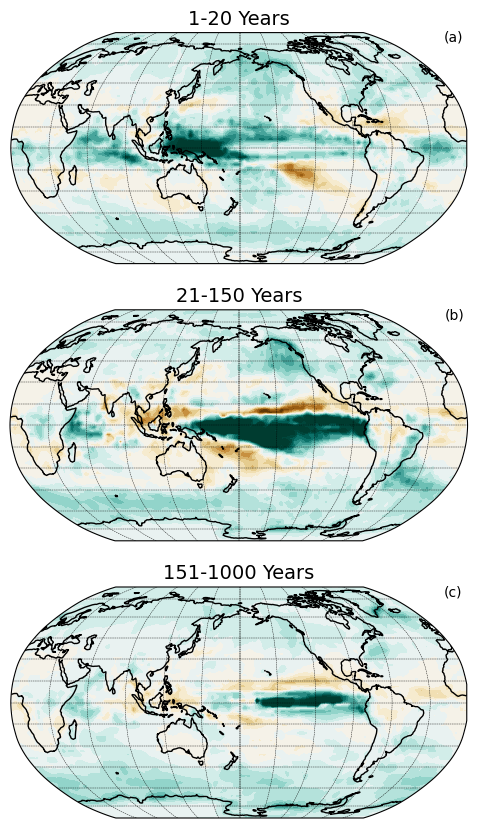

In [13]:
# Plot Contour Map of Intermodel Median Hydrological Sensitivity
def Map_Plotting_Median(Period):
# Create Figure
#    Fig = pyplot.figure(figsize=(15, 8))
#
# Define Axis
#    Axis = Fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180))
#
# Define Colour Levels
    Colour_Levels = numpy.arange(-20,22,2)
#
# Plot Colour Contour For 1-20 Years Slope
    if Period == "1-20 Years":
        Period_Code = 0
    if Period == "21-150 Years":
        Period_Code = 1
    if Period == "151-1000 Years":
        Period_Code = 2
    Hydro_Sensi_Data_Median = Hydro_Sensi_Median[:,:,Period_Code]
#    Hydro_Sensi_Data = Hydro_Sensi_Mean[:,:,Period_Code]
#    Colour_Plot = Axis.contourf(Hydro_Sensi_Data.Lon, Hydro_Sensi_Data.Lat, Hydro_Sensi_Data_Median, \
    Colour_Plot = Axis.contourf(Hydro_Sensi_Data_Median.Lon, Hydro_Sensi_Data_Median.Lat, Hydro_Sensi_Data_Median, \
    cmap='BrBG', levels=Colour_Levels, extend="both", transform=ccrs.PlateCarree())
#
# Draw Coastlines
    Axis.coastlines()
#
# Set Axes Labels
    x_Axis = numpy.arange(-180,210,30)
    y_Axis = numpy.arange(-90,105,15)
#
# Add a Rectangular Line Grid to the Interior of the Plot
    Gridline = Axis.gridlines(crs=ccrs.PlateCarree(), linewidth=0.3, color='black', linestyle='--')
    Gridline.xlocator = mticker.FixedLocator(x_Axis)
    Gridline.ylocator = mticker.FixedLocator(y_Axis)
#
# Create Colour Bar
#    Colour_Bar = pyplot.colorbar(Colour_Plot, shrink=0.6)
#    if Period_Code == 2:
#        Cax = Axis.inset_axes([0.1, -0.18, 0.8, 0.08], transform=Axis.transAxes)
#        Fig.colorbar(Colour_Plot, ax=Axis, cax=Cax, orientation='horizontal')
#
# Add Title
    Title = Period
    pyplot.title(Title, fontsize=14)
#
# Add Alphabet Label
    Alphabets = ["a", "b", "c"]
    Axis.text(0.95, 0.98, str("("+Alphabets[Period_Code]+")"), ha='left', va='center', \
    transform=Axis.transAxes, fontdict={'size':10},color='black')
#
# Output Figure
    if Period_Code == 0:
        Fig_Name = "Median_Hydro_Sensi_Map_1_20"
    if Period_Code == 1:
        Fig_Name = "Median_Hydro_Sensi_Map_21_150"
    if Period_Code == 2:
        Fig_Name = "Median_Hydro_Sensi_Map_151_1000"
#    Fig.savefig(Fig_Name+'.png', bbox_inches='tight')
#
#
# Create Figs
Fig = pyplot.figure(figsize=(7.48,10.20))
Count = 0
for i in range(3):
#
# Plot Contour Map of Intermodel Median Hydrological Sensitivity
    Count += 1
    Axis = Fig.add_subplot(3,1, Count, projection=ccrs.Robinson(central_longitude=180))
    if Count == 1:
        Map_Plotting_Median("1-20 Years")
    if Count == 2:
        Map_Plotting_Median("21-150 Years")
    if Count == 3:
        Map_Plotting_Median("151-1000 Years")
#        Colour_Bar = pyplot.colorbar(Colour_Plot, shrink=0.6, orientation="horizontal")
#    Fig.savefig('Median_Hydro_Sensi_Maps.png', bbox_inches='tight')
#    Fig.savefig('FIGURE_4.eps', bbox_inches='tight')

In [10]:
# Calculate Difference Between Timescales of Intermodel Median of Hydrological Sensitivities
Hydro_Sensi_Median_Diff = numpy.zeros((len(Hydro_Sensi_Dict[Model]), len(Hydro_Sensi_Dict[Model][0]), 2))
for i in range(len(Hydro_Sensi_Dict[Model])):
    for j in range(len(Hydro_Sensi_Dict[Model][0])):
        Hydro_Sensi_Median_Diff[i][j][0] = Hydro_Sensi_Median[i][j][1] - Hydro_Sensi_Median[i][j][0]
        Hydro_Sensi_Median_Diff[i][j][1] = Hydro_Sensi_Median[i][j][2] - Hydro_Sensi_Median[i][j][1]
#print (Hydro_Sensi_Median_Diff)

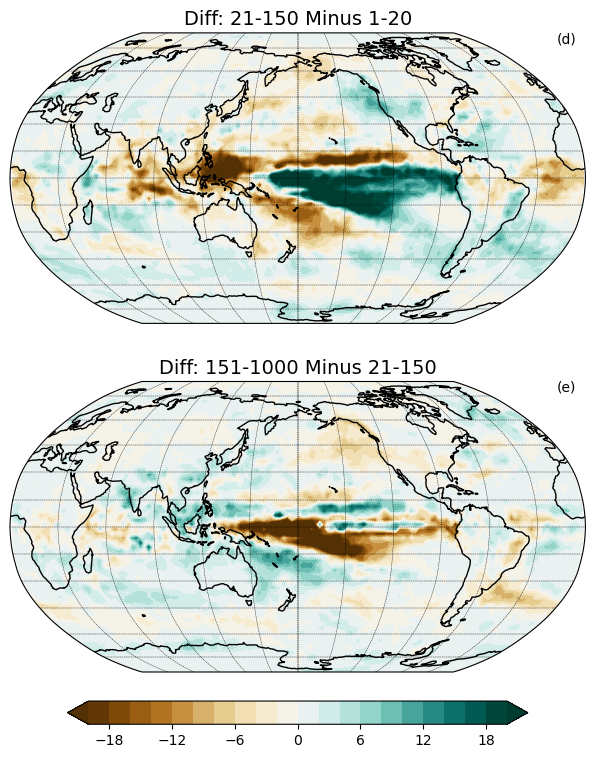

In [14]:
# Plot Contour Map of Intermodel Median Hydrological Sensitivity
def Map_Plotting_Median_Diff(Period):
# Create Figure
#    Fig = pyplot.figure(figsize=(15, 8))
#
# Define Axis
#    Axis = Fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180))
#
# Define Colour Levels
    Colour_Levels = numpy.arange(-20,22,2)
#
# Plot Colour Contour For 1-20 Years Slope
    if Period == "Diff: 21-150 Minus 1-20":
        Period_Code = 0
    if Period == "Diff: 151-1000 Minus 21-150":
        Period_Code = 1
    Hydro_Sensi_Data_Median_Diff = Hydro_Sensi_Median_Diff[:,:,Period_Code]
#    Hydro_Sensi_Data = Hydro_Sensi_Mean[:,:,Period_Code]
#    Colour_Plot = Axis.contourf(Hydro_Sensi_Data.Lon, Hydro_Sensi_Data.Lat, Hydro_Sensi_Data_Median_Diff, \
    Colour_Plot = Axis.contourf(ds.Lon, ds.Lat, Hydro_Sensi_Data_Median_Diff, \
    cmap='BrBG', levels=Colour_Levels, extend="both", transform=ccrs.PlateCarree())
#
# Draw Coastlines
    Axis.coastlines()
#
# Set Axes Labels
    x_Axis = numpy.arange(-180,210,30)
    y_Axis = numpy.arange(-90,105,15)
#
# Add a Rectangular Line Grid to the Interior of the Plot
    Gridline = Axis.gridlines(crs=ccrs.PlateCarree(), linewidth=0.3, color='black', linestyle='--')
    Gridline.xlocator = mticker.FixedLocator(x_Axis)
    Gridline.ylocator = mticker.FixedLocator(y_Axis)
#
# Create Colour Bar
#    Colour_Bar = pyplot.colorbar(Colour_Plot, shrink=0.6)
    if Period_Code == 1:
        Cax = Axis.inset_axes([0.1, -0.18, 0.8, 0.08], transform=Axis.transAxes)
        Fig.colorbar(Colour_Plot, ax=Axis, cax=Cax, orientation='horizontal')
#
# Add Title
    Title = Period
    pyplot.title(Title, fontsize=14)
#
# Add Alphabet Label
    Alphabets = ["d", "e"]
    Axis.text(0.95, 0.98, str("("+Alphabets[Period_Code]+")"), ha='left', va='center', \
    transform=Axis.transAxes, fontdict={'size':10},color='black')
#
#
# Create Figs
Fig = pyplot.figure(figsize=(7.48,8.30))
Count = 0
for i in range(2):
#
# Plot Contour Map of Intermodel Median Hydrological Sensitivity Differences
    Count += 1
    Axis = Fig.add_subplot(2,1, Count, projection=ccrs.Robinson(central_longitude=180))
    if Count == 1:
        Map_Plotting_Median_Diff("Diff: 21-150 Minus 1-20")
    if Count == 2:
        Map_Plotting_Median_Diff("Diff: 151-1000 Minus 21-150")
#        Colour_Bar = pyplot.colorbar(Colour_Plot, shrink=0.6, orientation="horizontal")
#    Fig.savefig('Median_Hydro_Sensi_Diff_Maps.png', bbox_inches='tight')
#    Fig.savefig('FIGURE_4.eps', bbox_inches='tight')

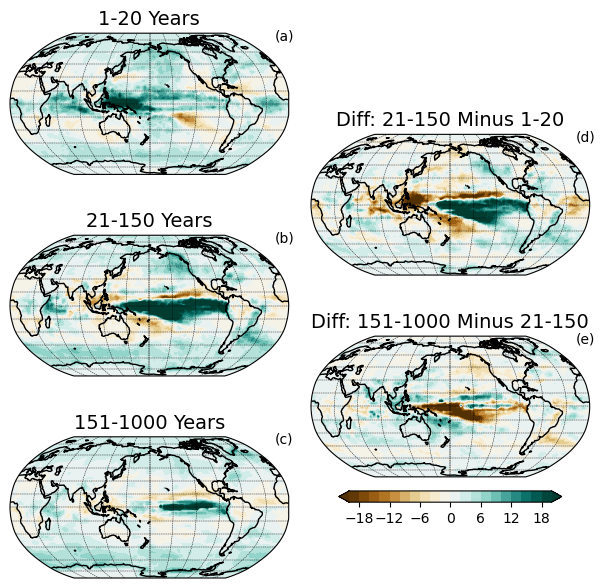

In [15]:
# Create Figs
Fig = pyplot.figure(figsize=(7.48,7.28))
Grid = pyplot.GridSpec(6, 2, wspace=0.08, hspace=0.8)
#
# Plot Contour Map of Intermodel Median Hydrological Sensitivity
for i in range(3):
    Axis = Fig.add_subplot(Grid[i*2:i*2+2,0], projection=ccrs.Robinson(central_longitude=180))
    if i == 0:
        Map_Plotting_Median("1-20 Years")
    if i == 1:
        Map_Plotting_Median("21-150 Years")
    if i == 2:
        Map_Plotting_Median("151-1000 Years")
#
# Plot Contour Map of Intermodel Median Hydrological Sensitivity Differences
for i in range(2):
    Axis = Fig.add_subplot(Grid[i*2+1:i*2+3,1], projection=ccrs.Robinson(central_longitude=180))
    if i == 0:
        Map_Plotting_Median_Diff("Diff: 21-150 Minus 1-20")
    if i == 1:
        Map_Plotting_Median_Diff("Diff: 151-1000 Minus 21-150")
Fig.savefig('FIGURE_4.eps', bbox_inches='tight')